<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Milestone Project 3: Dự báo chuỗi thời gian trong TensorFlow (BitPredict 💰📈)

Mục tiêu của notebook này là giúp bạn làm quen với việc làm việc với dữ liệu chuỗi thời gian (time series data).

Chúng ta sẽ xây dựng một loạt các mô hình nhằm cố gắng dự đoán giá Bitcoin.

Chào mừng bạn đến với Milestone Project 3, BitPredict 💰📈!

> 🔑 **Lưu ý:** ⚠️ Đây không phải là tư vấn tài chính, vì bạn sẽ thấy dự báo chuỗi thời gian về giá thị trường chứng khoán thực sự khá khủng khiếp.

## Bài toán chuỗi thời gian là gì?

 Các bài toán về chuỗi thời gian xử lý dữ liệu theo thời gian.

Chẳng hạn, số lượng nhân viên trong một công ty trên 10 năm, doanh số bán máy tính trong 5 năm qua, mức sử dụng điện trong 50 năm qua.

Mốc thời gian có thể ngắn (giây/phút) hoặc dài (năm/thập kỷ). Và các bài toán mà bạn có thể kiểm tra thường có thể được chia thành hai loại.

![example time series problems](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-example-time-series-problems.png)

| Loại bài toán | Ví dụ | Đầu ra |
| ----- | ----- | ----- |
| **Phân loại** | Phát hiện bất thường, xác định chuỗi thời gian (chuỗi thời gian này đến từ đâu?) | Rời rạc (nhãn) |
| **Dự báo** | Dự đoán giá thị trường chứng khoán, dự báo nhu cầu trong tương lai đối với một sản phẩm, yêu cầu dự trữ hàng tồn kho | Liên tục (số) |

Cả hai trường hợp trên đều sử dụng phương pháp học có giám sát, tức là bạn sẽ có một số dữ liệu mẫu và một nhãn liên kết với dữ liệu đó.

Ví dụ: trong dự báo giá Bitcoin, dữ liệu của bạn có thể là giá lịch sử của Bitcoin trong tháng qua và nhãn có thể là giá hôm nay (nhãn không thể là giá ngày mai vì đó là những gì chúng ta muốn dự đoán).

Bạn có đoán được bài toán BitPredict 💰📈 thuộc loại nào không?

## Những gì chúng ta sẽ đề cập

Bạn sẵn sàng rồi chứ?

Chúng ta sẽ thực hiện rất nhiều thứ.

* Nhận dữ liệu chuỗi thời gian (giá lịch sử của Bitcoin)
  * Load dữ liệu chuỗi thời gian bằng mô-đun CSV của pandas/Python
* Định dạng dữ liệu cho bài toán chuỗi thời gian
  * Tạo tập huấn luyện và kiểm tra (sai cách)
  * Tạo tập huấn luyện và kiểm tra (đúng cách)
  * Trực quan hóa dữ liệu chuỗi thời gian
  * Biến dữ liệu chuỗi thời gian thành một bài toán học có giám sát (windowing)
  * Chuẩn bị dữ liệu đơn biến và đa biến (nhiều hơn một biến)
* Đánh giá mô hình dự báo chuỗi thời gian
* Thiết lập một chuỗi các thử nghiệm mô hình học sâu
  * Mạng dày đặc (được kết nối đầy đủ)
  * Mô hình chuỗi (LSTM và 1D CNN)
  * Ensembling (kết hợp nhiều mô hình với nhau)
  * Mô hình đa biến
  * Sao chép thuật toán N-BEATS bằng cách sử dụng phân lớp TensorFlow layer
* Tạo modelling checkpoint để lưu mô hình hoạt động tốt nhất trong quá trình huấn luyện
* Đưa ra dự đoán (dự báo) với mô hình chuỗi thời gian
* Tạo khoảng thời gian dự đoán cho các dự báo mô hình chuỗi thời gian
* Thảo luận về hai loại không chắc chắn khác nhau trong ML (data uncertainty và model uncertainty)
* Chứng minh lý do tại sao dự báo trong một hệ thống mở là BS (bài toán gà tây)

## Cách sử dụng notebook này
Các bạn có thể đọc qua các mô tả và code (tất cả sẽ chạy, trừ những cell mắc lỗi có chủ đích), nhưng có một lựa chọn tốt hơn.

Tự viết toàn bộ code.

Nghiêm túc đấy. Hãy tạo notebook mới và tự viết lại từng dòng. Kiểm tra xem bạn có thể thay đổi nó không và lý do cho điều đó.

Bạn không cần viết mô tả bằng văn bản nhưng tự viết lại code là một cách tuyệt vời để có trải nghiệm thực tiễn.

Đừng lo lắng nếu mắc sai sót, ai cũng đều mắc lỗi cả. Cách thực hiện tốt hơn và mắc ít lỗi hơn là **viết nhiều code hơn**.

> 📖 **Tài liệu:** Xem bộ tài liệu khóa học đầy đủ trên [GitHub](https://github.com/mrdbourke/tensorflow-deep-learning).



## Kiểm tra GPU

Để các mô hình DL chạy nhanh nhất có thể, chúng ta sẽ cần truy cập vào GPU.

Trong Google Colab, bạn có thể thiết lập điều này bằng cách đi vào Runtime -> Change runtime type -> Hardware accelerator -> GPU.

Sau khi chọn GPU, bạn có thể sẽ phải khởi động lại runtime.

In [ ]:
# Kiểm tra GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2e10d3f0-b182-9c97-b63d-dc1df1c7677d)


## Lấy dữ liệu

Để xây dựng mô hình dự báo chuỗi thời gian, đầu tiên chúng ta cần dữ liệu.

Do chúng ta đang cố dự đoán giá Bitcoin nên sẽ cần dữ liệu về Bitcoin.

Cụ thể, chúng ta sẽ lấy giá Bitcoin từ ngày 1 tháng 10 năm 2013 đến ngày 18 tháng 5 năm 2021.

Tại sao lại là những ngày này?

Vì ngày 1 tháng 10 năm 2013 là lúc nguồn dữ liệu ([Coindesk](https://www.coindesk.com/price/bitcoin)) bắt đầu ghi lại giá Bitcoin và ngày 18 tháng 5 năm 2021 là khi notebook này được tạo.

Nếu bạn xem qua notebook này sau thời gian đó, bạn có thể sử dụng những gì đã học để dự đoán về những ngày sau của Bitcoin, bạn sẽ chỉ phải điều chỉnh nguồn dữ liệu.

> 📖 **Tài liệu:** Để lấy dữ liệu lịch sử Bitcoin, hãy tới trang [Coindesk](https://www.coindesk.com/price/bitcoin) để biết giá Bitcoin, click vào "all" rồi click vào "Export data" và chọn "CSV".

Bạn có thể tìm thấy dữ liệu chúng ta sẽ sử dụng trên [GitHub](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv).



In [ ]:
# Download dữ liệu lịch sử Bitcoin từ GitHub
# Lưu ý: bạn cần chọn "Raw" để download dữ liệu ở đúng định dạng
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-04-08 09:01:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-04-08 09:01:40 (7.15 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Import dữ liệu chuỗi thời gian với pandas
Bây giờ chúng ta đã có một số dữ liệu để làm việc, hãy import dữ liệu đó bằng pandas để chúng ta có thể hình dung nó.

Vì dữ liệu ở định dạng **CSV (các giá trị được phân tách bằng dấu phẩy)** (một định dạng dữ liệu rất phổ biến cho chuỗi thời gian), nên chúng ta sẽ sử dụng hàm pandas [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

Và bởi vì dữ liệu có thành phần ngày tháng, nên chúng ta sẽ cần pandas phân tích cú pháp ngày tháng bằng cách sử dụng tham số `parse_dates`, chuyển cho nó tên của cột ngày tháng ("Date").

In [ ]:
# Import với pandas
import pandas as pd
# Phân tích cú pháp ngày và đặt cột date thành chỉ mục
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # phân tích cú pháp cột date (cho pandas biết cột 1 là ngày giờ)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


Trông tốt đấy! Hãy lấy thêm một số thông tin.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


Do chúng ta đã yêu cầu pandas phân tích cú pháp cột ngày và đặt nó làm chỉ mục, cho nên nó không có trong danh sách cột.

Bạn cũng thấy không có nhiều mẫu.

In [ ]:
# Chúng ta có bao nhiêu mẫu?
len(df)

2787

Chúng ta đã thu thập lịch sử giá Bitcoin trong ~8 năm qua nhưng chỉ có tổng 2787 mẫu.

Đây là điều bạn sẽ gặp phải với các vấn đề về dữ liệu chuỗi thời gian. Thông thường, số lượng mẫu không lớn như các loại dữ liệu khác.

Ví dụ: thu thập một mẫu ở các khung thời gian khác nhau dẫn đến:

| 1 mẫu mỗi khung thời gian | Số mẫu mỗi năm |
| ----- | ----- |
| Giây | 31,536,000 |
| Giờ | 8,760 |
| Ngày | 365 |
| Tuần | 52 |
| Tháng | 12 |

> 🔑 **Lưu ý:** Tần suất thu thập giá trị chuỗi thời gian thường được gọi là **tính thời vụ (seasonality)**. Điều này thường được đo bằng số lượng mẫu mỗi năm. Ví dụ: thu thập giá Bitcoin một lần mỗi ngày thì chuỗi thời gian có tính thời vụ là 365. Dữ liệu chuỗi thời gian được thu thập với các giá trị thời vụ khác nhau thường thể hiện các mẫu theo mùa (ví dụ: nhu cầu điện tăng cao hơn trong các tháng mùa hè đối do điều hòa so với các tháng mùa đông ). Để biết thêm về các mẫu chuỗi thời gian khác nhau, hãy xem [Forecasting: Principles and Practice: chương 2.3](https://otexts.com/fpp3/tspatterns.html).

![different types of time series patterns](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-types-of-time-series-patterns.png)
*Ví dụ về các loại mẫu khác nhau mà bạn sẽ thấy trong dữ liệu chuỗi thời gian. Lưu ý rằng chuỗi thời gian phía dưới bên phải (thay đổi giá cổ phiếu của Google) có rất ít hoặc không có mẫu, gây khó khăn cho việc dự đoán. Xem [Forecasting: Principles and Practice: chương 2.3](https://otexts.com/fpp3/tspatterns.html) để xem minh họa đầy đủ.*

Các thuật toán DL thường phát triển mạnh mẽ với rất nhiều dữ liệu, trong khoảng từ hàng nghìn đến hàng triệu mẫu.

Trong trường hợp này, chúng ta có giá hàng ngày của Bitcoin, tối đa là 365 mẫu mỗi năm.

Nhưng điều đó không có nghĩa là chúng ta không thể thử chúng với dữ liệu của mình.

Để đơn giản hóa, hãy xóa một số cột khỏi dữ liệu, chỉ còn lại chỉ mục date và closing price.

In [ ]:
# Chỉ cần closing price cho từng ngày
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Tốt hơn rồi!

Nhưng đó chỉ là giá Bitcoin có giá trị trong năm ngày, hãy vẽ sơ đồ mọi thứ chúng ta có.

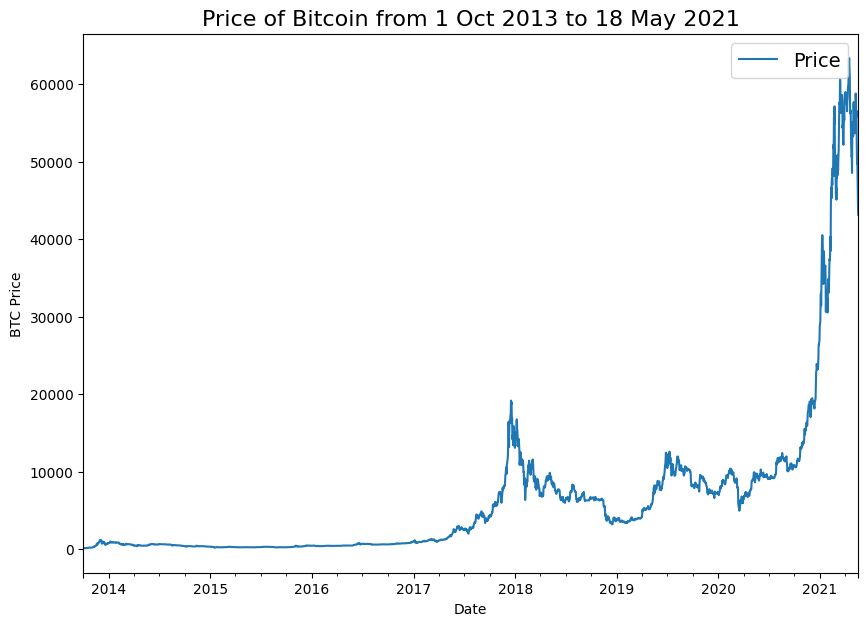

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

Có vẻ như bạn nên mua Bitcoin trước năm 2014.

### Import dữ liệu chuỗi thời gian với mô-đun CSV của Python

Nếu dữ liệu chuỗi thời gian của bạn ở dạng CSV, bạn không nhất thiết phải sử dụng pandas.

Bạn có thể sử dụng mô-đun [csv](https://docs.python.org/3/library/csv.html) được tích hợp sẵn của Python. Và nếu bạn đang làm việc với ngày tháng, bạn cũng có thể muốn sử dụng [`datetime`](https://docs.python.org/3/library/datetime.html) của Python.

Hãy xem làm thế nào để tái tạo biểu đồ mà chúng ta đã tạo trước đó, nhưng lần này chúng ta sẽ sử dụng các mô-đun `csv` và `datetime` của Python.

> 📖 **Tài liệu:** Để biết thêm về cách sử dụng mô-đun `csv` của Python, hãy xem hướng dẫn của Real Python về [Đọc và Viết file CSV trong Python](https://realpython.com/python-csv/).

In [ ]:
# Import và định dạng dữ liệu lịch sử Bitcoin trong Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # đọc trong CSV đích
  next(csv_reader) # bỏ qua dòng đầu tiên (điều này bỏ cột titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # lấy ngày ở dạng dates (không phải string), strptime = string parse time
    btc_price.append(float(line[2])) # lấy closing price ở dạng float

# Hiển thị 10 cái đầu tiên của từng thứ
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Tuyệt! Bây giờ, chúng ta hãy xem mọi thứ trông như thế nào.

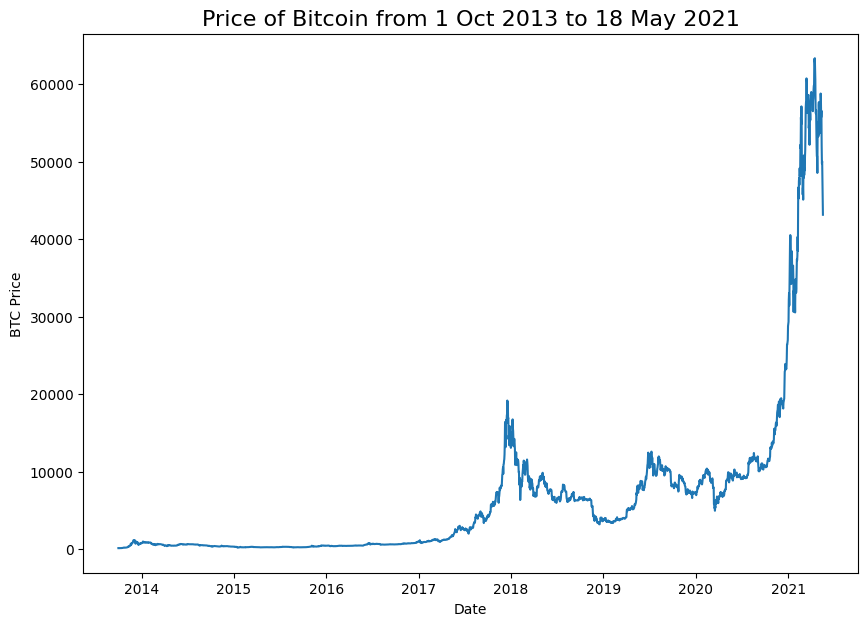

In [ ]:
# Biểu đồ từ CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

Bạn thấy chứ? Cũng giống như biểu đồ của pandas. Và vì chúng ta đã định dạng `timesteps` thành các đối tượng `datetime`, nên `matplotlib` hiển thị trục date khá đẹp.

## Định dạng dữ liệu Phần 1: Tạo tập huấn luyện và kiểm tra cho dữ liệu chuỗi thời gian

Chúng ta sẽ làm điều gì tiếp theo?

Chúng ta sẽ chuẩn bị dữ liệu cho mô hình.

Bước đầu tiên và quan trọng nhất để chuẩn bị bất kỳ tập dữ liệu ML nào là gì?

Co giãn?

Không...

Loại bỏ các outlier?

Không...

Tạo phân tách huấn luyện và kiểm tra?

Đúng vậy!

Thông thường, chúng ta có thể tạo phân tách huấn luyện và kiểm tra bằng cách sử dụng hàm [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) của Scikit-Learn nhưng như các bạn sẽ thấy sau đây, điều này không thực sự phân tách đối với dữ liệu chuỗi thời gian.

Nhưng trước khi phân tách, hãy nói về *loại* dữ liệu mà chúng ta có.

Trong các bài toán chuỗi thời gian, bạn sẽ có dữ liệu **đơn biến (univariate)** hoặc **đa biến (multivariate)**.

Bạn có đoán được dữ liệu của chúng ta là gì không?

* Dữ liệu chuỗi thời gian **đơn biến** đề cập đến *một* biến, ví dụ: sử dụng giá Bitcoin để dự đoán giá Bitcoin.
* Dữ liệu chuỗi thời gian **đa biến** đề cập đến *nhiều hơn một* biến, chẳng hạn như dự đoán nhu cầu điện bằng ngày trong tuần, thời gian trong năm và số hộ gia đình trong một vùng.

![comparison of univariate and multivariate time series data](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-univariate-and-multivariate-time-series-data.png)
*Ví dụ về dữ liệu chuỗi thời gian đơn biến và đa biến. Đơn biến liên quan đến việc sử dụng mục tiêu để dự đoán mục tiêu. Đa biến thì sử dụng mục tiêu và một chuỗi thời gian khác để dự đoán mục tiêu.*

### Tạo tập huấn luyện & kiểm tra cho chuỗi thời gian (sai cách)

Chúng ta đang xử lý chuỗi thời gian đơn biến, vì vậy chỉ phải thực hiện phân tách trên một biến (đối với chuỗi thời gian đa biến, bạn sẽ phải chia nhiều biến).

Còn về cách đầu tiên mà chúng ta thấy tách *sai* dữ liệu chuỗi thời gian sai thì sao?

Hãy biến chỉ mục và cột DataFrame thành mảng NumPy.

In [ ]:
# Lấy mảng bitcoin date
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

Bây giờ, chúng ta sẽ sử dụng `train_test_split` từ Scikit-Learn để tạo các tập huấn luyện và kiểm tra.

In [ ]:
# Cách tạo tập huấn luyện/kiểm tra cho chuỗi thời gian sai
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # ngày
                                                    prices, # giá
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

Có vẻ như các phần phân tách hoạt động tốt, nhưng đừng tin tưởng các con số, hãy trực quan hóa (visualize, visualize, visualize)!

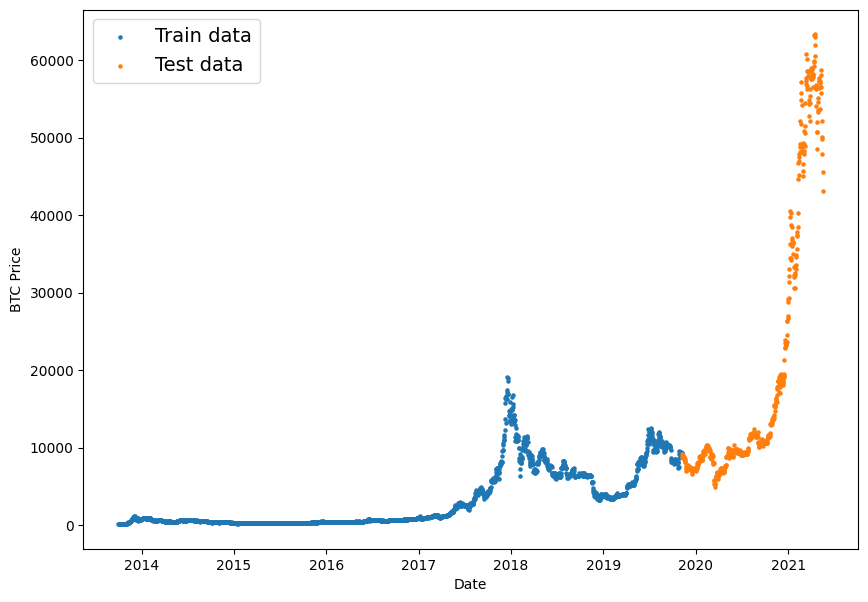

In [ ]:
# Hãy vẽ biểu đồ các phân tách huấn luyện và kiểm tra sai
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Có gì sai với biểu đồ này?

Hãy tự nhắc lại những gì chúng ta đang cố gắng thực hiện.

Chúng ta đang cố gắng sử dụng lịch sử giá Bitcoin để dự đoán giá Bitcoin trong tương lai.

Như vậy, dữ liệu đã biết (tập huấn luyện) là gì?

Giá của Bitcoin trong quá khứ.

Và dữ liệu chưa biết (tập kiểm tra) là?

Giá của Bitcoin trong tương lai.

Biểu đồ trên có phản ánh điều này không?

Không.

Dữ liệu kiểm tra của chúng ta nằm rải rác trong toàn bộ dữ liệu huấn luyện.

Loại phân chia ngẫu nhiên này có thể thích hợp đối với các tập dữ liệu không có thành phần thời gian (chẳng hạn như hình ảnh hoặc đoạn văn bản cho các bài toán phân loại) nhưng đối với chuỗi thời gian, chúng ta phải cân nhắc yếu tố thời gian.

Để khắc phục điều này, chúng ta phải chia nhỏ dữ liệu so cho nó phản ánh những gì chúng ta đang cố gắng thực hiện.

Chúng ta cần tách dữ liệu Bitcoin lịch sử để có tập dữ liệu phản ánh quá khứ (tập huấn luyện) và tập dữ liệu phản ánh tương lai (tập kiểm tra).





### Tạo tập huấn luyện và kiểm tra cho chuỗi thời gian (đúng cách)

Tất nhiên, chúng ta thực sự không có cách nào để truy cập dữ liệu từ tương lai.

Nhưng chúng ta có thể thiết kế tập kiểm tra trong tương lai đối với tập huấn luyện.

Để làm điều này, chúng ta có thể tạo một điểm bất kỳ để phân chia dữ liệu.

Mọi thứ trước điểm đó có thể coi là tập huấn luyện, sau điểm đó là tập kiểm tra.

![time series train test split](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-time-series-train-test-split.png)
*Biểu diễn phân tách thời gian. Thay vì phân tách huấn luyện/kiểm tra ngẫu nhiên theo phương pháp truyền thống, hãy chia nhỏ dữ liệu chuỗi thời gian một cách tuần tự, tức là, dữ liệu kiểm tra phải là dữ liệu từ tương lai khi so sánh với dữ liệu huấn luyện.*

In [ ]:
# Tạo train/test split đúng cách cho dữ liệu chuỗi thời gian
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Tạo phân tách dữ liệu huấn luyện (mọi thứ trước khi phân tách)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Tạo phần tách dữ liệu kiểm tra (mọi thứ sau khi phân tách)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

Có vẻ như các phân tách tùy chỉnh của chúng ta có cùng độ dài với phần tách mà chúng ta đã thực hiện với `train_test_split`.

Nhưng một lần nữa, đây chỉ là những con số.

Hãy làm cho những con số này sinh động hơn.

Hãy trực quan hóa nó.

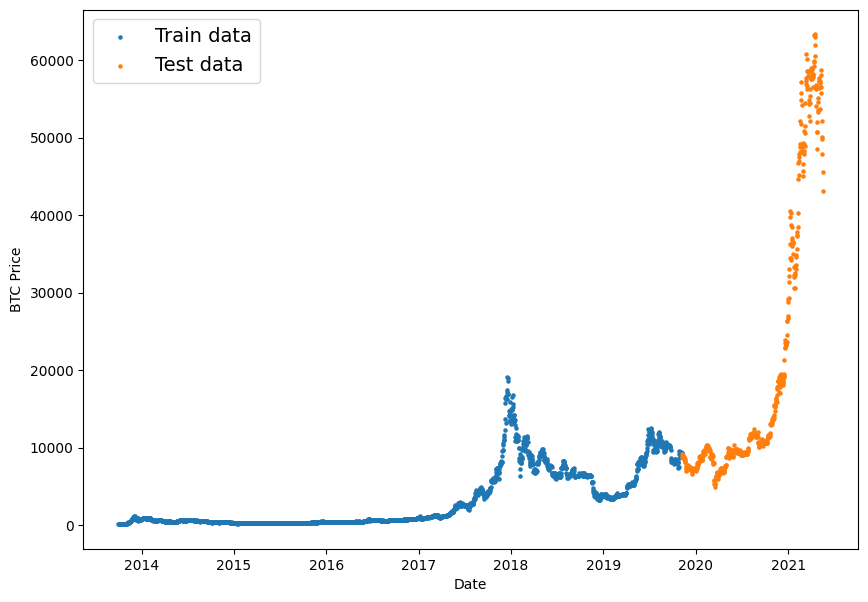

In [ ]:
# Biểu đồ tạo các phân tách chính xác
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Trông tốt hơn nhiều rồi!

Bạn thấy những gì đã xảy ra ở đây chưa?

Chúng ta sẽ sử dụng tập huấn luyện (quá khứ) để huấn luyện một mô hình nhằm thử và dự đoán các giá trị trên tập kiểm tra (tương lai).

Vì tập kiểm tra là tương lai *giả lập*, chúng ta có thể đánh giá mô hình hoạt động như thế nào trên dữ liệu *thực tế* trong tương lai.

> 🔑 **Lưu ý:** Lượng dữ liệu bạn dự trữ cho tập kiểm tra của mình không được thiết lập cố định. Bạn có thể có các phân tách 80/20, 90/10, 95/5 hoặc trong một số trường hợp, bạn thậm chí có thể không có đủ dữ liệu để chia thành các tập huấn luyện và kiểm tra (xem tài liệu bên dưới). Vấn đề cần nhớ là tập kiểm tra là giả mạo, không phải là tương lai thực tế, nó chỉ nhằm cung cấp cho bạn dấu hiệu về cách hoạt động của các mô hình mà bạn đang xây dựng.

> 📖 **Tài liệu:** Làm việc với dữ liệu chuỗi thời gian có thể khó khăn hơn so với các loại dữ liệu khác. Có một số cạm bẫy cần chú ý, chẳng hạn như lượng dữ liệu cần dùng cho tập kiểm tra. Tài liệu [*3 facts about time series forecasting that surprise experienced machine learning practitioners*](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387) nói về những điều khác nhau cần lưu ý khi làm việc với dữ liệu chuỗi thời gian, tôi khuyến nghị bạn nên đọc nó.



### Tạo một hàm vẽ biểu đồ

Thay vì gõ lại các lệnh `matplotlib` để liên tục vẽ biểu đồ dữ liệu, hãy tạo một hàm vẽ biểu đồ để chúng ta có thể sử dụng lại sau này.

In [ ]:
# Tạo một hàm vẽ biểu đồ dữ liệu chuỗi thời gian
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Vẽ biểu đồ các bước thời gian (một loạt các điểm trong thời gian) với các giá trị (một loạt các giá trị trên các bước thời gian).

  Tham số
  ---------
  timesteps : mảng của các bước thời gian
  values : mảng của các giá trị theo theo thời gian
  format : kiểu của biểu đồ, mặc định là "."
  start : nơi bắt đầu biểu đồ (đặt một giá trị sẽ lập chỉ mục từ start của timesteps & values)
  end : nơi kết thúc biểu đồ (đặt một giá trị sẽ lập chỉ mục từ end của timesteps & values)
  label : nhãn để hiển thị trên biểu đồ giá trị
  """
  # Vẽ biểu đồ các chuỗi
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # làm cho nhãn lớn hơn
  plt.grid(True)

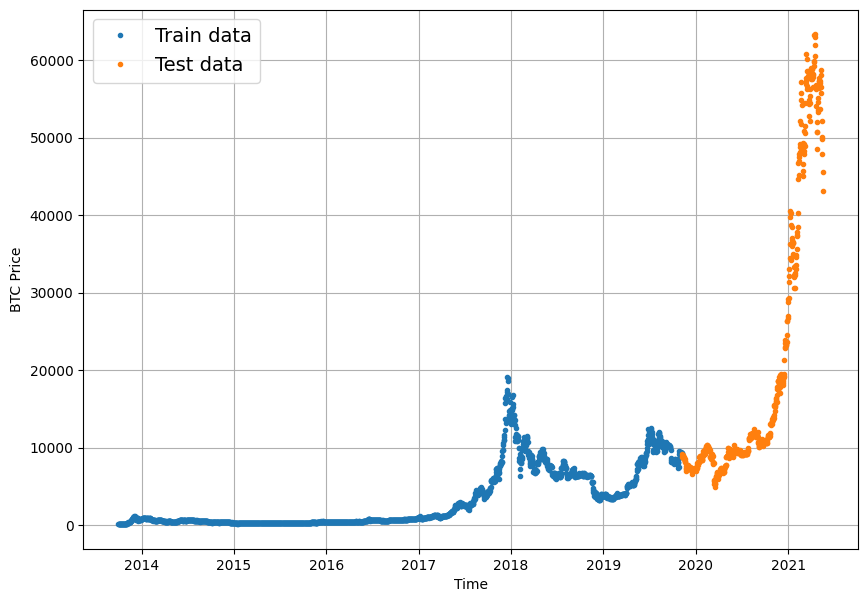

In [ ]:
# Hãy thử hàm vẽ biểu đồ
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Trông được đấy!

Bây giờ hãy thử nghiệm lập một số mô hình.

## Thử nghiệm lập mô hình

Chúng ta có thể xây dựng hầu hết bất cứ loại mô hình nào cho bài toán của mình miễn là đầu vào và đầu ra dữ liệu được định dạng đúng.

Tuy nhiên, chúng ta *có thể* xây dựng *hầu hết bất kỳ* loại mô hình nào, nhưng không có nghĩa là nó sẽ hoạt động tốt/nên được sử dụng trong thiết lập production.

Hãy xem điều này có ý nghĩa gì khi chúng ta xây dựng và đánh giá các mô hình xuyên suốt.

Trước khi thảo luận về những thử nghiệm lập mô hình mà chúng ta sẽ chạy, có hai thuật ngữ bạn nên làm quen, đó là **horizon** và **window**.
  * **horizon** = số bước thời gian dự đoán về tương lai
  * **window** = số bước thời gian trước đây được sử dụng để dự đoán **horizon**

Ví dụ: nếu chúng ta muốn dự đoán giá Bitcoin cho ngày mai (1 ngày trong tương lai) bằng cách sử dụng giá Bitcoin của tuần trước (7 ngày trong quá khứ), thì horizon sẽ là 1 và window sẽ là 7.

Vậy còn các thử nghiệm lập mô hình thì sao?

| Mô hình số | Kiểu mô hình | Horizon size | Window size | Dữ liệu bổ sung |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Tương tự như 1 | 1 | 30 | NA |
| 3 | Tương tự như 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Tương tự như 1 (nhưng với dữ liệu đa biến) | 1 | 7 | Block reward size |
| 7 | [Thuật toán N-BEATsN-BEATs](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (nhiều mô hình được tối ưu hóa trên các hàm mất mát khác nhau) | 1 | 7 | NA |
| 9 | Mô hình dự đoán tương lai (mô hình dự đoán các giá trị tương lai) | 1 | 7 | NA|
| 10 | Tương tự như 1 (nhưng với dữ liệu gà tây 🦃 đã đề xuất) | 1 | 7 | NA |

> 🔑 **Lưu ý:** Nhắc lại, như các bạn thấy, chúng ta có thể xây dựng nhiều loại mô hình cho dữ liệu mà chúng ta đang làm việc. Tuy nhiên, điều đó không có nghĩa là chúng sẽ hoạt động tốt. Deep learning là một kỹ thuật mạnh mẽ nhưng không phải lúc nào nó cũng hiệu quả. Và như mọi khi, hãy bắt đầu với một mô hình đơn giản trước rồi thêm độ phức tạp nếu cần.

## Model 0: Naïve forecast (baseline)

Như thường lệ, hãy bắt đầu với một mô hình cơ sở.

Một trong những mô hình cơ sở phổ biến nhất cho dự báo chuỗi thời gian là mô hình naïve (còn được gọi là [naïve forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)), không cần bất kỳ huấn luyện nào.

Đó là do tất cả những gì mà mô hình naïve làm là sử dụng giá trị bước thời gian trước đó để dự đoán giá trị bước thời gian tiếp theo.

Công thức trông như sau:

$$\hat{y}_{t} = y_{t-1}$$

Trong tiếng Anh:
> Dự đoán tại bước thời gian `t` (ŷ) bằng với giá trị ở bước thời gian `t-1` (bước thời gian trước đó).

Nghe có vẻ đơn giản phải không?

Không hẳn.

Trong một hệ thống mở (như thị trường chứng khoán hoặc thị trường crypto), bạn thường thấy việc đánh bại naïve forecast bằng *bất kỳ* loại mô hình nào khá khó.

> 🔑 **Lưu ý:** Để tiện cho notebook này, **hệ thống mở** là một hệ thống mà đầu vào và đầu ra có thể tự do luân chuyển, chẳng hạn như thị trường (chứng khoán hoặc crypto). Trong khi ở **hệ thống khép kín**, các đầu vào và đầu ra được chứa trong hệ thống (giống như trò chơi poker với bạn bè của bạn, bạn biết việc mua vào và bạn biết người chiến thắng có thể nhận được bao nhiêu). Dự báo chuỗi thời gian trong các hệ thống mở nói chung khá kém.

In [ ]:
# Tạo a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast bằng mọi giá trị không bao gồm giá trị cuối cùng
naive_forecast[:10], naive_forecast[-10:] # Hiển thị 10 giá trị đầu và 10 giá trị cuối

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

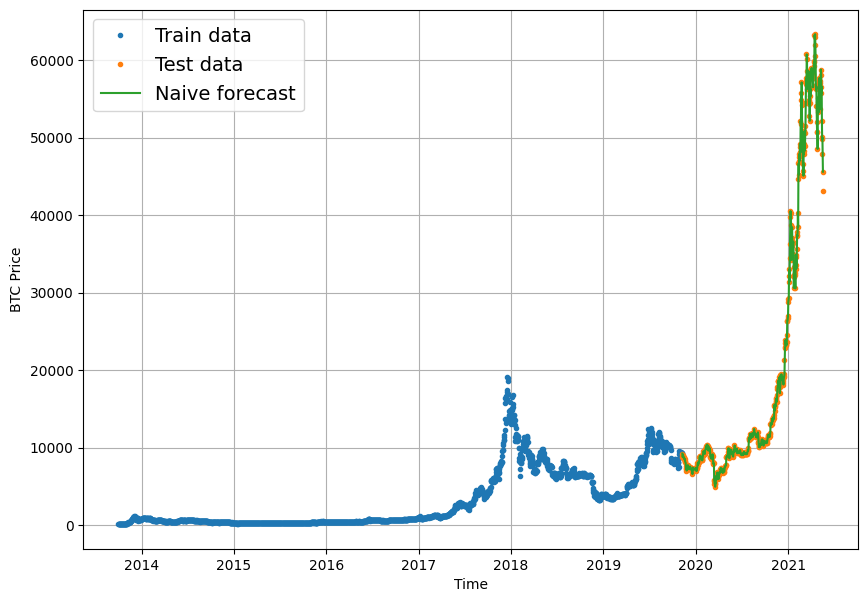

In [ ]:
# Vẽ biểu đồ naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

Có vẻ như naive forecast đang theo sát dữ liệu.

Hãy phóng to để quan sát rõ hơn.

Chúng ta có thể thực hiện điều này bằng cách tạo một giá trị offset và truyền cho nó tham số `start` của hàm `plot_time_series()`.

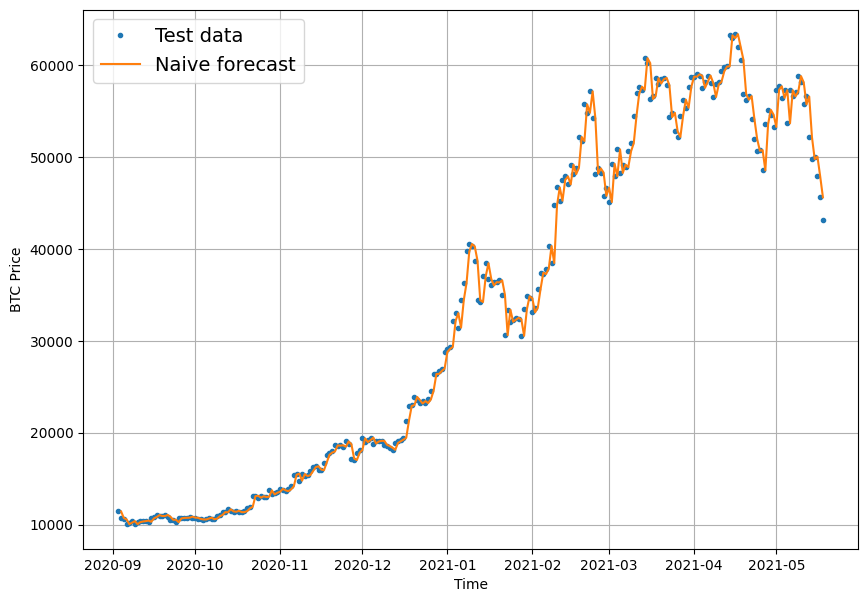

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset các giá trị 300 bước thời gian
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

Khi chúng ta phóng to sẽ thấy naïve forecast hơi xuất hiện sau dữ liệu kiểm tra. Điều này có ý nghĩa vì naïve forecast sử dụng giá trị bước thời gian trước đó để dự đoán giá trị bước thời gian tiếp theo.

Dự báo đã được đưa ra. Hãy đánh giá nó.

## Đánh giá mô hình chuỗi thời gian

Dự báo chuỗi thời gian thường liên quan đến việc dự đoán một con số (trong trường hợp này là giá Bitcoin).

Và bài toán dự đoán một con số sẽ như thế nào?

Sẽ đúng nếu đáp án của bạn là hồi quy.

Chúng ta đã biết về hồi quy, có thể sử dụng các phép đo đánh giá hồi quy để đánh giá các dự báo về chuỗi thời gian.

Điều chính mà chúng ta sẽ đánh giá là: **làm thế nào để các dự đoán của mô hình (`y_pred`) so sánh với các giá trị thực tế (`y_true` hoặc *giá trị nhãn gốc*)**?

> 📖 **Tài liệu:** Chúng ta sẽ sử dụng một số phép đo đánh giá độ chính xác của dự báo chuỗi thời gian của các mô hình khác nhau. Nhiều phép đo trong số này được trích dẫn và giải thích rõ về mặt toán học và khái niệm trong [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html) tôi khuyên bạn nên đọc qua để nắm được tổng quan sâu hơn về những gì chúng ta sẽ thực hành.

Đối với tất cả các phép đo sau, **số liệu càng thấp càng tốt** (ví dụ: MAE bằng 0 sẽ tốt hơn MAE 100).

### Scale-dependent error (Sai số phụ thuộc vào quy mô)

Đây là những phép đo có thể sử dụng để so sánh các giá trị và dự báo chuỗi thời gian trong cùng một quy mô.

Ví dụ: giá lịch sử của Bitcoin tính bằng USD so với giá dự báo của Bitcoin tính bằng USD.

| Phép đo | Chi tiết | Code |
| ----- | ----- | ----- |
| **MAE** (mean absolute error) | Dễ hiểu (dự báo là số tiền X khác với số tiền thực tế). Các phương pháp dự báo giảm thiểu MAE sẽ dẫn đến các dự báo về median. | [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) |
| **RMSE** (root mean square error) | Các dự báo giảm thiểu RMSE dẫn đến các dự báo về mean. | `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`|

### Percentage error (Phần trăm sai số)

Phần trăm sai số không có đơn vị, điều này có nghĩa là chúng có thể sử dụng để so sánh các dự báo trên các tập dữ liệu khác nhau.

| **Phép đo** | **Chi tiết** | **Code** |
| ----- | ----- | ----- |
| **MAPE** (mean absolute percentage error) | Là sai số phần trăm thường được sử dụng nhất. Có thể explode (không hoạt động) nếu `y=0`. | [`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE) |
| **sMAPE** (symmetric mean absolute percentage error) | Được [Forecasting: Principles and Practice](https://otexts.com/fpp3/accuracy.html#percentage-errors) khuyến nghị là không sử dụng, mặc dù nó được sử dụng trong các cuộc thi dự báo. | Có thể lập trình tùy chỉnh |

### Scaled error (Sai số theo tỷ lệ)

Scaled error là một giải pháp thay thế cho percentage error khi so sánh chất lượng dự báo trên các chuỗi thời gian khác nhau.

| **Phép đo** | **Chi tiết** | **Code** |
| ----- | ----- | ----- |
| **MASE** (mean absolute scaled error). | MASE bằng 1 cho naive forecast (hoặc rất gần với 1). Dự báo hoạt động tốt hơn dự báo ban đầu sẽ được <1 MASE. | Xem [`mase_loss()`](https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16) của sktime. |

> 🤔 **Câu hỏi:** Có rất nhiều phép đo ... chúng ta nên tập trung vào phép đo nào nhất? Điều này phụ thuộc vào bài toán của bạn. Tuy nhiên, vì nó dễ giải thích (bạn có thể giải thích nó bằng một câu ), nên MAE thường được nhiều người bắt đầu lựa chọn.

Chúng ta sẽ đánh giá rất nhiều mô hình, nên hãy viết một hàm giúp tính toán các phép đo đánh giá về dự báo.

Trước tiên, chúng ta sẽ cần TensorFlow.


In [ ]:
# Hãy lấy TensorFlow!
import tensorflow as tf

Vì TensorFlow không có phiên bản MASE có sẵn (mean aboslute scaled error), vậy nên hãy tạo lấy một phiên bản.

Chúng ta sẽ lấy cảm hứng từ lớp [`MeanAbsoluteScaledError`](https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.MeanAbsoluteScaledError.html#sktime.performance_metrics.forecasting.MeanAbsoluteScaledError) của [sktime](https://github.com/alan-turing-institute/sktime) (Scikit-Learn for time series) để tính toán MASE.

In [ ]:
# MASE đã lập trình sẵn của sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Lập trình MASE (giả sử dữ liệu không có tính thời vụ).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Tìm MAE của naive forecast (không có tính thời vụ)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # tính thời vụ là 1 day (do đó dịch chuyển 1 day)

  return mae / mae_naive_no_season

Bạn sẽ nhận thấy phiên bản MASE ở trên không nhận các giá trị huấn luyện như `mae_loss()` của sktime. Trong trường hợp này chúng ta đang so sánh MAE của các dự đoán trong tập kiểm tra với MAE của naïve forecast trên tập kiểm tra.

Trên thực tế, nếu chúng ta đã tạo đúng hàm, thì naïve model sẽ có MASE bằng 1 (hoặc rất gần với 1). Bất kỳ mô hình nào tệ hơn naïve forecast sẽ có MASE> 1 và bất kỳ mô hình nào tốt hơn naïve forecast sẽ có MASE <1.

Hãy kết hợp từng phép đo đánh giá khác nhau lại với nhau thành một hàm.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Đảm bảo float32 (để tính toán phép đo)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Tính toán nhiều phép đo khác nhau
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # đặt và nhấn mạnh vào các outlier (tất cả các sai số được bình phương)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Trông được đó! Làm thế nào để kiểm tra hàm trên naive forecast?

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Có vẻ như chúng ta đã có một số cơ sở để đánh bại.

Hãy xem xét MAE của naïve forecast, có vẻ như trung bình mỗi dự báo chênh lệch ~567 USD so với giá Bitcoin thực tế.

Làm thế nào để so sánh điều này với giá trung bình của Bitcoin trong tập dữ liệu kiểm tra?

In [ ]:
# Tìm giá trung bình của Bitcoin trong tập dữ liệu kiểm tra
tf.reduce_mean(y_test).numpy()

20056.632963737222

Xem xét hai giá trị này sẽ bắt đầu cho chúng ta ý tưởng về cách mô hình hoạt động:
* Giá trung bình của Bitcoin trong tập dữ liệu kiểm tra là: 20,056 USD (lưu ý: mức trung bình có thể không phải là thước đo tốt nhất ở đây, vì giá cao nhất hơn hẳn 3 lần giá trị này và giá thấp nhất thấp hơn 4 lần)

* Mỗi dự đoán trong naive forecast trung bình giảm đi: 567 USD

Điều này đã đủ để nói lên rằng đó là một mô hình tốt chưa?

Đó là cách giải thích của riêng bạn. Cá nhân tôi thích một mô hình đúng hơn.

Hãy thử và xây dựng một mô hình.


## Những loại mô hình dự báo chuỗi thời gian khác có thể sử dụng cho các mô hình cơ sở và dự báo thực tế

Vì chúng ta có một mô hình naïve forecast cơ sở, nên hãy bắt đầu xây dựng các mô hình để thử và đánh bại nó.

Và vì khóa học này tập trung vào TensorFlow và DL, chúng ta sẽ sử dụng TensorFlow để xây dựng các mô hình DL nhằm thử và cải thiện các kết quả dự báo naïve forecasting.

Như vậy, có rất nhiều loại mô hình khác mà bạn có thể xem xét để xây dựng mô hình cơ sở/thực hiện dự báo.

Một số trong số chúng thậm chí có thể đánh bại các mô hình hoạt động tốt nhất của chúng ta trong notebook này, tuy nhiên, tôi sẽ để chúng cho phần đọc thêm.

| **Tên thư viện/Mô hình** | **Nguồn** |
| ----- | ----- |
| Moving average | https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/ |
| ARIMA (Autoregression Integrated Moving Average) | https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ |
| sktime (Scikit-Learn for time series) | https://github.com/alan-turing-institute/sktime |
| TensorFlow Decision Forests (random forest, gradient boosting trees) | https://www.tensorflow.org/decision_forests |
| Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) | https://github.com/facebookresearch/Kats |
| LinkedIn Greykite (flexible, intuitive and fast forecasts) | https://github.com/linkedin/greykite |

## Định dạng dữ liệu Phần 2: Tập dữ liệu Windowing

Bây giờ chúng ta đã sẵn sàng để bắt đầu xây dựng các mô hình rồi.

Sắp rồi! Chỉ còn một bước nữa (thực ra là hai) cần thực hiện.

Chúng ta phải sắp xếp lại chuỗi thời gian của mình.

Tại sao cần windowing?

Windowing là một phương pháp để biến một tập dữ liệu chuỗi thời gian thành một **bài toán học có giám sát**.

Nói cách khác, chúng ta muốn sử dụng window của quá khứ để dự đoán tương lai.

Ví dụ: đối với một chuỗi thời gian đơn biến, windowing trong một tuần (`window=7`) để dự đoán giá trị duy nhất tiếp theo (`horizon=1`) có thể như sau:

```
Window cho một tuần (chuỗi thời gian đơn biến)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

Hoặc với giá Bitcoin, nó sẽ giống như sau:

```
Window cho một tuần với mục tiêu dự đoán ngày hôm sau (giá Bitcoin)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```

![windows and horizons for turning time series data into a supervised learning problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-time-series-windows-and-horizons.png)
*Ví dụ về window và horizon cho dữ liệu Bitcoin. Windowing có thể sử dụng để biến dữ liệu chuỗi thời gian thành một bài toán học có giám sát.*

Hãy xây dựng một số hàm lấy chuỗi thời gian đơn biến và biến nó thành các window và horizon có kích thước được chỉ định.

Chúng ta sẽ bắt đầu với horizon size mặc định là 1 và window size là 7 (đây không nhất thiết là những giá trị tốt nhất để dùng, tôi vừa chọn chúng).

In [ ]:
HORIZON = 1 # dự đoán từng bước một
WINDOW_SIZE = 7 # sử dụng các bước thời gian có giá trị một tuần để dự đoán horizon

Bây giờ, chúng ta sẽ viết một hàm để nhận một mảng và biến nó thành window và horizon.

In [ ]:
# Tạo hàm gắn nhãn dữ liệu window
def get_labelled_windows(x, horizon=1):
  """
  Tạo nhãn cho tập dữ liệu window.

  Ví dụ: if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Kiểm tra hàm gắn nhãn window
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Đó chính là những gì tôi đang nói đến!

Bây giờ, chúng ta cần một cách để tạo window cho toàn bộ chuỗi thời gian.

Tuy nhiên, chúng ta có thể làm điều này với các vòng Python, đối với các chuỗi thời gian lớn, điều này sẽ khá chậm.

Để tăng tốc mọi thứ, chúng ta sẽ tận dụng [array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html) của NumPy.

Hãy viết một hàm:
1. Tạo bước window có window size cụ thể, chẳng hạn: `[[0, 1, 2, 3, 4, 5, 6, 7]]`
2. Sử dụng lập chỉ mục NumPy để tạo 2D gồm nhiều bước window, chẳng hạn:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Sử dụng mảng 2D của các bước nhiều window để lập chỉ mục trên một chuỗi mục tiêu
4. Sử dụng hàm `get_labelled_windows()` mà chúng ta đã tạo ở trên để biến các bước window thành những window có horizon được chỉ định

> 📖 **Tài liệu:** Hàm được tạo dưới đây được lấy từ tài liệu của Syafiq Kamarul Azman: [*Fast and Robust Sliding Window Vectorization with NumPy*](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).

In [ ]:
# Tạo hàm để xem mảng NumPy dưới dạng window
def make_windows(x, window_size=7, horizon=1):
  """
  Biến mảng 1D thành mảng 2D gồm các window tuần tự của window_size.
  """
  # 1. Tạo một window có window_size cụ thể (thêm horizon vào cuối để gắn nhãn sau này)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Tạo mảng 2D gồm nhiều bước window (trừ 1 để tính đến 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # tạo mảng 2D có các window với window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Lập chỉ mục trên mảng đích (chuỗi thời gian) với mảng 2D gồm nhiều bước window
  windowed_array = x[window_indexes]

  # 4. Lấy các window được gắn nhãn
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

Một vài bước đó ... chúng ta hãy xem nó diễn ra như thế nào.

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

Tất nhiên, chúng ta cần trực quan hóa!

In [ ]:
# Xem 3 window/nhãn đầu tiên
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# Xem 3 window/nhãn cuối
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> 🔑 **Lưu ý:** Bạn có thể tìm thấy một hàm cho kết quả tương tự như những hàm mà chúng ta đã triển khai ở trên tại [`tf.keras.preprocessing.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array). Nó cũng giống như hàm của chúng ta, sử dụng một mảng và trả về một tập dữ liệu dạng window. Nó có lợi ích là trả về dữ liệu ở dạng thực thể thể tf.data.Dataset (chúng ta sẽ xem cách thực hiện điều này với dữ liệu của mình sau).

## Biến window thành các tập huấn luyện và kiểm tra

Hãy quan sát những cửa số đó! Chúng gần giống như những ô cửa kính ố vàng ở Nhà nguyện Sistine, có lẽ không được tốt lắm nhưng vẫn ổn.

Đã đến lúc biến các window của chúng ta thành các phần phân tách huấn luyện và kiểm tra.

Chúng ta có thể đã window các phần phân tách huấn luyện và kiểm tra hiện có của mình, tuy nhiên, do bản chất của windowing (windowing thường yêu cầu offset tại một số điểm trong dữ liệu), nó thường hoạt động tốt hơn nếu window dữ liệu trước, sau đó chia nó thành các tập huấn luyện và kiểm tra.

Hãy viết một hàm chứa đầy đủ các tập hợp window và nhãn của chúng và chia chúng thành các phần phân tách huấn luyện và kiểm tra.

In [ ]:
# Tạo phân tách huấn luyện/kiểm tra
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Tách các cặp window và label thành các train/test split.
  """
  split_size = int(len(windows) * (1-test_split)) # điều này mặc định thành 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

Hãy quan sát hàm tuyệt vời này, và kiểm tra nó.

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

Lưu ý phần tách mặc định gồm 80% dữ liệu huấn luyện và 20% dữ liệu kiểm tra (phần tách này có thể điều chỉnh nếu cần).

5 mẫu đầu tiên của window huấn luyện và nhãn trông như thế nào?

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Kiểm tra xem có giống nhau không (tính cả horizon/window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Tạo modelling checkpoint

Chúng ta đang tiến rất gần đến việc xây dựng các mô hình, rất gần.

Vì chất lượng của mô hình sẽ thay đổi từ thử nghiệm này sang thử nghiệm khác, cho nên chúng ta cần đảm bảo rằng chúng ta đang so sánh những thứ tương đồng.

Ý tôi muốn nói ở đây là để so sánh công bằng, chúng ta cần so sánh chất lượng tốt nhất của từng mô hình với chất lượng tốt nhất của từng mô hình.

Ví dụ: nếu `model_1` hoạt động cực kỳ tốt ở epoch 55 nhưng chất lượng của nó giảm về epoch 100, chúng ta cần phiên bản mô hình từ epoch 55 để so sánh với các mô hình khác chứ không phải phiên bản của mô hình từ epoch 100.

Điều tương tự cũng xảy ra với mỗi mô hình khác của chúng ta: so sánh phiên bản mô hình tốt nhất với phiên bản mô hình tốt nhất.

Để thực hiện điều này, chúng ta sẽ lập trình [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback.

`ModelCheckpoint` callback sẽ theo dõi chất lượng của mô hình trong quá trình huấn luyện và lưu mô hình tốt nhất vào file bằng cách đặt `save_best_only=True`.

Theo đó, khi đánh giá mô hình, chúng ta có thể khôi phục cấu hình hoạt động tốt nhất của nó từ file.

> 🔑 **Lưu ý:** Do kích thước của tập dữ liệu (nhỏ hơn bình thường), bạn sẽ nhận thấy kết quả thử nghiệm mô hình hóa dao động khá nhiều trong quá trình huấn luyện (do đó việc lập trình `ModelCheckpoint` callback sẽ lưu mô hình tốt nhất).

Vì chúng ta sẽ chạy nhiều thử nghiệm, nên việc theo dõi chúng bằng cách lưu các mô hình vào file dưới các tên khác nhau khá hợp lý.

Để thực hiện điều này, chúng ta sẽ viết một hàm nhỏ `ModelCheckpoint` callback  để lưu một mô hình vào filename được chỉ định.

In [ ]:
import os

# Tạo một hàm lập trình ModelCheckpoint callback với filename cụ thể
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # tạo filepath để lưu mô hình
                                            verbose=0, # chỉ xuất một lượng văn bản hạn chế
                                            save_best_only=True) # chỉ lưu mô hình tốt nhất vào file

## Model 1: Dense model (window = 7, horizon = 1)

Cuối cùng!

Đã đến lúc xây dựng một trong những mô hình của chúng ta.

Chúng ta đã đi qua quá trình tiền xử lý trước đó một chút.

Thông thường, việc chuẩn bị dữ liệu cho một mô hình là một trong những phần lớn nhất của bất kỳ dự án ML nào.

Khi bạn đã có một mô hình tốt, có thể bạn sẽ nhận thấy nhiều cải tiến từ việc thao tác dữ liệu (ví dụ: thu thập nhiều hơn, cải thiện chất lượng) so với việc thao tác mô hình.

Chúng ta sẽ bắt đầu bằng cách giữ cho nó đơn giản, `model_1` sẽ có:
* Một dense layer duy nhất với 128 nút ẩn và kích hoạt ReLU (rectified linear unit)
* Một layer đầu ra có kích hoạt tuyến tính (hoặc không kích hoạt)
* Adam optimizer và hàm mất mát MAE
* Batch size là 128
* 100 epoch

Tại sao lại là những giá trị này?

Tôi đã chọn chúng từ thử nghiệm.

Batch size 32 cũng hoạt động khá tốt và chúng ta luôn có thể huấn luyện cho ít epoch hơn nhưng vì mô hình chạy quá nhanh (bạn sẽ thấy trong giây lát, đó là vì số lượng mẫu mà chúng ta có không lớn) nên bạn cũng có thể huấn luyện thêm.

> 🔑 **Lưu ý:** Như mọi khi, nhiều giá trị cho các bài toán ML là các giá trị thử nghiệm. Xin nhắc lại rằng các giá trị mà bạn tự thiết lập trong thuật toán ML (các nút ẩn, batch size, horizon size, window size) được gọi là [**hyperparameter (siêu tham số)**](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning). Và thử nghiệm để tìm các giá trị tốt nhất cho siêu tham số được gọi là **hyperparameter tuning (tinh chỉnh siêu tham số)**; trong khi đó, các tham số được chính mô hình tìm hiểu (các mẫu trong dữ liệu, chính thức được gọi là trọng số & độ chệch) được gọi là **parameter (tham số)**.

Hãy import TensorFlow và xây dựng mô hình DL đầu tiên cho chuỗi thời gian.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Thiết lập random seed để có kết quả lặp lại nhiều nhất có thể
tf.random.set_seed(42)

# Xây dựng mô hình
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # kích hoạt tuyến tính cũng giống như không có kích hoạt
], name="model_1_dense") # đặt tên cho mô hình để lưu nó

# Biên dịch mô hình
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # chúng ta không nhất thiết cần điều này khi hàm mất mát là MAE

# Khớp mô hình
model_1.fit(x=train_windows, # huấn luyện window có 7 bước thời gian của giá Bitcoin
            y=train_labels, # giá trị horizon là 1 (sử dụng 7 bước thời gian trước đó để dự đoán ngày hôm sau)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # tạo ModelCheckpoint callback để lưu mô hình tốt nhất

Epoch 1/100
18/18 [==============================] - 3s 59ms/step - loss: 1325.0626 - mae: 1325.0626 - val_loss: 2929.1487 - val_mae: 2929.1487
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 363.9196 - mae: 363.9196 - val_loss: 1678.8979 - val_mae: 1678.8979
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 230.3699 - mae: 230.3699 - val_loss: 1320.3304 - val_mae: 1320.3304
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 204.9838 - mae: 204.9838 - val_loss: 1095.2302 - val_mae: 1095.2302
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 193.8673 - mae: 193.8673 - val_loss: 1051.6183 - val_mae: 1051.6183
Epoch 6/100
18/18 [==============================] - 1s 38ms/step - loss: 190.2247 - mae: 190.2247 - val_loss: 1014.8544 - val_mae: 1014.8544
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 181.5231 - mae: 181.5231 - val_loss: 1047.0414 - val_mae: 1047.0414
Epoch

Do kích thước dữ liệu nhỏ (tổng số ít hơn 3000 mẫu), nên mô hình huấn luyện rất nhanh.

Hãy đánh giá nó.

In [ ]:
# Đánh giá mô hình trên dữ liệu kiểm tra
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 627.1516 - mae: 627.1516


[627.151611328125, 627.151611328125]

Bạn sẽ nhận thấy mô hình có cùng một `val_loss` (trong trường hợp này là MAE) như epoch cuối cùng.

Nhưng nếu chúng ta load trong phiên bản `model_1` đã được lưu vào tệp bằng `ModelCheckpoint` callback, chúng ta sẽ thấy kết quả được cải thiện.

In [ ]:
# Load vào model_1 hoạt động tốt nhất đã lưu và đánh giá trên dữ liệu kiểm tra
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 581.6937 - mae: 581.6937


[581.6937255859375, 581.6937255859375]

Tốt hơn nhiều! Do chất lượng dao động của mô hình trong quá trình huấn luyện, việc load trở lại mô hình hoạt động tốt nhất cho thấy cải thiện đáng kể trong MAE.

## Đưa ra dự báo với mô hình (trên tập dữ liệu kiểm tra)

Chúng ta đã huấn luyện một mô hình và đánh giá mô hình đó trên dữ liệu kiểm tra, nhưng dự án chúng ta đang thực hiện có tên là BitPredict 💰📈, vậy bạn nghĩ làm thế nào để sử dụng mô hình của mình để đưa ra dự đoán?

Do chúng ta sẽ chạy nhiều thử nghiệm lập mô hình hơn, nên hãy viết một hàm:
1. Sử dụng mô hình được huấn luyện (giống như `model_1`)
2. Sử dụng một số dữ liệu đầu vào (giống như dữ liệu mà mô hình đã được huấn luyện)
3. Chuyển dữ liệu đầu vào đến phương thức `predict()` của mô hình
4. Trả về các dự đoán



In [ ]:
def make_preds(model, input_data):
  """
  Sử dụng mô hình để đưa ra dự đoán về input_data.

  Tham số
  ----------
  model:  mô hình đã huấn luyện
  input_data: dữ liệu đầu vào ở dạng window (cùng một loại dữ liệu mà mô hình dữ liệu được huấn luyện)

  Trả về các dự đoán của mô hình về input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # trả về mảng 1D của các dự đoán

Tuyệt!

Bây giờ hãy sử dụng `make_preds()` và xem nó hoạt động như thế nào.



In [ ]:
# Đưa ra dự đoán bằng cách sử dụng model_1 trên tập dữ liệu kiểm tra và xem kết quả
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8926.005 , 8794.318 , 8983.482 , 8816.369 , 8742.264 , 8710.46  ,
        8731.505 , 8523.6045, 8470.785 , 8520.307 ], dtype=float32)>)

> 🔑 **Lưu ý:** Với những kết quả đầu ra này, mô hình chưa có *tính dự báo*. Nó chỉ đưa ra dự đoán trên tập dữ liệu kiểm tra. Dự báo sẽ liên quan đến một mô hình đưa ra dự đoán trong tương lai, tuy nhiên, tập dữ liệu kiểm tra chỉ là một phần giả lập.

Chúng ta hiện đã có một số giá trị dự đoán, hãy sử dụng `evaluate_preds()` mà chúng ta đã tạo trước đây để so sánh chúng với nhãn gốc.

In [ ]:
# Đánh giá preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # giảm xuống shape phù hợp
                                 y_pred=model_1_preds)
model_1_results

{'mae': 581.69366,
 'mse': 1220471.5,
 'rmse': 1104.7495,
 'mape': 2.614294,
 'mase': 1.0218747}

Mô hình của chúng ta tiến triển thế nào? Nó có đánh bại naïve forecast không?

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Có vẻ như mô hình naïve đã đánh bại mô hình sâu đầu tiên trên hầu hết mọi phép đo.

Điều đó cho thấy sức mạnh của mô hình naïve và lý do cần có mô hình cơ sở cho bất kỳ dự án ML nào.

Tất nhiên, đánh giá sẽ không kết thúc nếu không trực quan hóa kết quả.

Hãy sử dụng hàm `plot_time_series()` để vẽ `model_1_preds` dựa trên dữ liệu kiểm tra.

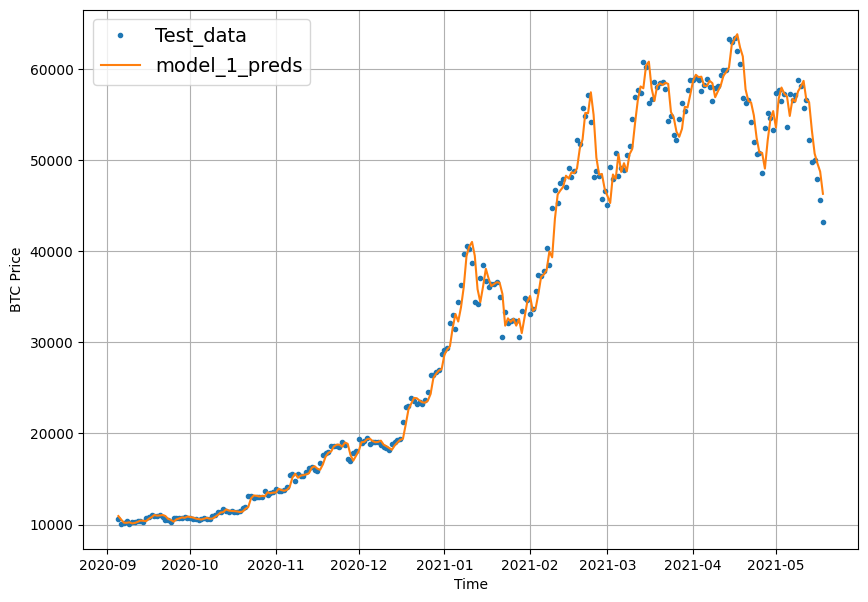

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Tính toán test_window offset và lập chỉ mục vào test_labels để đảm bảo vẽ đúng
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

Có gì sai với những dự đoán này vậy?

Như đã đề cập trước đây, chúng nằm trên tập dữ liệu kiểm tra. Do đó, chúng không phải dự báo thực tế.

Với thiết lập mô hình hiện tại, bạn nghĩ chúng ta sẽ đưa ra dự báo cho tương lai thế nào?

Hãy suy nghĩ về nó ngay bây giờ, chúng ta sẽ đề cập đến vấn đề này sau.

## Model 2: Dense (window = 30, horizon = 1)

Mô hình naïve hiện đang đánh bại mô hình DL thủ công của chúng ta.

Không thể để điều này xảy ra.

Hãy tiếp tục các thử nghiệm lập mô hình của chúng ta.

Chúng ta sẽ giữ kiến trúc mô hình trước đó nhưng sử dụng window size  là 30.

Nói cách khác, chúng ta sẽ sử dụng giá Bitcoin 30 ngày trước để thử và dự đoán giá của ngày tiếp theo.

![bitcoin prices windowed for 30 days to predict a horizon of 1 day](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-bitcoin-price-window-for-one-month.png)
*Ví dụ về giá bitcoin window trong 30 ngày để dự đoán horizon là 1.*

> 🔑 **Lưu ý:** Nhớ lại trước đó, window size (sử dụng bao nhiêu bước thời gian để dự báo) và horizon (bao nhiêu bước thời gian để dự đoán về tương lai) là các **siêu tham số**. Điều này có nghĩa là bạn có thể điều chỉnh chúng để thử và tìm các giá trị mang lại chất lượng tốt hơn.

Chúng ta sẽ bắt đầu thử nghiệm lập mô hình thứ hai bằng cách chuẩn bị tập dữ liệu sử dụng các hàm đã tạo trước đó.

In [ ]:
HORIZON = 1 # dự đoán từng bước một
WINDOW_SIZE = 30 # sử dụng 30 bước thời gian trong quá khứ

In [ ]:
# Tạo dữ liệu dạng window với horizon/window size thích hợp
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Tạo train và test window
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

Dữ liệu đã được chuẩn bị!

Bây giờ, hãy xây dựng `model_2`, một mô hình có cùng kiến trúc với `model_1` cũng như cùng một quy trình huấn luyện.

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình (cùng một mô hình với model 1 nhưng dữ liệu đầu vào sẽ khác)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # cần dự đoán horizon, số bước thời gian trong tương lai
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Một lần nữa, việc huấn luyện diễn ra khá tốt và nhanh chóng.

Hãy đánh giá chất lượng của mô hình.

In [ ]:
# Đánh giá model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.5352


631.5352172851562

Đó có phải là điều tốt nhất mà nó thực hiện được không?

Sao không thử load `model_2` hoạt động tốt nhất đã được lưu vào file nhờ `ModelCheckpoint` callback.

In [ ]:
# Load mô hình thực hiện tốt nhất
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 619.8264


619.826416015625

Tuyệt! Load lại mô hình hoạt động tốt nhất cho thấy gia tăng về chất lượng.

Không dừng lại ở đó, hãy đưa ra một số dự đoán với `model_2`, sau đó đánh giá chúng giống như chúng ta đã làm trước đây.

In [ ]:
# Nhận dự đoán dự báo
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
# Đánh giá kết quả cho các dự đoán của model 2
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # loại bỏ 1 chiều của nhãn kiểm tra
                                 y_pred=model_2_preds)
model_2_results

{'mae': 619.82635,
 'mse': 1312622.6,
 'rmse': 1145.6974,
 'mape': 2.803446,
 'mase': 1.0834626}

Có vẻ như mô `model_2` hoạt động kém hơn mô hình naïve và `model_1`!

Điều này có nghĩa là window size nhỏ hơn sẽ tốt hơn không? (Tôi sẽ để đây là một thử thách mà bạn có thể thử nghiệm)

Các dự đoán trông như thế nào?

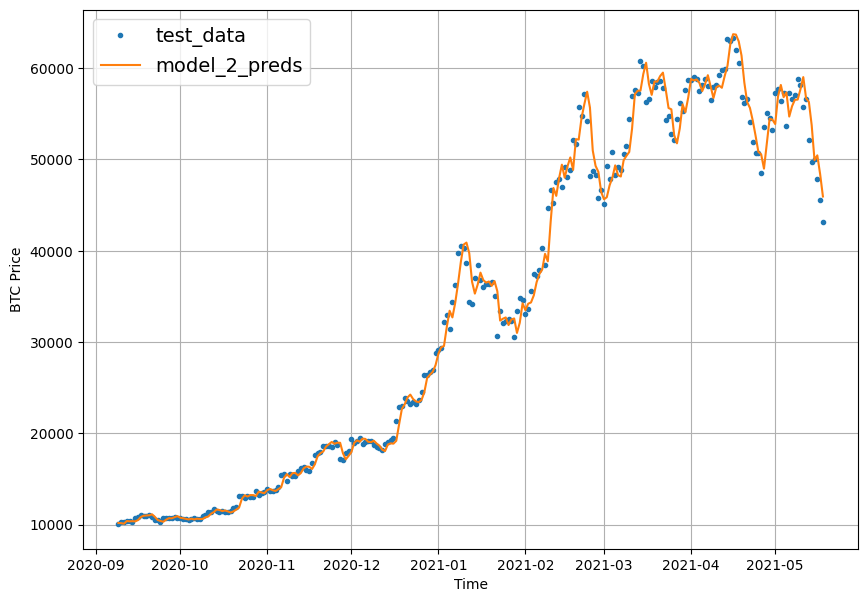

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Tính toán test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

Hãy thử và dự đoán 7 ngày trước, biết 30 ngày trước đó.

Trước tiên, hãy cập nhật các biến `HORIZON` và `WINDOW_SIZE` và tạo dữ liệu ở dạng window.

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

Chúng ta sẽ chia các dataset window đầy đủ thành các tập huấn luyện và kiểm tra.

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

Bây giờ, hãy xây dựng, biên dịch, khớp và đánh giá mô hình.

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình (giống như model_1, trừ việc kích thước đầu vào dữ liệu khác)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# Mô hình với window size và horizon lớn hơn triển khai thế nào?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1330.2920


1330.2919921875

Để so sánh tương đồng (mô hình hoạt động tốt nhất với mô hình hoạt động tốt nhất), chúng ta cần load phiên bản tốt nhất của `model_3`.

In [ ]:
# Load phiên bản tốt nhất của model_3 và đánh giá
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1249.9664


1249.9664306640625

Trong trường hợp này, sai số sẽ cao hơn vì chúng ta đang dự đoán 7 bước cùng một lúc.

Tuy nhiên, điều này có ý nghĩa vì bạn càng cố dự đoán, sai số sẽ càng lớn (hãy nghĩ đến việc cố gắng dự đoán thời tiết trước 7 ngày).

Hãy đưa ra các dự đoán với mô hình bằng cách sử dụng hàm `make_preds()` và đánh giá chúng bằng hàm `evaluate_preds()`.

In [ ]:
# Các dự đoán sẽ có 7 bước cùng một lúc (đây là HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9157.109, 9426.937, 9321.942, 9651.864, 9382.913, 9387.538,
        9570.18 ],
       [8900.882, 9085.208, 9080.23 , 9462.237, 9313.63 , 9340.539,
        9347.631],
       [8682.333, 9034.054, 8991.309, 9217.856, 9361.089, 9443.112,
        9221.469],
       [8899.521, 9041.884, 9076.905, 9105.476, 9418.21 , 9429.215,
        9321.529],
       [8652.764, 8919.298, 8873.862, 8965.739, 9103.298, 9351.918,
        9136.899]], dtype=float32)>

In [ ]:
# Tính toán kết quả của model_3 - những kết quả này sẽ đa chiều vì
# chúng ta đang cố gắng dự đoán nhiều hơn một bước tại một thời điểm.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  620.85406 ,   467.36676 ,   545.56    ,   558.0826  ,
          477.08594 ,   560.2318  ,   567.5776  ,   485.86642 ,
          533.8833  ,   628.334   ,   823.307   ,   855.0247  ,
          882.0109  ,   839.6823  ,   544.5648  ,   207.6656  ,
          104.69824 ,   244.77197 ,   256.02756 ,   336.06223 ,
          200.59354 ,   231.34898 ,   255.35861 ,   260.51633 ,
          157.26256 ,   122.889366,   129.07729 ,   216.26653 ,
          210.96526 ,   189.5978  ,   296.11063 ,   364.33154 ,
          298.58078 ,   392.83676 ,   314.29498 ,   336.31158 ,
          330.66998 ,   248.51834 ,   203.09361 ,   167.77971 ,
          462.2392  ,   136.66762 ,    91.39983 ,   143.78006 ,
          139.99965 ,    49.22503 ,   101.441895,   110.38588 ,
           94.132675,   185.71135 ,   195.02365 ,   166.85373 ,
          199.83664 ,   139.87137 ,   250.15018 ,   291.83725 ,
          516.63055 ,   545.4146  ,   460.44293 ,   533.1874  ,
          333.14426 ,   184.71387

## Làm cho hàm đánh giá hoạt động với horizon lớn hơn

Bạn sẽ nhận thấy đầu ra cho `model_3_results` là nhiều chiều.

Điều này là do các dự đoán đang được đánh giá qua các bước thời gian `HORIZON` (7 dự đoán cùng một lúc).

Để khắc phục điều này, hãy điều chỉnh hàm `evaluate_preds()` để hoạt động với nhiều shape của dữ liệu.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Đảm bảo float32 (để tính toán phép đo)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Tính toán nhiều phép đo
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Tính các phép đo có kích thước khác nhau (đối với các horizon dài hơn, giảm xuống còn một số)
  if mae.ndim > 0: # nếu mae chưa phải là một đại lượng vô hướng, hãy giảm nó thành một bằng cách tổng hợp các tensor thành mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Chúng ta đã cập nhật `evaluate_preds()` để hoạt động với nhiều shape, nó trông như thế nào?

In [ ]:
# Tổng hợp kết quả model_3 thành các giá trị đơn lẻ
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1249.9664,
 'mse': 5542703.0,
 'rmse': 1430.1896,
 'mape': 5.603833,
 'mase': 2.2242455}

Đã đến lúc trực quan hóa.

Nếu các phép đo đánh giá dự đoán có nhiều chiều, bạn nghĩ các dự đoán sẽ trông như thế nào nếu chúng ta vẽ biểu đồ của chúng?

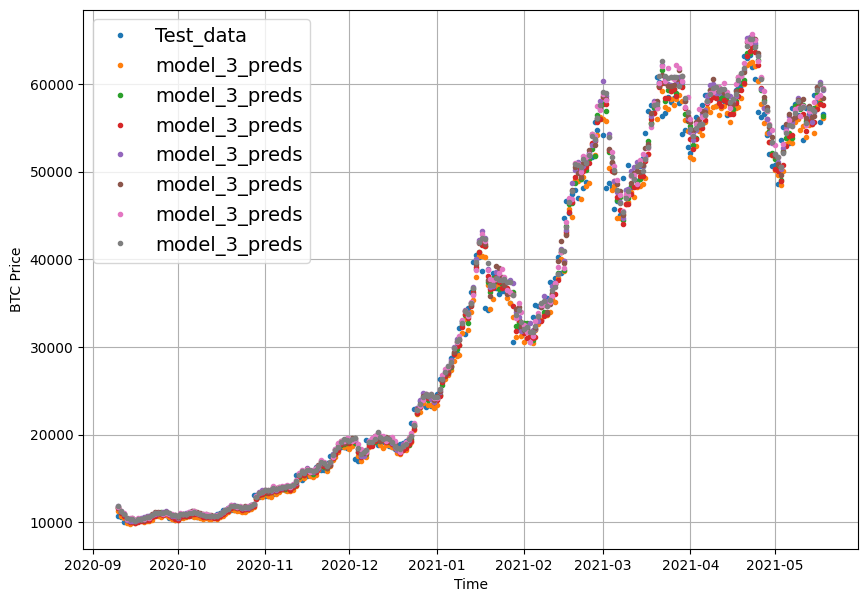

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Kiểm tra shape của model_3_preds dẫn đến [n_test_samples, HORIZON] (điều này sẽ làm sai lệch biểu đồ)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

Khi chúng ta cố gắng vẽ các dự đoán multi-horizon, chúng ta sẽ nhận được một biểu đồ trông khá kỳ lạ.

Một lần nữa, chúng ta có thể khắc phục điều này bằng cách tổng hợp các dự đoán của mô hình.

> 🔑 **Lưu ý:** Việc tổng hợp các dự đoán (ví dụ: giảm horizon 7 ngày xuống một giá trị, chẳng hạn như mean) sẽ làm mất thông tin từ dự đoán ban đầu. Như vậy, với các dự đoán của mô hình được huấn luyện để thực hiện trong 7 ngày nhưng bằng cách giảm chúng xuống còn một, chúng ta có thể vẽ chúng một cách trực quan nhưng lại mất thông tin bổ sung có trong nhiều ngày.

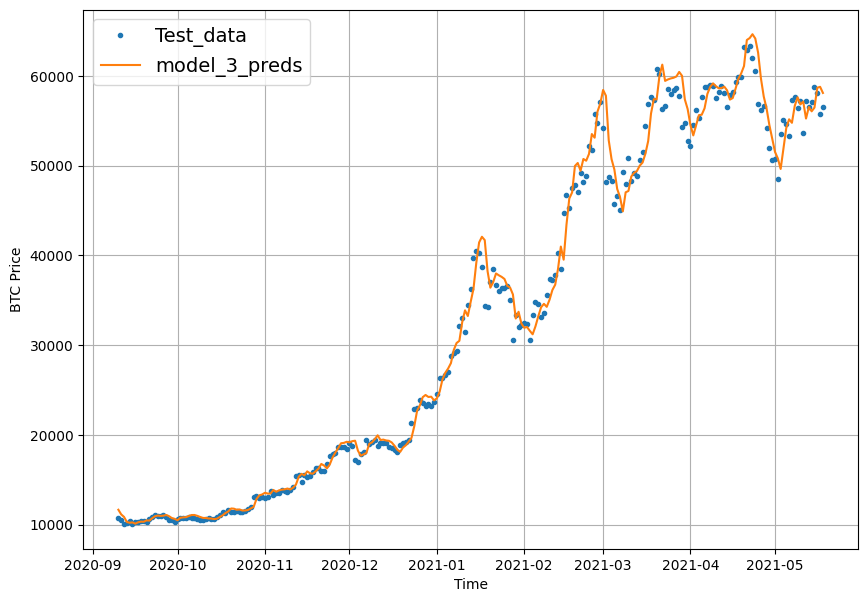

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Vẽ biểu đồ model_3_preds bằng cách tổng hợp (lưu ý: điều này cô đọng thông tin nên các preds sẽ dự đoán xa hơn so với dữ liệu kiểm tra)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

## Mô hình nào đang hoạt động tốt nhất cho đến thời điểm hiện tại?

Cho đến nay, chúng ta đã huấn luyện 3 mô hình có cùng một kiến trúc nhưng sử dụng các đầu vào dữ liệu khác nhau.

Hãy so sánh chúng với mô hình naïve để xem mô hình nào đang hoạt động tốt nhất cho tới thời điểm hiện tại.

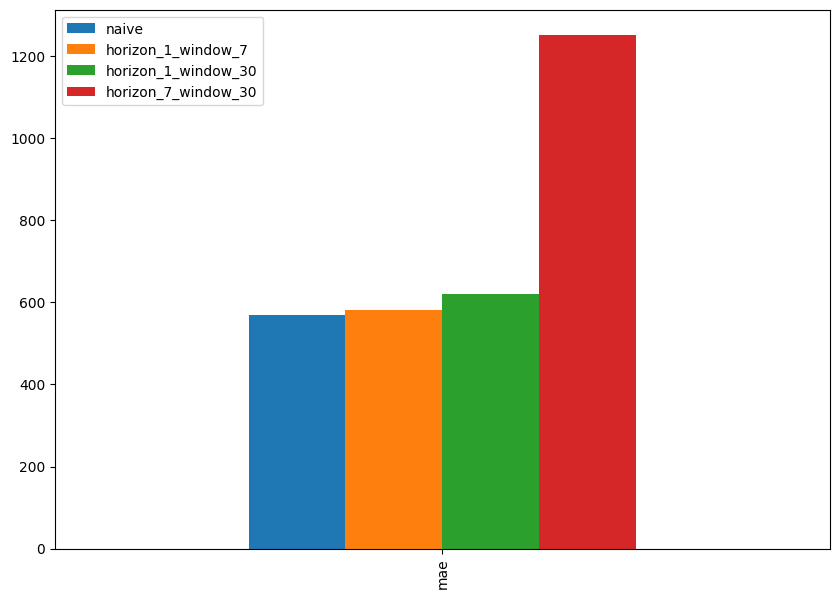

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Naïve model của chúng ta đang hoạt động tốt nhất (rất khó để đánh bại một mô hình naïve trong các hệ thống mở) nhưng dense model với horizon là 1 và window size là 7 có vẻ đang hoạt động sát nhất.

Do đó, hãy sử dụng `HORIZON=1` và `WINDOW_SIZE=7` cho loạt thử nghiệm lập mô hình tiếp theo (nói cách khác, chúng ta sẽ sử dụng giá Bitcoin của tuần trước để thử và dự đoán giá ngày hôm sau).

> 🔑 **Lưu ý:** Bạn có thể đang thắc mắc, tại sao kết quả naïve lại tốt như vậy? Một trong những nguyên nhân có thể là do **autocorrelation (tự tương quan)** trong dữ liệu. Nếu chuỗi thời gian có **autocorrelation**, điều đó có nghĩa là giá trị tại `t+1` (bước thời gian tiếp theo) thường gần với giá trị tại `t` (bước thời gian hiện tại). Nói cách khác, giá trị của ngày hôm nay có lẽ khá gần với giá trị của ngày hôm qua. Tất nhiên, điều này không phải lúc nào cũng đúng nhưng sự thật là vậy, naïve model thường sẽ nhận được kết quả khá tốt.

> 📖 **Tài liệu:** Để biết thêm về cách autocorrelation ảnh hưởng đến dự đoán của mô hình, hãy xem tài liệu [*How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls*](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424) của Vegard Flovik

## Model 4: Conv1D

Hãy đến với thử nghiệm lập mô hình tiếp theo!

Lần này, chúng ta sẽ sử dụng Conv1D model. Vì như chúng ta đã thấy trong notebook về lập mô hình chuỗi, Conv1D model có thể sử dụng cho các bài toán seq2seq (sequence to sequence).

Trong trường hợp này, chuỗi đầu vào là dữ liệu giá Bitcoin 7 ngày trước và đầu ra là giá trong ngày tiếp theo (theo seq2seq, đây là bài toán many to one).

![bitcoin prediction in seq2seq terms](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-bitcoin-forecast-in-seq2seq-terms.png)
*Định khung dự báo Bitcoin theo seq2seq (sequence to sequence). Sử dụng window size là 7 và horizon là 1 dẫn đến bài toán many-to-one. Sử dụng window size > 1 và horizon > 1 dẫn đến bài toán many-to-many. Sơ đồ trích từ [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) của Andrei Karpathy.*

Trước khi xây dựng Conv1D model, hãy tạo lại tập dữ liệu.

In [ ]:
HORIZON = 1 # dự đoán ngày tiếp theo
WINDOW_SIZE = 7 # sử dụng giá trị dữ liệu của tuần trước

In [ ]:
# Tạo tập dữ liệu ở dạng window
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Tạo train/test split
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

Dữ liệu đã ở dạng window!

Bây giờ, do chúng ta sẽ sử dụng [Conv1D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), nên cần đảm bảo rằng các shape đầu vào chính xác.

Conv1D layer trong TensorFlow nhận đầu vào: `(batch_size, timesteps, input_dim)`.

Trong trường hợp này, `batch_size` (theo mặc định là 32 nhưng chúng ta có thể thay đổi) đã được xử lý giúp chúng ta nhưng các giá trị khác sẽ là:
* `timesteps = WINDOW_SIZE` - `timesteps` cũng thường được gọi là `features`, những đặc trưng này là các giá trị `WINDOW_SIZE` trước đó của Bitcoin
* `input_dim = HORIZON` - mô hình lần lượt xem dữ liệu `WINDOW_SIZE` (một tuần) để dự đoán `HORIZON` (một ngày)

Hiện tại, dữ liệu đã có `timesteps` dimension nhưng chúng ta sẽ cần điều chỉnh nó để có `input_dim` dimension.

In [ ]:
# Kiểm tra shape của mẫu dữ liệu
train_windows[0].shape # trả về (WINDOW_SIZE, )

(7,)

Để khắc phục điều này, chúng ta có thể điều chỉnh shape của tất cả `train_windows` hoặc sử dụng [`tf.keras.layers.Lamdba`](https://keras.io/api/layers/core_layers/lambda/) (còn gọi là Lambda layer) để thực hiện việc này trong mô hình.

Lambda layer bọc một hàm thành một layer, có thể sử dụng với một mô hình.

Hãy thử.

In [ ]:
# Trước khi truyền dữ liệu sang Conv1D layer, chúng ta phải reshape lại dữ liệu để đảm bảo nó hoạt động
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # thêm 1 dimension cho các bước thời gian
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


Trông được đấy!

Bây giờ chúng ta đã có một Lambda layer, hãy xây dựng, biên dịch, khớp và đánh giá Conv1D model trên dữ liệu của chúng ta.

> 🔑 **Lưu ý:** Nếu bạn chạy mô hình bên dưới mà không có Lambda layer, bạn sẽ gặp lỗi shape đầu vào (một trong những lỗi phổ biến nhất khi xây dựng mạng nơ-ron).

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình
model_4 = tf.keras.Sequential([
  # Tạo Lambda layer để reshape đầu vào, nếu không có layer này, mô hình sẽ bị lỗi
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # thay đổi kích thước đầu vào để điều chỉnh window size/yêu cầu đầu vào Conv1D 3D
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Biên dịch mô hình
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Khớp mô hình
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Lambda layer trong summary trông như thế nào?

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Lambda layer xuất hiện giống như bất kỳ layer thông thường nào khác.

Đã đến lúc đánh giá Conv1D model.

In [ ]:
# Load Conv1D model hoạt động tốt nhất và đánh giá nó trên dữ liệu kiểm tra
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 571.3184


571.3184204101562

In [ ]:
# Đưa ra dự đoán
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8745.831 , 8654.731 , 8856.6875, 8650.532 , 8622.294 , 8596.881 ,
       8535.677 , 8418.8125, 8324.179 , 8385.694 ], dtype=float32)>

In [ ]:
# Đánh giá dự đoán
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 644.80035,
 'mse': 1328712.1,
 'rmse': 1152.6978,
 'mape': 2.949575,
 'mase': 1.1327356}

## Model 5: RNN (LSTM)

Như bạn có thể đoán, chúng ta cũng có thể sử dụng mạng nơ-ron hồi tiếp để lập mô hình dữ liệu chuỗi thời gian tuần tự.

> 📖 **Tài liệu:** Để biết thêm về các loại mạng nơ-ron hồi tiếp khác nhau mà bạn có thể sử dụng cho các bài toán chuỗi, hãy tham khảo phần [Recurrent Neural Networks của notebook 08](https://dev.mrdbourke.com/tensorflow-deep-learning/08_introduction_to_nlp_in_tensorflow/#recurrent-neural-networks-rnns).

Hãy sử dụng lại cùng một dữ liệu mà chúng ta đã sử dụng cho Conv1D model, ngoài việc lần này, chúng ta sẽ tạo một RNN được hỗ trợ bởi [LSTM-cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) để lập mô hình dữ liệu Bitcoin.

Một lần nữa, một trong những bước quan trọng nhất đối với mô hình LSTM là thiết lập dữ liệu đúng shape.

Layer [`tf.keras.layers.LSTM()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) lấy một tensor với `[batch, timesteps, feature]` dimension.

Như đã đề cập trước đó, `batch` dimension được chú trọng nhưng dữ liệu của chúng ta hiện chỉ có `feature` dimension (`WINDOW_SIZE`).

Để khắc phục điều này, như đã thực hiện với `Conv1D` model, chúng ta có thể sử dụng `tf.keras.layers.Lambda()` layer để điều chỉnh shape của các tensor đầu vào cho LSTM layer.








In [ ]:
tf.random.set_seed(42)

# Hãy xây dựng LSTM model với Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # mở rộng kích thước đầu vào để tương thích với LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # layer này sẽ lỗi nếu đầu vào không ở đúng shape
x = layers.LSTM(128, activation="relu")(x) # sử dụng hàm mất mát tanh dẫn đến một lỗi lớn
# print(x.shape)
# Thêm một dense layer tùy chọn khác (bạn có thể thêm nhiều layer trong số này để xem liệu chúng có cải thiện chất lượng mô hình hay không)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Biên dịch mô hình
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Có vẻ như khi lưu mô hình đã xuất hiện một số cảnh báo: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load phiên bản tốt nhất của model 5 và đánh giá trên dữ liệu kiểm tra
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 583.3878


583.3877563476562

Chúng ta đã load mô hình LSTM hoạt động tốt nhất, hãy đưa ra dự đoán với mô hình đó và đánh giá chúng.

In [ ]:
# Đưa ra dự đoán với LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8950.044, 8823.849, 8985.402, 8806.331, 8760.537, 8746.698,
       8708.495, 8560.498, 8481.994, 8526.305], dtype=float32)>

In [ ]:
# Đánh giá model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 583.38776,
 'mse': 1229313.9,
 'rmse': 1108.7443,
 'mape': 2.6221116,
 'mase': 1.0248507}

Có vẻ như ngay cả với LSTM được RNN hỗ trợ, chúng ta cũng không thể đánh bại các kết quả của naïve model.

Có lẽ thêm một biến khác sẽ giúp ích?

> 🔑 **Lưu ý:** Tôi đặt điều này một lần nữa ở đây để nhắc nhở rằng vì mạng nơ-ron là thuật toán mạnh mẽ, chúng có thể sử dụng cho hầu hết mọi bài toán; tuy nhiên, điều đó không có nghĩa là chúng sẽ đạt được  hiệu quả hoặc có kết quả khả dụng. Có lẽ bây giờ bạn đang bắt đầu nắm được manh mối về điều này.


## Tạo chuỗi thời gian đa biến

Cho đến giờ, tất cả các mô hình của chúng ta hầu như không theo kịp naïve forecast.

Và cho đến nay, tất cả chúng đều được huấn luyện trên một biến duy nhất (còn gọi là chuỗi thời gian đơn biến): giá lịch sử của Bitcoin.

Nếu việc dự đoán giá Bitcoin bằng cách sử dụng giá Bitcoin không hoạt động tốt, thì có thể việc cung cấp thêm thông tin cho mô hình của chúng ta sẽ hữu ích.

Thêm thông tin là một thuật ngữ mơ hồ vì chúng ta thực sự có thể cung cấp hầu hết mọi thứ cho (các) mô hình của mình và chúng vẫn sẽ cố gắng tìm ra các mẫu.

Ví dụ: chúng ta có thể sử dụng giá lịch sử của Bitcoin cũng như bất kỳ ai có tên [Daniel Bourke](https://twitter.com/mrdbourke) đã Tweet vào ngày đó để dự đoán giá tương lai của Bitcoin.

Nhưng điều này có giúp ích gì không?

Có thể là không.

Sẽ tốt hơn nếu chúng ta truyền cho mô hình của mình thứ gì đó liên quan đến Bitcoin (một lần nữa, điều này khá khó hiểu, vì trong một hệ thống mở như thị trường, bạn có thể thấy rằng mọi thứ đều có liên quan).

Điều này sẽ khác nhau đối với hầu hết mọi chuỗi thời gian bạn làm việc nhưng trong trường hợp này, chúng ta có thể thử xem liệu [Bitcoin block reward size](https://www.investopedia.com/terms/b/block-reward.asp) có bổ sung bất kỳ sức mạnh dự đoán nào cho (các) mô hình của chúng ta hay không.

Bitcoin block reward size là gì?

Bitcoin block reward size là số Bitcoin mà một người nào đó nhận được từ việc đào một khối Bitcoin.

Khi mới thành lập, Bitcoin block reward size là 50.

Nhưng cứ sau bốn năm hoặc lâu hơn, Bitcoin block reward lại giảm đi một nửa.

Ví dụ: block reward size từ 50 (bắt đầu từ 1/2009) giảm xuống còn thành 25 vào ngày 28/11/2012.

Hãy mã hóa thông tin này thành dữ liệu chuỗi thời gian và xem liệu nó có giúp ích cho chất lượng của mô hình hay không.

> 🔑 **Lưu ý:** Việc thêm một đặc trưng bổ sung vào tập dữ liệu như Bitcoin block reward size sẽ biến dữ liệu của chúng ta từ **đơn biến** (chỉ giá lịch sử của Bitcoin) thành **đa biến** (giá Bitcoin cũng như block reward size).

In [ ]:
# Hãy tạo chuỗi thời gian đa biến
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Được rồi, đã đến lúc thêm một cột đặc trưng khác: block reward size.

Đầu tiên, chúng ta sẽ cần tạo các biến cho các block reward size khác nhau cũng như ngày chúng bắt đầu hoạt động.

Các block reward và date sau được lấy từ [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | TBA (dự kiến 2024) |
| 1.5625 | TBA (dự kiến 2028) |

> 🔑 **Lưu ý:** Do dữ liệu lịch sử Bitcoin bắt đầu từ ngày 1/10/2013, nên không có bước thời gian nào trong chuỗi thời gian đa biến của chúng ta có block reward là 50.

In [ ]:
# Các giá trị block reward
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - block reward này không có trong tập dữ liệu của chúng ra (nó bắt đầu từ 01/10/2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (dạng datetime của các date stamp ở trên)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

Chúng ta sẽ lấy days (chỉ mục) cho các giá trị block reward khác nhau.

Điều này rất quan trọng vì nếu chúng ta sử dụng nhiều biến cho chuỗi thời gian của mình, chúng phải có cùng tần suất với biến ban đầu. Ví dụ: nếu giá Bitcoin của chúng ta là giá hàng ngày, chúng ta cũng cần các giá trị block reward là giá trị hàng ngày.

> 🔑 **Lưu ý:** Để sử dụng nhiều biến, hãy đảm bảo rằng chúng có cùng tần suất với nhau. Nếu các biến của bạn không có cùng tần suất (ví dụ: giá Bitcoin là hàng ngày nhưng block reward là hàng tuần), bạn có thể sẽ cần biến đổi chúng sao cho sử dụng được với mô hình của bạn.

In [ ]:
# Lấy chỉ mục date cho thời gian thêm các block date khác nhau
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

 Giờ đây, chúng ta có thể thêm một đặc trưng khác vào tập dữ liệu `block_reward` (điều này sẽ càng ngày càng giảm theo thời gian, vì vậy nó có thể dẫn đến việc tăng giá của Bitcoin).

In [ ]:
# Thêm cột block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Thiết lập giá trị của cột block_reward (đó là cột cuối cùng, do đó lập chỉ mục -1 trên iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


Chúng ta đã chính thức thêm một biến khác vào dữ liệu chuỗi thời gian của mình.

Hãy xem nó trông như thế nào.

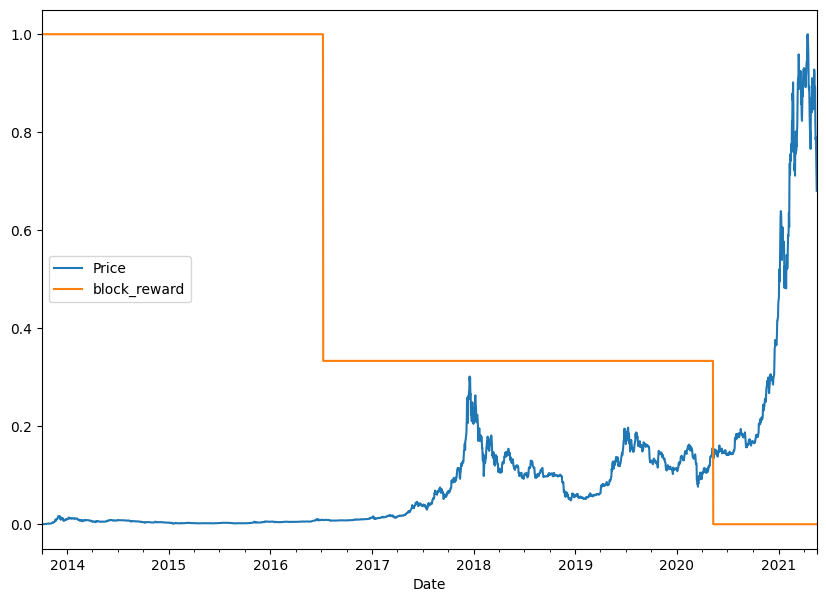

In [ ]:
# Vẽ biểu đồ block reward/price theo thời gian
# Lưu ý: Do các thang giá trị khác nhau, chúng ta sẽ chia tỷ lệ chúng từ 0 đến 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Khi chia tỷ lệ block reward và giá Bitcoin, chúng ta có thể thấy giá tăng lên khi block reward giảm, có lẽ thông tin này sẽ hữu ích đối với chất lượng của mô hình.

## Tạo tập dữ liệu ở dạng window với pandas

Trước đây, chúng ta đã sử dụng một số hàm được tạo tùy chỉnh để hiển thị chuỗi thời gian **đơn biến**.

Tuy nhiên, vì chúng ta vừa thêm một biến khác vào tập dữ liệu của mình nên các hàm này sẽ không hoạt động.

Không cần lo lắng. Vì dữ liệu nằm trong pandas DataFrame, chúng ta có thể tận dụng phương thức [`pandas.DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) để tạo chuỗi thời gian **đa biến** ở dạng window.

Phương thức `shift()` dịch chuyển một chỉ mục theo một số khoảng thời gian cụ thể.

Hãy xem nó hoạt động thế nào.

In [ ]:
# Thiết lập siêu tham số cho tập dữ liệu
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Tạo bản sao dữ liệu lịch sử Bitcoin với đặc trưng block reward
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Thêm các cột có window
for i in range(WINDOW_SIZE): # Dịch chuyển giá trị cho mỗi bước trong WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Bây giờ chúng ta đã có một tập dữ liệu dạng window, hãy tách các đặc trưng (`X`) khỏi các nhãn (`y`).

Hãy nhớ rằng trong tập dữ liệu dạng window, chúng ta đang cố gắng sử dụng các bước `WINDOW_SIZE` trước đó để dự đoán các bước `HORIZON`.

```
Window trong một tuần (7) để dự đoán horizon là 1 (chuỗi thời gian đa biến)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

Chúng ta cũng sẽ xóa các giá trị `NaN` bằng phương thức  [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) trong pandas, điều này tương đương với việc bắt đầu hàm windowing ở mẫu `sample 0 (the first sample) + WINDOW_SIZE`.

In [ ]:
# Hãy tạo X & y, xóa NaN và chuyển đổi thành float32 để ngăn lỗi TensorFlow
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# Hiển thị các nhãn
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

Tập dữ liệu khá tốt, hãy tách nó thành các tập huấn luyện và kiểm tra bằng cách sử dụng 80/20 split giống như chúng ta đã thực hiện trước đây.

In [ ]:
# Tạo các tập huấn luyện và kiểm tra
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Chúng ta đã thực hiện các tập dữ liệu chuỗi thời gian đa biến huấn luyện và kiểm tra! Giờ hãy xây dựng một mô hình.

## Model 6: Dense (chuỗi thời gian đa biến)

Để đơn giản hóa mọi thứ, hãy sử dụng kiến trúc `model_1` để huấn luyện và đưa ra dự đoán trên dữ liệu chuỗi thời gian đa biến.

Bằng cách sao chép kiến trúc `model_1`, chúng ta có thể xem xét việc thêm đặc trưng block reward có cải thiện hay làm giảm chất lượng của mô hình hay không.

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình chuỗi thời gian đa biến
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # thêm một layer bổ sung ở đây sẽ đánh bại naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Biên dịch
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Khớp
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # chỉ in 1 dòng mỗi epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Đã khớp mô hình đa biến!

Bạn có thể nhận thấy rằng mô hình đã tự động suy ra shape đầu vào của dữ liệu (dữ liệu hiện có một đặc trưng bổ sung). Thường thì trường hợp này sẽ xảy ra, tuy nhiên, nếu bạn đang gặp vấn đề về shape, bạn luôn có thể xác định rõ ràng shape đầu vào bằng cách sử dụng tham số `input_shape` của layer đầu tiên trong mô hình.

Bây giờ hãy đánh giá mô hình đa biến của chúng ta.

In [ ]:
# Đảm bảo rằng mô hình tốt nhất đã được load và đánh giá
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 574.7037


574.7037353515625

In [ ]:
# Đưa ra dự đoán về dữ liệu đa biến
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8848.296, 8761.734, 9055.566, 8755.764, 8720.733, 8788.099,
       8676.838, 8489.889, 8483.33 , 8530.348], dtype=float32)>

In [ ]:
# Đánh giá preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 574.70374,
 'mse': 1182414.9,
 'rmse': 1087.389,
 'mape': 2.5868719,
 'mase': 1.0095953}

Làm thế nào để so sánh những kết quả này với `model_1` (cùng window size và horizon nhưng không có đặc trưng block reward)?

In [ ]:
model_1_results

{'mae': 581.69366,
 'mse': 1220471.5,
 'rmse': 1104.7495,
 'mape': 2.614294,
 'mase': 1.0218747}

Có vẻ như việc thêm block reward đã giúp ích một chút cho mô hình của chúng ta.

Nhưng chúng ta có thể thử một vài điều nữa.

> 📖 **Tài liệu:** Để biết các ý tưởng khác về cách cải thiện mô hình mạng nơron (từ góc độ mô hình), hãy tham khảo phần [*Improving a model*](https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model) trong notebook 02.


> 🛠 **Thực hành:**
> 1. Hãy thử thêm một layer `tf.keras.layers.Dense()` bổ sung với 128 nút ẩn vào `model_6`, điều này tác động thế nào đến chất lượng của mô hình?
> 2. Có cách nào tốt hơn để tạo mô hình này không? Có nên kết hợp đặc trưng `block_reward` với đặc trưng giá lịch sử của Bitcoin không? Có lẽ bạn có thể kiểm tra xem việc xây dựng mô hình đa đầu vào (ví dụ: một đầu vào mô hình cho lịch sử giá Bitcoin và một đầu vào mô hình cho `block_reward) có hoạt động tốt hơn không? Xem [*Model 4: Hybrid embedding*](https://dev.mrdbourke.com/tensorflow-deep-learning/09_SkimLit_nlp_milestone_project_2/#model-4-combining-pretrained-token-embeddings-character-embeddings-hybrid-embedding-layer) trong notebook 09 để biết nắm được ý tưởng về cách tạo mô hình có nhiều đầu vào.

## Model 7: Thuật toán N-BEATS

Đã đến lúc tăng cường độ mọi thứ.

Cho đến giờ, chúng ta đã thử một loạt các mô hình nhỏ hơn, các mô hình chỉ có một vài layer.

Tuy nhiên, một trong những cách tốt nhất để cải thiện chất lượng của mô hình là tăng số lượng layer.

Đó chính xác là những gì mà [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting)](https://arxiv.org/pdf/1905.10437.pdf) thực hiện.

Thuật toán N-BEATS tập trung vào các bài toán chuỗi thời gian đơn biến và đạt được chất lượng vượt bậc khi giành chiến thắng trong [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (một cuộc thi dự báo).

Đối với thử nghiệm lập mô hình tiếp theo, chúng ta sẽ tái tạo **kiến ​​trúc chung** của thuật toán N-BEATS (xem [phần 3.3 của tài liệu N-BEATS](https://arxiv.org/pdf/1905.10437.pdf)).

Chúng ta sẽ không xem qua tất cả các chi tiết trong tài liệu, thay vào đó chúng ta sẽ tập trung vào:
1. Tái tạo kiến ​​trúc mô hình trong [Figure 1 của tài liệu N-BEATS](https://arxiv.org/pdf/1905.10437.pdf)

![figure 1 from N-BBEATS paper, the algorithm we're going to build](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-figure-1-nbeats-paper-annotated.png)
*Thuật toán N-BEATS mà chúng ta sẽ tái tạo với TensorFlow với các chú thích window (đầu vào) và horizon (đầu ra).*

2. Sử dụng các siêu tham số tương tự như tài liệu trong [Phụ lục D của tài liệu N-BEATS](https://arxiv.org/pdf/1905.10437.pdf)

Làm như vậy sẽ cho chúng ta cơ hội để thực hành:
* Tạo một layer tùy chỉnh cho `NBeatsBlock` bằng cách phân lớp [`tf.keras.layers.Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
  * Tạo  một layer tùy chỉnh rất hữu ích khi TensorFlow chưa có phần lập trình layer hiện có hoặc nếu bạn muốn cấu hình layer lặp lại một số lần (ví dụ như một stack các khối N-BEATS)
* Lập trình kiến ​​trúc tùy chỉnh bằng Functional API
* Tìm một tài liệu liên quan đến bài toán của chúng ta và xem nó mô tả thế nào

> 🔑 **Lưu ý:** Như bạn sẽ thấy, các tác giả nói rằng “N-BEATS được lập trình và huấn luyện trong TensorFlow”, đó là những gì chúng ta sẽ làm!


### Xây dựng và thử nghiệm N-BEATS block layer

Hãy bắt đầu bằng cách xây dựng N-BEATS block layer, chúng ta sẽ viết code trước, sau đó thảo luận về những gì đang diễn ra.

In [ ]:
# Tạo layer NBeatsBlock tùy chỉnh
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # hàm tạo lấy tất cả các siêu tham số cho layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # đối số **kwargs quản lý tất cả các đối số cho parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block chứa stack của 4 layer được kết nối đầy đủ, mỗi layer có kích hoạt ReLU
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Đầu ra của block là theta layer với kích hoạt tuyến tính
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # phương thức call là những gì sẽ chạy khi layer được gọi
    x = inputs
    for layer in self.hidden: # chuyển đầu vào qua mỗi layer ẩn
      x = layer(x)
    theta = self.theta_layer(x)
    # Xuất ra backcast và dự báo từ theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Thiết lập layer tùy chỉnh  `NBeatsBlock` mà chúng ta thấy:


* Class kế thừa từ `tf.keras.layers.Layer` (điều này cung cấp cho nó tất cả các phương thức được liên kết với `tf.keras.layers.Layer`)
* Hàm tạo  (`def __init__(...)`) nhận tất cả các siêu tham số cũng như đối số `**kwargs` của layer
  * Đối số `**kwargs` chú ý đến tất cả các siêu tham số không được đề cập trong hàm tạo như `input_shape`, `trainable` và `name`
* Trong hàm tạo, các layer kiến ​​trúc khối được tạo:
  * Các layer ẩn được tạo ra dưới dạng stack của các lớp nút ẩn `n_nuerons` được kết nối đầy đủ với kích hoạt ReLU
  * Theta layer sử dụng các nút ẩn `theta_size` cũng như kích hoạt tuyến tính
* Phương thức `call()` là phương thức sẽ chạy khi layer được gọi:
  * Đầu tiên, nó chuyển các đầu vào (dữ liệu Bitcoin lịch sử) qua mỗi layer ẩn (một stack của các layer được kết nối đầy đủ với kích hoạt ReLU)
  * Sau khi các đầu vào đã đi qua từng layer được kết nối đầy đủ, chúng sẽ được chuyển qua theta layer, nơi trả về backcast (dự đoán ngược, shape: `input_size`) và forecast (dự đoán xuôi, shape: `horizon`)

![code mapping to image of N-BEATS basic block](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-basic-block-replication-with-tensorflow-layer-subclassing.png)
*Sử dụng phân lớp TensorFlow layer để tái tạo khối N-BEATS cơ bản. Xem phần 3.1 của tài liệu N-BEATS để biết thêm chi tiết.*

Hãy cùng xem bản sao block hoạt động thế nào bằng cách tạo ra một phiên bản giả lập của `NBeatsBlock`.

> 📖  **Tài liệu:**  Phần lớn việc tạo ra các tài liệu chuỗi thời gian (những thứ bạn đang xem bây giờ), bao gồm cả việc tái tạo thuật toán N-BEATS đã được phát trực tiếp trên Twitch. Nếu bạn muốn xem các bản phát lại về cách tái tạo thuật toán, hãy xem [*Time series research and TensorFlow course material creation playlist*](https://youtube.com/playlist?list=PL8IpyNZ21vUSCM7nRAuS-hW_E-sgwdmaI) trên kênh YouTube Daniel Bourke arXiv.

In [ ]:
# Thiết lập NBeatsBlock layer giả để biểu diễn đầu vào và đầu ra
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Tạo đầu vào giả (phải có cùng kích thước với input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # shape đầu vào cho mô hình phải phản ánh các yêu cầu đầu vào của Dense layer (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Truyền đầu vào giả cho NBeatsBlock layer giả
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# Đây là các đầu ra kích hoạt của theta layer (chúng sẽ ngẫu nhiên do không có huấn luyện mô hình)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.23847662 -0.20760505 -0.3736871  -0.2609824   0.07809563 -0.03338331
 -0.2230707 ]
Forecast: -0.6362340450286865


### Chuẩn bị dữ liệu cho thuật toán N-BEATS bằng `tf.data`

Thành phần cơ bản cho kiến trúc N-BEATS đã sẵn sàng hoạt động.

Nhưng trước khi chúng ta sử dụng nó để tái tạo toàn bộ kiến trúc chung N-BEATS, hãy tạo một số dữ liệu.

Lần này, do chúng ta sẽ sử dụng một kiến trúc mô hình lớn hơn, để đảm bảo việc huấn luyện mô hình chạy nhanh nhất có thể, chúng ta sẽ thiết lập tập dữ liệu của mình bằng `tf.data` API.

Và vì thuật toán N-BEATS tập trung vào chuỗi thời gian đơn biến, chúng ta sẽ bắt đầu bằng cách tạo các tập dữ liệu huấn luyện và kiểm tra ở dạng window về giá Bitcoin (như chúng ta đã làm ở trên).


In [ ]:
HORIZON = 1 # dự đoán về tương lai
WINDOW_SIZE = 7 # xem xét quá khứ

In [ ]:
# Tạo đầu vào dữ liệu NBEATS (NBEATS hoạt động với chuỗi thời gian đơn biến)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Thêm cột ở dạng window
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Tạo các đặc trưng và nhãn
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Tạo các tập huấn luyện và kiểm tra
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Tập huấn luyện và kiểm tra đã sẵn sàng!

Bây giờ, hãy chuyển đổi chúng thành TensorFlow `tf.data.Dataset` để đảm bảo chúng chạy nhanh nhất có thể trong khi huấn luyện.

Chúng ta sẽ làm điều này bằng cách:
1. Biến các mảng trong tensor Datasets sử dụng [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
  * Lưu ý: `from_tensor_slices()` hoạt động tốt nhất khi dữ liệu của bạn khớp với bộ nhớ, đối với những tập dữ liệu cực lớn, bạn sẽ cần sử dụng định dạng [`TFRecord`](https://www.tensorflow.org/tutorials/load_data/tfrecord)
2. Kết hợp các nhãn và tensor đặc trưng thành một Dataset bằng cách sử dụng [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch và prefetch Datasets bằng [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) và [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch)
  * Batching và prefetching đảm bảo thời gian load từ CPU (chuẩn bị dữ liệu) đến GPU (tính toán trên dữ liệu) càng nhỏ càng tốt

> 📖 **Tài liệu:** Để biết thêm về cách xây dựng TensorFlow data pipeline hiệu suất cao, hãy đọc qua hướng dẫn [*Better performance with the tf.data API*](https://www.tensorflow.org/guide/data_performance).

In [ ]:
# 1. Biến mảng huấn luyện và kiểm tra thành tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Kết hợp các đặc trưng & nhãn
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch và prefetch cho chất lượng tối ưu
BATCH_SIZE = 1024 # từ Appendix D trong tài liệu N-BEATS
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Dữ liệu đã được chuẩn bị! Lưu ý shape đầu vào cho các đặc trưng `(None, 7)`, `None` để trống không gian cho batch size, trong đó `7` đại diện cho `WINDOW_SIZE`.

Bây giờ hãy tạo kiến trúc N-BEATS.

### Thiết lập siêu tham số cho thuật toán N-BEATS

Bạn thấy đó! Tập dữ liệu đã sẵn sàng, thành phần xây dựng mô hình đã sẵn sàng, hãy kết hợp mọi thứ lại với nhau.

Hay đó!

Được rồi.

Triển thôi.

Để bắt đầu, chúng ta sẽ tạo các biến cho từng siêu tham số mà chúng ta sẽ sử dụng cho phiên bản N-BEATS.

> 📖 **Tài liệu:** Các siêu tham số sau được lấy từ Hình 1 và Bảng 18/Phụ lục D của tài liệu [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf).

![table 18 from N-BEATS paper](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-table-18-hyperparameters.png)
*Bảng 18 từ giấy N-BEATS Bảng 18 từ tài liệu [N-BEATS](https://arxiv.org/pdf/1905.10437.pdf) mô tả các siêu tham số được sử dụng cho các biến thể khác nhau của N-BEATS. Chúng ta đang sử dụng N-BEATS-G, là viết tắt của phiên bản chung của N-BEATS.*

> 🔑 **Lưu ý:** Nếu bạn thấy các biến trong một ví dụ ML được viết hoa toàn bộ, chẳng hạn như "`N_EPOCHS = 100`", các biến này thường là những siêu tham số được sử dụng trong ví dụ này. Thông thường, bạn sẽ thấy chúng được khởi tạo trước khi bắt đầu thử nghiệm, sau đó nó sẽ được dùng xuyên suốt.



In [ ]:
# Giá trị từ tài liệu N-BEATS: Hình 1 và Bảng 18/Phụ lục D
N_EPOCHS = 5000 # được gọi là "Iterations" trong Bảng 18
N_NEURONS = 512 # được gọi là "Width" trong Bảng 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # được gọi là "Lookback" trong Bảng 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Chuẩn bị các residual connection

Tuyệt! Các siêu tham số đã sẵn sàng, trước khi chúng ta tạo mô hình N-BEATS, cần đi qua 2 layer, chiếm 1 phần lớn trong kiến trúc.

Chúng tạo điều kiện cho **double residual stacking** của N-BEATS (phần 3.2 của tài liệu [N-BEATS](https://arxiv.org/pdf/1905.10437.pdf):
* [`tf.keras.layers.subtract(inputs)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/subtract) - trừ danh sách các tensor đầu vào với nhau
* [`tf.keras.layers.add(inputs)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) - cộng danh sách các tensor đầu vào với nhau

Hãy khám phá chúng.

In [ ]:
# Tạo các tensor
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Trừ
subtracted = layers.subtract([tensor_1, tensor_2])

# Cộng
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


Cả hai hàm layer này đều đơn giản, trừ hoặc cộng các đầu vào của chúng lại với nhau.

Như đã đề cập trước đây, chúng trợ giúp N-BEATS double residual stacking.

Khả năng của **residual stacking** hoặc **residual connection** đã được tiết lộ trong [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385), trong đó các tác giả xây dựng một mạng nơ-ron sâu hơn nhưng ít phức tạp hơn (đây là điều đã giới thiệu [kiến trúc ResNet](https://en.wikipedia.org/wiki/Residual_neural_network) phổ biến) so với những nỗ lực trước đây.

Mạng nơ-ron sâu hơn này đã dẫn đến các kết quả tiên tiến trong thử thách ImageNet 2015, từ đó, các phiên bản khác của residual connection đã xuất hiện trong DL.

> Residual connection dư là gì?

**Residual connection** (còn gọi là skip connection) liên quan đến layer mạng nơ ron sâu hơn nhận các đầu ra cũng như các đầu vào của layer mạng nơ ron nông hơn.

Trong trường hợp N-BEATS, kiến ​​trúc sử dụng residual connection:
* Lấy các đầu vào backcast cho block hiện tại trừ đi các đầu ra backcast từ block trước đó
* Cộng đầu ra forecast từ tất cả các block với nhau trong một stack

![N-BEATS architecture double residual stacking](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-architecture-double-residual-stacking.png)
*Chú thích Hình 1 từ tài liệu N-BEATS nêu bật double residual stacking (phần 3.2) của kiến ​​trúc. Backcast residual của mỗi block được trừ cho nhau và được sử dụng làm đầu vào cho block tiếp theo, trong đó các dự báo của mỗi block được cộng lại với nhau thành stack forecast.*

> Residual connection có lợi ích gì?

Trong thực tế, residual connection có lợi cho việc huấn luyện các mô hình sâu hơn (N-BEATS đạt đến ~ 150 layer, hãy xem "These approaches provide clear advantages in improving the trainability of deep architectures" trong phần 3.2 của [tài liệu N-BEATS](https://arxiv.org/pdf/1905.10437.pdf)).

Người ta cho rằng chúng giúp tránh được bài toán [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) (các mẫu được học bởi mạng nơ-ron không được truyền qua các layer sâu hơn).



### Xây dựng, biên dịch và khớp thuật toán N-BEATS

Cuối cùng chúng ta đã có tất cả các mảnh ghép sẵn sàng để xây dựng và huấn luyện thuật toán N-BEATS.

Chúng ta sẽ thực hiện các bước sau:

1. Thiết lập một instance của N-BEATS block layer bằng `NBeatsBlock` (đây sẽ là block ban đầu được sử dụng cho mạng, phần còn lại sẽ được tạo như một phần của stack)
2. Tạo một layer đầu vào cho N-BEATS stack (chúng ta sẽ sử dụng [Keras Functional API](https://www.tensorflow.org/guide/keras/functional) cho việc này)
3. Tạo backcast và forecast ban đầu cho mô hình với layer được tạo trong (1)
4. Sử dụng vòng lặp for để tạo stack của các block layer
5. Sử dụng NBeatsBlock class trong vòng lặp for được tạo ở (4) để tạo các block trả về backcast và forecast ở cấp block
6. Tạo double residual stacking bằng cách trừ và cộng layer
7. Kết hợp các đầu vào và đầu ra của mô hình với nhau bằng [`tf.keras.Model()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
8. Biên dịch mô hình có MAE loss (tài liệu sử dụng nhiều loss nhưng chúng ta sẽ sử dụng MAE để phù hợp với các mô hình khác) và Adam optimizer với thiết lập mặc định theo phần 5.2 của tài liệu [N-BEATS](https://arxiv.org/pdf/1905.10437.pdf))
9. Khớp mô hình N-BEATS trong 5000 epoch và vì nó khớp với rất nhiều epoch, chúng ta sẽ sử dụng một số callback:
  * [`tf.keras.callbacks.EarlyStopping()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - ngừng huấn luyện mô hình nếu nó không cải thiện validation loss trong 200 epoch và khôi phục trọng số hoạt động tốt nhất bằng `restore_best_weights=True` (điều này sẽ ngăn mô hình huấn luyện trong khoảng thời gian dài mà không có cải thiện)
  * [`tf.keras.callbacks.ReduceLROnPlateau()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) - nếu validation loss của mô hình không cải thiện trong 100 epoch, hãy giảm learning rate xuống 10 lần để thử và giúp nó cải thiện dần dần (learning rate càng nhỏ, mô hình sẽ càng tạo ra các cải thiện nhỏ hơn)

Khá nhiều bước đó. Nhưng tôi chắc chắn rằng bạn sẽ làm được.

Hãy thực hiện!

In [ ]:
 %%time

tf.random.set_seed(42)

# 1. Thiết lập N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Tạo input cho các stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Tạo đầu vào backcast và forecast ban đầu (trong tài liệu, dự đoán ngược được gọi là residual)
backcast, forecast = nbeats_block_layer(stack_input)
# Thêm liên kết subtraction residual: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Tạo các stack chứa block
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Sử dụng NBeatsBlock để tính toán backcast cũng như block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # truyền nó trong residual (backcast)

  # 6. Tạo double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Kết hợp stack model với nhau
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Biên dịch với MAE loss và Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Khớp mô hình với EarlyStopping và ReduceLROnPlateau callback
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # ngăn cản lượng lớn kết quả huấn luyện
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # lưu mô hình mỗi epoch tiêu tốn quá nhiều thời gian
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 471: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 571: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 29s, sys: 3.88 s, total: 2min 33s
Wall time: 2min 51s


Bạn thấy đó! Thuật toán N-BEATS phù hợp với dữ liệu lịch sử Bitcoin của chúng ta.

Nó đã hoạt động như thế nào?

In [ ]:
# Đánh giá mô hình N-BEATS trên tập kiểm tra
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 24ms/step - loss: 577.4219 - mae: 577.4219 - mse: 1149178.6250


[577.421875, 577.421875, 1149178.625]

In [ ]:
# Đưa ra dự đoán với mô hình N-BEATS
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8833.729, 8821.663, 9015.139, 8804.639, 8876.746, 8848.121,
       8651.08 , 8582.877, 8550.018, 8542.847], dtype=float32)>

In [ ]:
# Đánh giá dự đoán mô hình N-BEATS
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 577.4219,
 'mse': 1149178.6,
 'rmse': 1071.9974,
 'mape': 2.63983,
 'mase': 1.0143703}

Ngay cả với tất cả các layer đặc biệt đó và mạng thủ công, có vẻ như mô hình N-BEATS không hoạt động tốt như `model_1` hoặc naive forecast ban đầu.

Điều này cho thấy sức mạnh của các mạng nhỏ hơn cũng như thực tế rằng: không phải tất cả các mô hình lớn hơn đều phù hợp hơn với một loại dữ liệu nhất định.

### Vẽ sơ đồ kiến trúc N-BEATS mà chúng ta đã tạo

Bạn biết điều gì tuyệt vời không?

Đó là chúng ta có thể vẽ mô hình N-BEATS mà chúng ta đã tạo.

Chúng ta có thể sử dụng [`tensorflow.keras.utils.plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

Hãy xem nó trông như thế nào.

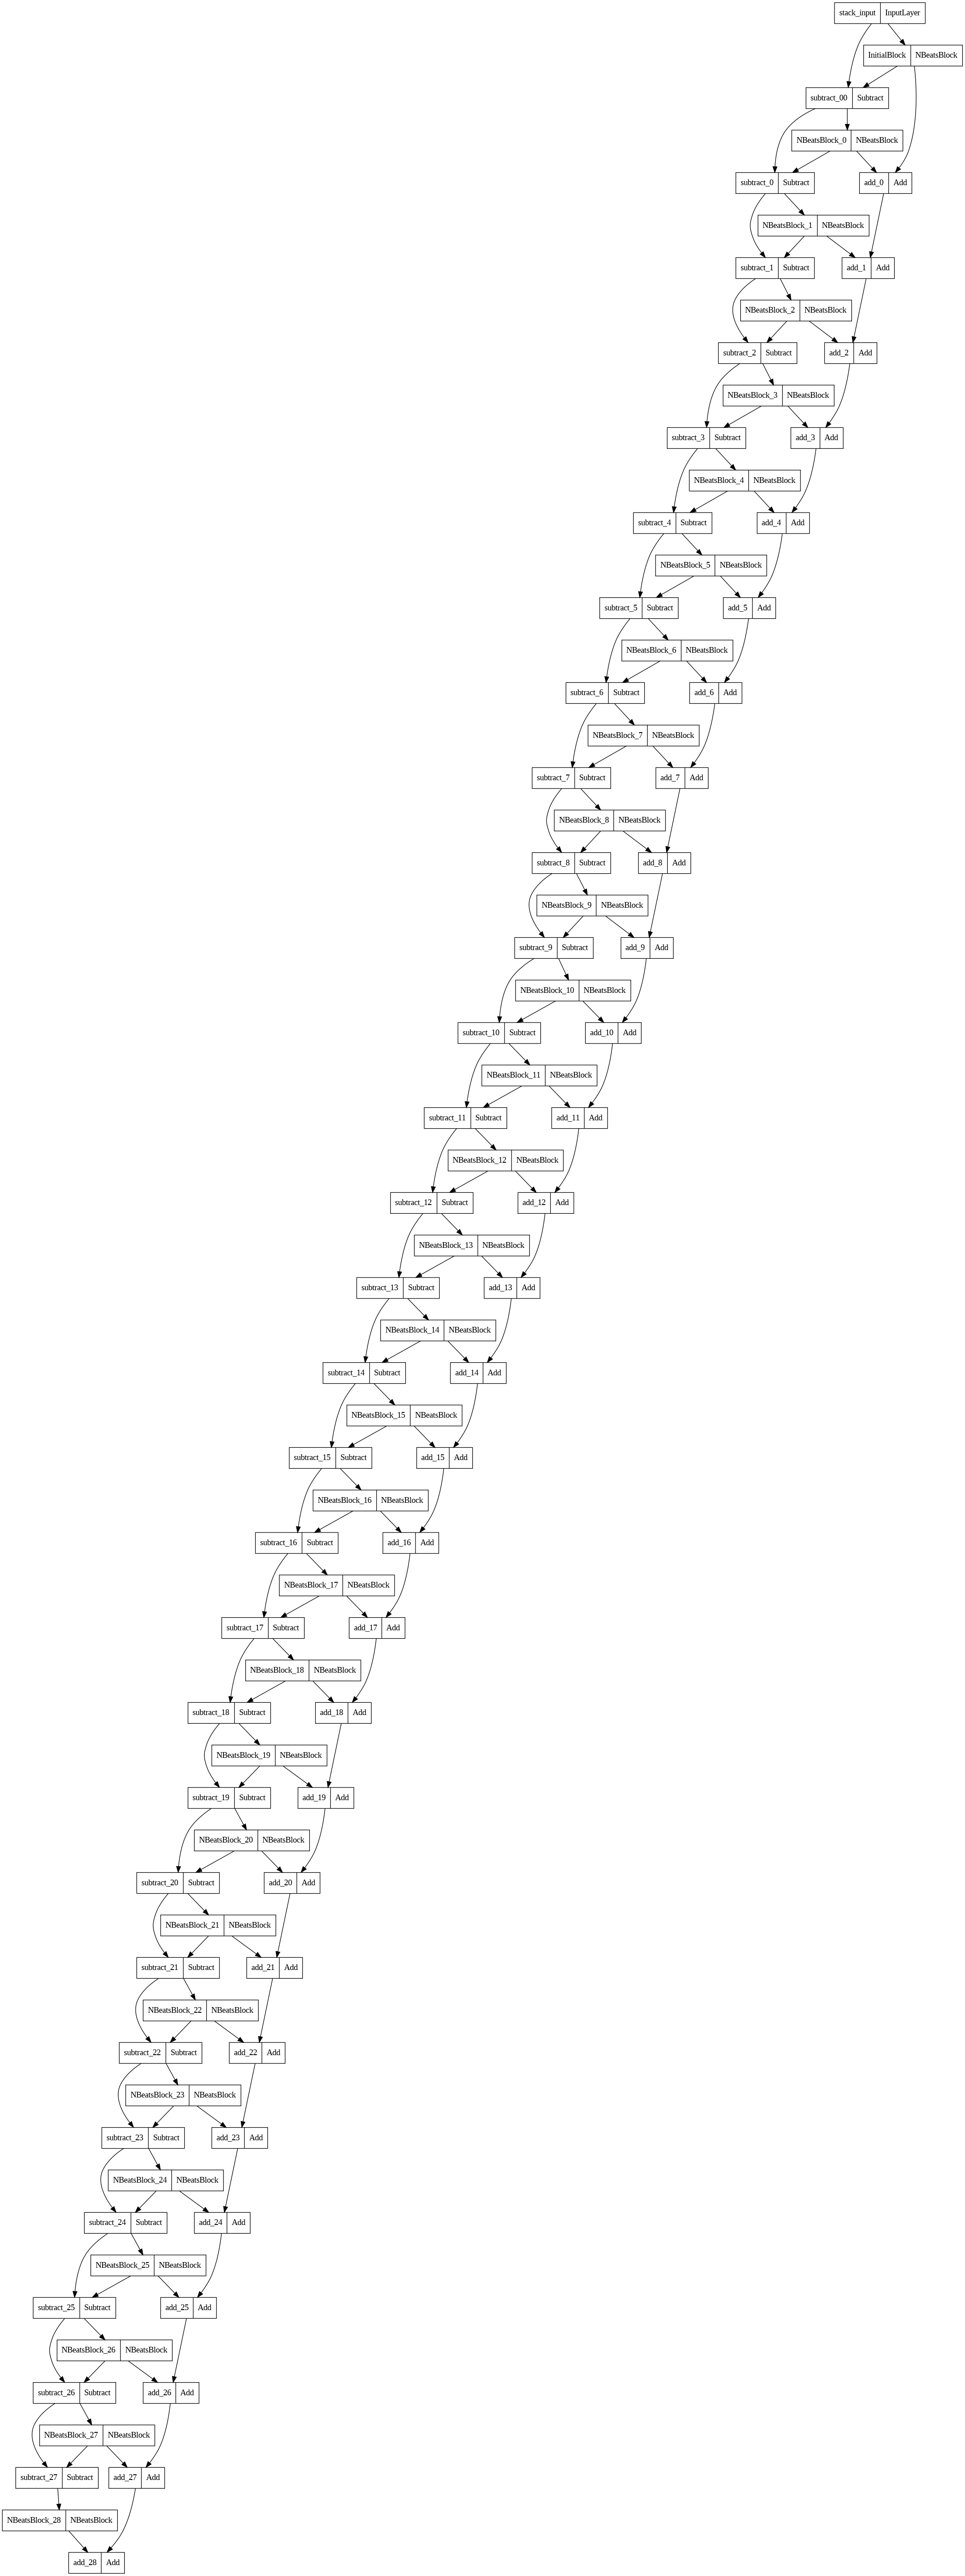

In [ ]:
# Vẽ mô hình N-BEATS và kiểm tra kiến trúc
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Bây giờ mô hình này khá ổn!

Nó thậm chí trông giống với mô hình được hiển thị trong Hình 1 của tài liệu N-BEATS.

![N-BEATS replica model compared with actual N-BEATS architecture](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-stack-model-vs-nbeats-architecture.png)
*So sánh `model_7` (mô hình bản sao N-BEATS với Keras Functional API) với sơ đồ kiến trúc N-BEATS thực tế.*

Có vẻ như việc sử dụng Functional API đã hiệu quả!

> 🔑 **Lưu ý:** Mô hình N-BEATS của chúng ta sao chép **kiến trúc chung** N-BEATS, các thiết lập huấn luyện phần lớn giống nhau, ngoại trừ tài liệu N-BEATS sử dụng một ensemble của các mô hình để đưa ra dự đoán (nhiều hàm mất mát và lookback window khác nhau ), xem Bảng 18 của tài liệu N-BEATS để tìm hiểu thêm. Có thể là thiết lập extension là loại chế độ huấn luyện này và xem liệu nó có cải thiện chất lượng không.

Sao chúng ta không thử và lưu phiên bản mô hình N-BEATS?

In [ ]:
# Điều này sẽ xảy ra lỗi trừ khi phương thức "get_config()" được triển khai - đây có thể là tài liệu đọc thêm
model_7.save(model_7.name)

Bạn sẽ nhận thấy một cảnh báo xuất hiện yêu cầu chúng ta lưu đầy đủ mô hình một cách chính xác, chúng ta cần lập trình phương thức [`get_config()`](https://www.tensorflow.org/guide/keras/save_and_serialize#how_savedmodel_handles_custom_objects) trong custom layer class.

> 📖 **Tài liệu:** Nếu bạn muốn lưu và load mô hình N-BEATS hoặc bất kỳ cấu hình mô hình/lớp tùy chỉnh hoặc lớp con nào khác, bạn nên ghi đè phương thức `get_config()` và `from_config()` một cách tùy chọn. Xem [tài liệu TensorFlow Custom Objects](https://www.tensorflow.org/guide/keras/save_and_serialize#custom_objects) để tìm hiểu thêm.

## Model 8: (xếp chồng các mô hình khác lại với nhau)

Sau rất nhiều nỗ lực, chất lượng của thuật toán N-BEATS vẫn rất kém.

Nhưng một lần nữa, đây là một phần của ML. Không phải mọi thứ đều sẽ hoạt động.

Đó là khi chúng ta đề cập lại phương châm: thử nghiệm, thử nghiệm, thử nghiệm.

Thử nghiệm tiếp theo của chúng ta là tạo [**ensemble** của các mô hình](https://en.wikipedia.org/wiki/Ensemble_learning).

**Ensemble** bao gồm việc huấn luyện và kết hợp nhiều mô hình khác nhau vào cùng một bài toán. Ensemble model thường là loại mô hình mà bạn sẽ thấy chiến thắng các cuộc thi khoa học trên các trang web như Kaggle.

![high level overview of ensemble model: combining many different models may result in better results than one single model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-ensemble-model-example.png)
*Ví dụ về khả năng của ensembling. Mô hình Daniel đưa ra quyết định với smart level là 7 nhưng khi mô hình Daniel kết hợp với nhiều người khác nhau, họ sẽ đưa ra quyết định với smart level là 10. Chìa khóa ở đây là kết hợp sức mạnh quyết định của mọi người với các nền tảng khác nhau, nếu bạn kết hợp nhiều mô hình Daniel, bạn sẽ có smart level trung bình là 7. Lưu ý: smart level không phải là thước đo thực tế để đưa ra quyết định, nó chỉ dành cho mục đích mô phỏng.*

Ví dụ: trong tài liệu N-BEATS, họ đã huấn luyện một ensemble gồm các mô hình (tổng cộng 180, xem [phần 3.4](https://arxiv.org/pdf/1905.10437.pdf)) để biết kết quả mà họ đã thực hiện được bằng cách sử dụng tổ hợp:
  * Các hàm mất mát khác nhau (sMAPE, MASE và MAPE)
  * Các window size khác nhau (2 x horizon, 3 x horizon, 4 x horizon...)

Lợi ích của ensembling model là bạn có được "quyết định của hiệu ứng đám đông". Thay vì dựa vào các dự đoán của một mô hình duy nhất, bạn có thể  [lấy giá trị trung bình hoặc giá trị trung bình của nhiều mô hình khác nhau](https://en.wikipedia.org/wiki/Ensemble_forecasting).

Từ khóa là: different (khác nhau).

Sẽ không hợp lý nếu huấn luyện cùng một mô hình 10 lần trên cùng một dữ liệu, sau đó tính trung bình các dự đoán.

May thay, do được khởi tạo ngẫu nhiên, ngay cả các mô hình DL có cùng kiến ​​trúc cũng có thể tạo ra các kết quả khác nhau.

Ý của tôi là mỗi khi bạn tạo một mô hình DL, nó sẽ bắt đầu với các mẫu ngẫu nhiên (trọng số & độ chệch), sau đó nó điều chỉnh các mẫu ngẫu nhiên này để phù hợp hơn với tập dữ liệu mà nó đang huấn luyện.

Tuy nhiên, quá trình điều chỉnh các mẫu này cũng thường là một dạng ngẫu nhiên có hướng dẫn (SGD optimizer là viết tắt của stochastic or random gradient descent).

Để tạo ra các ensemble model, chúng ta sẽ sử dụng sự tổ hợp của:
* Các hàm mất mát khác nhau (MAE, MSE, MAPE)
* Các mô hình được khởi tạo ngẫu nhiên

Về cơ bản, chúng ta sẽ tạo một bộ các mô hình khác nhau, tất cả đều cố gắng mô hình hóa cùng một dữ liệu.

Hy vọng khả năng dự đoán tổng hợp của mỗi mô hình sẽ tốt hơn so với một mô hình riêng lẻ.

Hãy cùng tìm hiểu!

Chúng ta sẽ bắt đầu bằng cách tạo một hàm để tạo ra một danh sách các mô hình khác nhau được huấn luyện với các hàm mất mát khác nhau. Mỗi layer trong ensemble model sẽ được khởi tạo với [phân phối (Gauss)](https://en.wikipedia.org/wiki/Normal_distribution)  chuẩn ngẫu nhiên  bằng cách sử dụng [He normal initialization](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal), điều này sẽ giúp ước tính khoảng thời gian dự đoán sau này.

> 🔑 **Lưu ý:** Trong thử nghiệm ML, bạn có thể đã xử lý các ví dụ về ensemble model. Các thuật toán như [random forest model](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) là một dạng ensemble, nó sử dụng một số cây quyết định được tạo ngẫu nhiên, trong đó mỗi cây riêng lẻ có thể hoạt động kém nhưng khi kết hợp với nhau lại cho kết quả tuyệt vời.


### Xây dựng và khớp một ensemble của các mô hình (sử dụng các hàm mất mát khác nhau)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Trả về list các mô hình num_iter được huấn luyện trên từng MAE, MSE và MAPE loss.

  Ví dụ: nếu num_iter = 10 sẽ trả về list 30 mô hình được huấn luyện:
  10 * len(["mae", "mse", "mape"]).
  """
  # Tạo list trống cho các ensemble model đã huấn luyện
  ensemble_models = []

  # Tạo số mô hình num_iter cho mỗi hàm mất mát
  for i in range(num_iter):
    # Xây dựng và khớp mô hình mới với một hàm mất mát khác
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Xây dựng một mô hình đơn giản (tương tự như model_1)
      model = tf.keras.Sequential([
        # Khởi tạo các layer với phân phối chuẩn (Gauss) để chúng ta có thể sử dụng các mô hình cho dự đoán
        # ước tính khoảng thời gian sau: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Biên dịch mô hình đơn giản với hàm mất mát hiện tại
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Khớp mô hình
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Thêm callback để ngăn quá trình huấn luyện diễn ra/ngưng trệ quá lâu
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Nối mô hình đã khớp vào danh sách các ensemble model
      ensemble_models.append(model)

  return ensemble_models # trả về danh sách các mô hình đã huấn luyện

Hàm tạo Ensemble model đã được thực hiện!

Hãy thử bằng cách chạy `num_iter=5` trong 1000 epoch. Điều này sẽ dẫn đến tổng số 15 mô hình (5 cho mỗi hàm mất mát khác nhau).

Tất nhiên, những con số này có thể điều chỉnh để tạo ra nhiều mô hình được huấn luyện lâu hơn.

> 🔑 **Lưu ý:** Với ensemble, nhìn chung bạn sẽ tìm thấy nhiều mô hình tổng thể hơn, có nghĩa là chất lượng sẽ tốt hơn. Tuy nhiên, điều này đi kèm với đánh đổi là việc phải huấn luyện nhiều mô hình hơn (thời gian huấn luyện lâu hơn) và đưa ra dự đoán với nhiều mô hình hơn (thời gian dự đoán lâu hơn).



In [ ]:
%%time
# Nhận danh sách các ensemble model được huấn luyện
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 201: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 301: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 643: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 743: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 193: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 554: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 848: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 948: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 746: ReduceLROnPl

Hãy quan sát tất cả các mô hình đó!

Bây giờ, hãy viết một hàm sử dụng danh sách các ensemble model đã huấn luyện để đưa ra các dự đoán, sau đó trả về một danh sách các dự đoán (tập hợp các dự đoán cho mỗi mô hình).

### Đưa ra dự đoán với ensemble model

In [ ]:
# Tạo một hàm sử dụng danh sách các mô hình đã huấn luyện để tạo và trả về danh sách các dự đoán
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # ưa ra dự đoán với ensemble model hiện tại
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Tạo danh sách các dự đoán ensemble
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8806.956,  8835.917,  9036.404, ..., 49977.887, 48403.48 ,
        47930.477],
       [ 8759.288,  8767.853,  9025.02 , ..., 49898.105, 48162.66 ,
        46172.32 ],
       [ 8812.912,  8809.839,  9101.83 , ..., 50552.684, 48362.62 ,
        46749.543],
       ...,
       [ 8783.066,  8795.914,  9102.313, ..., 49929.816, 49456.03 ,
        46311.96 ],
       [ 8785.595,  8755.34 ,  9062.132, ..., 50092.254, 47905.457,
        45829.41 ],
       [ 8794.416,  8795.029,  9112.234, ..., 49895.07 , 48815.613,
        46583.473]], dtype=float32)>

Bây giờ chúng ta đã có một tập hợp các dự đoán ensemble, hãy đánh giá chúng dựa trên các giá trị nhãn gốc.

Tuy nhiên, do chúng ta đã huấn luyện 15 mô hình, nên sẽ có 15 bộ dự đoán. Thay vì so sánh mọi tập hợp các dự đoán với nhãn gốc, hãy tính median (bạn cũng có thể tính mean nhưng [median thường mạnh mẽ hơn mean](https://www.johndcook.com/blog/2009/03/06/student-t-distribution-mean-median/)).

In [ ]:
# Đánh giá các dự đoán của ensemble model
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # lấy median trên tất cả các dự đoán ensemble
ensemble_results

{'mae': 569.7249,
 'mse': 1149568.2,
 'rmse': 1072.1792,
 'mape': 2.5750873,
 'mase': 1.0008489}

Tuyệt! Cho đến giờ. có vẻ như ensemble model là mô hình hoạt động tốt nhất trên phép đo MAE.

### Lập biểu đồ các khoảng dự đoán (uncertainty estimate) của nhóm của ensemble

Hiện tại, tất cả các mô hình của chúng ta (trước ensemble model) đều đang dự đoán các điểm đơn lẻ.

Có nghĩa là, với một bộ giá trị `WINDOW_SIZE=7`, mô hình sẽ dự đoán `HORIZION=1`.

Nhưng điều gì có thể hữu ích hơn một giá trị đơn lẻ?

Liệu có phải là phạm vi giá trị?

Ví dụ: nếu một mô hình dự đoán giá Bitcoin ngày mai là 50,000 USD, sẽ hữu ích nếu biết nó dự đoán 50,000 USD vì nó dự đoán giá nằm trong khoảng 48,000 đến 52,000 USD? (lưu ý: ở câu trước, "$" đã bị bỏ qua do vấn đề định dạng)

Biết được phạm vi giá trị mà mô hình đang dự đoán có thể giúp bạn đưa ra quyết định tốt hơn cho các dự báo của mình.

Bạn sẽ biết rằng mặc dù mô hình dự đoán 50,000 USD (**point prediction**, hoặc giá trị đơn lẻ theo thời gian), giá trị thực sự có thể nằm trong phạm vi 48,000 USD đến 52,000 USD (tất nhiên, giá trị cũng có thể nằm *ngoài* phạm vi này nữa, nhưng chúng ta sẽ tìm hiểu điều đó sau).

Những kiểu phạm vi dự đoán này được gọi là **prediction interval (khoảng dự đoán)**  hoặc **uncertainty estimate (ước tính không chắc chắn)**. Chúng thường quan trọng như chính dự báo.

Tại sao?

Bởi vì các **point prediction** hầu như luôn sai. Vì vậy, có một phạm vi giá trị giúp đưa ra quyết định.

> 📖 **Tài liệu:**
> * Các bước chúng ta sắp thực hiện được lấy cảm hứng từ bài đăng trên blog Machine Learning Mastery [*Prediction Intervals for Deep Learning Neural Networks*](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/). Xem bài này để biết thêm các tùy chọn đo đạc độ không chắc chắn với mạng nơ-ron.
> * Để có ví dụ về các uncertainty estimate được sử dụng trong thực tế, hãy tham khảo  bài đăng [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) trên blog của Uber.

![example of Uber's prediction intervals for daily completed trips in San Francisco](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-intervals-from-ubers-uncertainty-measures.png)
*Ví dụ về cách các ước tính không chắc chắn và khoảng thời gian dự đoán cung cấp hiểu biết về nơi mà các point prediction (một số đơn lẻ) có thể không bao gồm tất cả thông tin hữu ích mà bạn muốn biết. Ví dụ: point prediction của mô hình cho các chuyến đi Uber vào Đêm giao thừa có thể là 100 (một con số mô phỏng) nhưng thực tế, khoảng thời gian dự đoán là từ 55 đến 153 (cả hai đều là những con số mô phỏng cho ví dụ). Trong trường hợp này, việc chuẩn bị 100 chuyến đi có thể chỉ còn 53 chặng ngắn (thậm chí có thể nhiều hơn, giống như point prediction, khoảng thời gian dự đoán cũng chỉ là ước tính). Hình ảnh được trích từ [bài đăng trên blog của Uber về uncertainty estimate trong mạng nơ-ron](https://eng.uber.com/neural-networks-uncertainty-estimation/).*

Có một cách để nhận được 95% khoảng thời gian dự đoán cho mô hình DL là phương pháp bootstrap:
1. Lấy các dự đoán từ một số mô hình được khởi tạo ngẫu nhiên (nhờ ensemble model)
2. Đo độ lệch chuẩn của các dự đoán
3. Nhân độ lệch chuẩn với [1.96](https://en.wikipedia.org/wiki/1.96) (giả sử là phân phối là Gauss, 95% quan sát nằm trong khoảng 1.96 độ lệch chuẩn của mean, đây là lý do chúng ta khởi tạo mạng nơ-ron với phân phối chuẩn)
4. Để nhận được giới hạn trên và dưới của khoảng dự đoán, hãy cộng và trừ giá trị thu được trong (3) cho mean/median của các dự đoán được thực hiện trong (1)


In [ ]:
# Tìm giới hạn trên và giới hạn dưới của các ensemble prediction
def get_upper_lower(preds): # 1. Lấy dự đoán của nhiều mạng nơ-ron học sâu được khởi tạo ngẫu nhiên

  # 2. Đo độ lệch chuẩn của các dự đoán
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Nhân độ lệch chuẩn với 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Lấy giới hạn trên và giới hạn dưới của khoảng thời gian dự đoán
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Lấy giới hạn trên và giới hạn dưới của 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

Tuyệt vời, bây giờ chúng ta đã có giới hạn trên và giới hạn dưới cho khoảng thời gian dự đoán 95%, hãy vẽ biểu đồ chúng dựa trên các dự đoán của ensemble model.

Để làm như vậy, chúng ta có thể sử dụng hàm vẽ biểu đồ cũng như phương thức [`matplotlib.pyplot.fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) để tô bóng khoảng trống giữa giới hạn trên và giới hạn dưới.

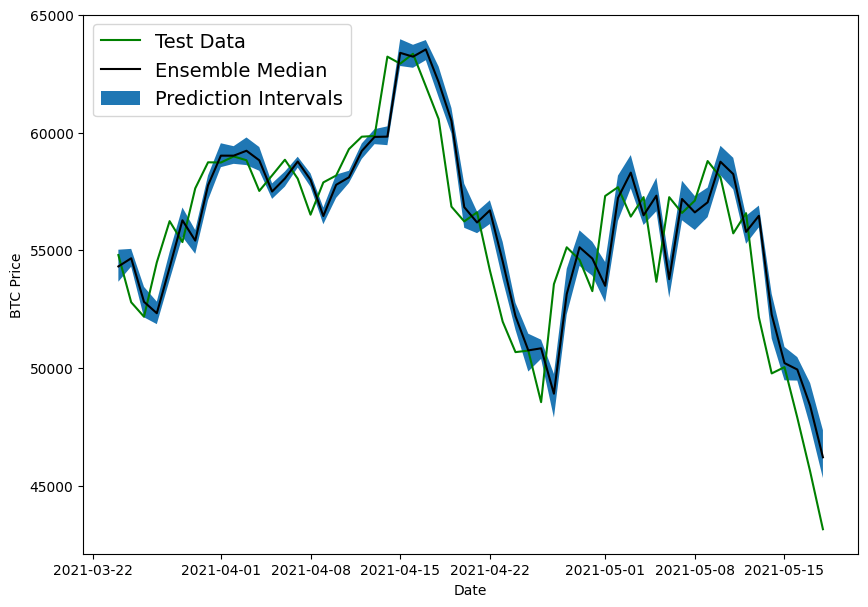

In [ ]:
# Nhận các giá trị median của các ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Vẽ đồ thị median của các ensemble preds cùng với các khoảng thời gian dự đoán (trong đó các dự đoán nằm giữa)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Chúng ta vừa vẽ biểu đồ:
* Dữ liệu kiểm tra (nhãn gốc về giá Bitcoin)
* Median của các ensemble prediction
* Khoảng thời gian dự đoán 95% (giả sử dữ liệu được phân phối Gauss/chuẩn, mô hình cho biết 95% thời gian, giá trị dự đoán sẽ nằm trong khoảng này)

Chúng ta có thể kết luận gì về ensemble model từ biểu đồ ở trên?

Có vẻ như các ensemble prediction đang hơi trễ so với dữ liệu thực tế.

Và khoảng thời gian dự đoán là khá thấp trong suốt quá trình.

Sự kết hợp của các dự đoán trễ cũng như khoảng thời gian dự đoán thấp cho thấy rằng ensemble model của chúng ta có thể đang **overfitting (quá khớp)** dữ liệu, nghĩa là về cơ bản nó đang sao chép những gì mà naïve model sẽ làm và chỉ dự đoán giá trị bước thời gian trước cho giá trị tiếp theo.

Điều này sẽ giải thích tại sao những nỗ lực trước đây để đánh bại naïve forecast đều vô ích.

Chúng ta có thể kiểm tra giả thuyết về việc trang bị quá mức này bằng cách tạo ra một mô hình để đưa ra các dự đoán về tương lai và xem chúng trông như thế nào.

> 🔑 **Lưu ý:** Khoảng dự đoán của chúng ta giả định rằng dữ liệu mà chúng ta đang sử dụng đến từ phân phối Gauss/chuẩn (còn gọi là bell curve), tuy nhiên, các hệ thống mở hiếm khi tuân theo Gauss. Chúng ta sẽ xem điều này ở phần sau với bài toán gà tây 🦃. Để tìm hiểu thêm về chủ đề này, hãy đọc [*The Black Swan*](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) của Nassim Nicholas Taleb, đặc biệt là Phần 2 và Chương 15.

## Khía cạnh khác: hai loại uncertainty (coconut và subway)

Vốn dĩ, chúng ta biết mình không thể đoán trước được tương lai.

Điều đó không có nghĩa là những cố gắng của mình không có giá trị.

Đối với nhiều lĩnh vực, các dự đoán trong tương lai rất hữu ích. Chẳng hạn như biết chuyến xe buýt mà bạn đang cố bắt đến thư viện khởi hành lúc 10:08 sáng. Thời gian 10:08 sáng là một **point prediction**, nếu xe buýt rời đi vào một thời điểm ngẫu nhiên mỗi ngày, điều đó sẽ hữu ích ra sao?

Giống như việc giá Bitcoin ngày mai sẽ là 50,000 USD là một point predictio.

uy nhiên, như chúng ta đã thảo luận, việc biết **prediction interval (khoảng thời gian dự đoán)**  hoặc **uncertainty estimate (ước tính độ không chắc chắn)**  có thể hữu ích hoặc thậm chí hữu ích hơn chính point prediction.

Các uncertainty estimate tìm cách trả lời định tính và định lượng cho các câu hỏi:
* Mô hình của tôi có thể biết những gì? (với dữ liệu hoàn hảo, có thể học được những gì?)
* Điều gì mà mô hình của tôi không biết? (những gì mà mô hình không bao giờ dự đoán được?)

Có hai loại uncertainty trong ML mà bạn nên biết:

* **Aleatoric uncertainty** - loại uncertainty này không thể giảm, nó còn được gọi là "data"/"subway" uncertainty.
  * Giả sử tàu của bạn dự kiến ​​sẽ đến lúc 10:08 sáng nhưng rất hiếm khi nó đến *đúng* 10:08 sáng. Bạn biết đấy, thường sẽ dao động thêm bớt một hoặc hai phút và có thể trễ tới 10 phút nếu giao thông không tốt. Ngay cả với tất cả dữ liệu mà bạn có thể tưởng tượng, mức độ uncertainty này vẫn sẽ hiện hữu (phần lớn là nhiễu).
  * Khi chúng ta đo lường các khoảng thời gian dự đoán, chúng ta đang đo lường một dạng subway uncertainty đối với các dự đoán giá Bitcoin (dao động thêm bớt một chút của point prediction).

* **Epistemic uncertainty** - loại uncertainty này có thể giảm bớt, nó còn được gọi là "model"/"coconut" uncertainty, rất khó tính toán.
  * Coconut uncertainty liên quan đến việc bạn có bị dừa đập vào đầu khi đi biển hay không.
    * Nếu bạn đang ở một bãi biển có các cây dừa, như bạn có thể tưởng tượng, điều này sẽ rất khó tính toán. Tần suất cây dừa bị ngã ra sao? Bạn đang đứng ở đâu?
    * Nhưng bạn có thể giảm uncertainty này xuống 0 bằng cách đi đến một bãi biển không có dừa (thu thập thêm dữ liệu về tình huống của bạn).
  * Có thể giảm uncertainty của mô hình bằng cách thu thập thêm mẫu dữ liệu/xây dựng mô hình để nắm bắt các tham số khác nhau về dữ liệu bạn đang lập mô hình.

Các đường giữa chúng bị mờ (một dạng uncertainty có thể thay đổi thành dạng khác) và chúng có thể gây nhầm lẫn lúc đầu nhưng hãy lưu ý đối với bất kỳ loại dự đoán chuỗi thời gian nào.

Nếu bỏ qua uncertainty, liệu bạn có thực sự nhận được một dự đoán đáng tin cậy không?

Có lẽ một ví dụ khác sẽ hữu ích.

### Uncertainty trong hẹn hò

Giả sử bạn đang tham gia First Date Feedback Radio Show để giúp cải thiện kỹ năng hẹn hò.

Nơi bạn hẹn hò đầu tiên với một cô gái (vui lòng thay thế cô gái bằng sở thích của bạn) và người dẫn chương trình radio ghi lại ngày tháng và sau đó phát lại các đoạn thông tin về chỗ mà có thể bạn đã cải thiện.

Bây giờ, hãy thêm một bước ngoặt.

Tuần trước, bạn của bạn đã lên một chương trình. Họ kể cho bạn nghe về cô gái họ đã gặp và cuộc trò chuyện diễn ra như thế nào.

Hiện bạn đang là một kỹ sư học máy, bạn quyết định xây dựng một mô hình ML để trợ giúp trong các cuộc trò chuyện về cuộc hẹn hò đầu tiên.

Chúng ta có những mức độ uncertainty nào ở đây?

Từ góc độ (dữ liệu) **aleatory uncertainty**, cho dù bạn thu thập bao nhiêu cuộc trò chuyện về cuộc hẹn hò đầu tiên, cuộc trò chuyện mà bạn thu được có thể sẽ khác với các cuộc trò chuyện còn lại (cuộc trò chuyện tốt nhất không có chủ đề và xuất hiện ngẫu nhiên).

Từ góc độ (mô hình) **epistemic uncertainty**, nếu cuộc hẹn thực sự đi vào ngõ cụt và cả hai bên không biết nhau cho đến khi họ gặp trực tiếp, thì epistemic uncertainty sẽ rất cao. Bởi vì bạn không biết người bạn sẽ gặp là ai và bạn có thể nói về điều gì.

Tuy nhiên, mức độ epistemic uncertainty sẽ giảm bớt nếu bạn của bạn kể về cô gái mà họ đã hẹn hò tuần trước trong chương trình, hóa ra bạn đang hẹn hò với cùng một cô gái.

Nhưng ngay cả khi bạn biết một chút gì đó về cô gái, **aleatory uncertainty** (hoặc subway uncertainty) của bạn vẫn cao vì bạn không chắc cuộc trò chuyện sẽ đi đến đâu.

Nếu bạn đang tự hỏi kịch bản trên đến từ đâu, đó là điều đã xảy ra với tôi sáng nay. Thời điểm khá tốt phải không?

### Tìm hiểu thêm về uncertainty

Định lượng uncertainty estimation trong ML là một lĩnh vực nghiên cứu đang khá phát triển.

Hãy đọc các tài liệu sau để tìm hiểu thêm:

> 📖 **Tài liệu:** Những trang để tìm hiểu thêm về uncertainty trong machine learning/forecasting:
* 🎥 [MIT 6.S191: Evidential Deep Learning and Uncertainty](https://youtu.be/toTcf7tZK8c)
* [Uncertainty quantification trên Wikipedia](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty)
* [*Why you should care about the Nate Silver vs. Nassim Taleb Twitter war*](https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc) của Isaac Faber - góc nhìn sâu sắc về vai trò của uncertainty trong ví dụ về dự đoán bầu cử.
* [*3 facts about time series forecasting that surprise experienced machine learning practitioners*](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387) của Skander Hannachi - phác thảo tuyệt vời về một số sai lầm chính mà mọi người mắc phải khi xây dựng các mô hình dự báo, đặc biệt là quên các uncertainty estimate.
* [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) - thảo luận về các kỹ thuật Uber được sử dụng để thiết kế các uncertainty estimate trong mạng nơ-ron chuỗi thời gian.


## Model 9: Huấn luyện mô hình dựa trên dữ liệu lịch sử đầy đủ để đưa ra dự đoán về tương lai

Mô hình dự báo sẽ có giá trị gì nếu chúng ta không sử dụng nó để dự đoán tương lai?

Giờ hãy tạo một mô hình có thể đưa ra các dự đoán tương lai về giá Bitcoin.

Để đưa ra dự đoán về tương lai, chúng ta sẽ huấn luyện một mô hình trên tập dữ liệu đầy đủ, sau đó đưa ra dự đoán cho một số horizon trong tương lai.

Tại sao cần sử dụng tập dữ liệu đầy đủ?

Trước đây, chúng ta phân tách dữ liệu của mình thành các tập huấn luyện và kiểm tra để đánh giá cách mô hình hoạt động trên dữ liệu giả tương lai (tập kiểm tra).

Nhưng vì mục tiêu của mô hình dự báo là dự đoán các giá trị thực tế - tương lai, nên chúng ta sẽ không sử dụng tập kiểm tra.

> 🔑 **Lưu ý:** Các mô hình dự báo cần được huấn luyện lại mỗi khi đưa ra dự báo. Tại sao? Vì nếu giá Bitcoin được cập nhật hàng ngày và bạn dự đoán giá cho ngày mai, mô hình của bạn chỉ thực sự có giá trị trong một ngày. Khi giá mới xuất hiện (ví dụ: ngày hôm sau), bạn sẽ phải huấn luyện lại mô hình của mình để kết hợp mức giá mới đó nhằm dự đoán dự báo tiếp theo.

Hãy chuẩn bị một ít dữ liệu.

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Huấn luyện mô hình trên toàn bộ dữ liệu để đưa ra dự đoán cho ngày tiếp theo
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # chỉ cần giá cả, mô hình tương lai có thể là một mô hình đơn biến
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

Các window và nhãn đã sẵn sàng! Hãy biến chúng thành TensorFlow Datasets được tối ưu hóa chất lượng bằng cách:
1. Biến `X_all` và `y_all` thành tensor Datasets bằng [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
2. Kết hợp các đặc trưng và nhãn thành một Dataset tuple bằng cách sử dụng [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch và prefetch dữ liệu sử dụng lần lượt [`tf.data.Dataset.batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) và [`tf.data.Dataset.prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch)

In [ ]:
# 1. Biến X và y thành các tensor Dataset
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Kết hợp các đặc trưng & nhãn
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch và prefetch cho để tối ưu chất lượng
BATCH_SIZE = 1024 # lấy từ Appendix D trong tài liệu N-BEATS
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

Bây giờ, hãy tạo một mô hình tương tự như `model_1`, ngoại trừ có thêm một layer, chúng ta cũng sẽ khớp với toàn bộ tập dữ liệu trong 100 epoch (vui lòng thử với số epochn hoặc callback ở đây, hiện bạn đã nắm được các kỹ năng thực hiện).

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình (tốt và đơn giản, chỉ để test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Biên dịch
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Khớp mô hình trên toàn bộ dữ liệu để đưa ra các dự báo tương lai
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # đừng in ra bất cứ điều gì, chúng ta đã thấy những điều này trước đó

### Đưa ra dự đoán về tương lai

Hãy dự đoán tương lai và làm giàu!

Có lẽ là không.

Như bạn đã thấy, cho đến giờ, các mô hình ML của chúng ta thực hiện khá kém trong việc dự đoán giá Bitcoin (dự báo chuỗi thời gian trong các hệ thống mở thường khá may rủi), thường kém hơn so với naive forecast.

Điều đó không có nghĩa là chúng ta không thể sử dụng các mô hình của mình để *thử* và dự đoán về tương lai đúng không?

Để làm như vậy, hãy bắt đầu bằng cách xác định biến `INTO_FUTURE` quyết định số bước thời gian mà chúng ta muốn dự đoán trong tương lai.

In [ ]:
# Có bao nhiêu bước để dự đoán tương lai?
INTO_FUTURE = 14 # vì dữ liệu Bitcoin là dữ liệu hàng ngày, để trong 14 ngày

![flowchart representation prediction loop to make forecasts and then append forecasts to data and make more forecasts continuously until forecast horizon is exhausted](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-loop-for-forecasts.png)
*Mẫu lưu đồ biểu diễn vòng lặp mà chúng ta sẽ tạo để đưa ra dự báo. Trong hình không có: huấn luyện lại mô hình dự báo mỗi khi đưa ra dự báo & thu thập dữ liệu mới. Ví dụ: nếu bạn đang dự đoán giá Bitcoin hàng ngày, bạn muốn huấn luyện lại mô hình của mình hàng ngày, vì mỗi ngày bạn sẽ có một điểm dữ liệu mới.*

Hãy tạo một hàm trả về giá trị dự báo `INTO_FUTURE` bằng mô hình đã huấn luyện.

Để làm như vậy, chúng ta sẽ thực hiện như sau:
1. Hàm nhận đầu vào:
  * một danh sách các giá trị (dữ liệu lịch sử Bitcoin)
  * một mô hình đã huấn luyện (chẳng hạn như `model_9`)
  * một window về tương lai để dự đoán (biến `INTO_FUTURE` của chúng ta)
  * window size mà một mô hình đã được huấn luyện trên (`WINDOW_SIZE`) - mô hình chỉ có thể dự đoán trên cùng một loại dữ liệu mà nó đã được huấn luyện
2. Tạo danh sách rỗng cho các dự báo tương lai (điều này sẽ được trả về ở cuối hàm) và trích xuất các giá trị `WINDOW_SIZE` cuối cùng từ các giá trị đầu vào (các dự đoán sẽ bắt đầu từ các giá trị `WINDOW_SIZE` cuối cùng của dữ liệu huấn luyện)
3. Lặp lại `INTO_FUTURE` nhiều lần đưa ra dự đoán trên tập dữ liệu `WINDOW_SIZE` cập nhật để loại bỏ giá trị đầu tiên và thêm dự đoán mới nhất
  * Cuối cùng, các dự đoán trong tương lai sẽ được thực hiện bằng cách sử dụng các dự đoán trước đó của chính mô hình làm đầu vào

In [ ]:
# 1. Tạo hàm đưa ra dự đoán tương lai
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Tạo các bước dự báo trong tương lai into_future sau khi giá trị kết thúc.

  Trả về các dự báo tương lai ở dạng list của các float.
  """
  # 2. Tạo một danh sách rỗng cho các dự báo tương lai/chuẩn bị dữ liệu để dự báo
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # chỉ cần preds từ window trước (điều này sẽ được cập nhật)

  # 3. Tạo INTO_FUTURE số lượng dự đoán, thay đổi dữ liệu được dự đoán mỗi lần
  for _ in range(into_future):

    # Dự đoán dựa trên window trước, sau đó nối lại, một lần nữa, một lần nữa (mô hình bắt đầu đưa ra dự báo trên dự báo của chính nó)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Nối dự đoán vào future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Cập nhật last window với new pred và nhận WINDOW_SIZE các pred gần đây nhất (mô hình đã được huấn luyện trên WINDOW_SIZE window)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

Đã đến lúc đưa BitPredict 💰📈 vào thực tế và đưa ra các dự báo về giá Bitcoin tương lai.

> 🛠 **Thực hành:** Về mô hình dự báo, cách tiếp cận khác đối với hàm `make_future_forecasts()` của chúng ta có thể là gì? Nhắc lại, để đưa ra dự báo, bạn cần phải huấn luyện lại một mô hình mỗi khi bạn muốn tạo một dự đoán mới.
>
> Bạn có thể thử: đưa ra dự đoán (một bước thời gian trong tương lai), huấn luyện lại một mô hình với dự đoán mới được thêm vào dữ liệu này, đưa ra dự đoán, thêm dự đoán, huấn luyện lại một mô hình ...
>
> Như vậy, hàm `make_future_forecasts()` bỏ qua việc huấn luyện lại một phần mô hình.

In [ ]:
# Đưa ra dự báo về giá Bitcoin tương lai
# Lưu ý: nếu bạn đọc điều này ở một thời gian sau đó, có thể bạn đang ở tương lai, vì vậy dự báo
# mà chúng ta đang thực hiện có thể không thực sự là dự báo, nếu đúng như vậy, hãy điều chỉnh lại dữ liệu huấn luyện.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 53ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55015.08984375

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55015.08984375] -> Prediction: 51319.13671875

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55015.08984375 51319.13671875] -> Prediction: 48314.0859375

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55015.08984375 51319.13671875 48314.0859375 ] -> Prediction: 47784.171875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55015.08984375
 51319.13671875 48314.0859375  47784.1718

In [ ]:
future_forecast[:10]

[55015.09,
 51319.137,
 48314.086,
 47784.17,
 47435.9,
 46211.3,
 47725.89,
 53239.98,
 49587.074,
 47090.184]

### Lập biểu đồ dự báo tương lai

Điều này khá thú vị! Dự báo đã được thực hiện!

Nhưng hiện tại, chúng chỉ là những con số đơn điệu.

Hãy làm cho chúng trở nên sống động bằng cách tuân thủ phương châm của data explorer: visualize, visualize, visualize!

Để lập biểu đồ dự báo tương lai của mô hình dựa trên dữ liệu lịch sử Bitcoin, chúng ta sẽ cần một loạt các ngày trong tương lai (các ngày trong tương lai kể từ ngày cuối cùng mà tập dữ liệu của chúng ta chấm dứt).

Hãy tạo một hàm trả về một phạm vi thời hạn, từ một số ngày bắt đầu cụ thể đến một số ngày cụ thể trong tương lai (`INTO_FUTURE`).

Để làm như vậy, chúng ta sẽ sử dụng kết hợp kiểu dữ liệu [`datetime64`](https://numpy.org/doc/stable/reference/arrays.datetime.html) của NumPy (ngày Bitcoin của chúng ta đã có trong kiểu dữ liệu này) cũng như phương thức [`datetime64`](https://numpy.org/doc/stable/reference/arrays.datetime.html) của NumPy để tạo phạm vi thời hạn.

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Trả về mảng các giá trị ngày giờ trong phạm vi từ start_date đến start_date+horizon.

  start_date: ngày bắt đầu phạm vi (np.datetime64)
  into_future: số ngày cần thêm vào start date cho phạm vi (int)
  offset: số ngày cần bù start_date theo (mặc định 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # chỉ định start date, "D" là viết tắt của day
  end_date = start_date + np.timedelta64(into_future, "D") # chỉ định end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # trả về phạm vi ngày giữa start date và end date

Start date của các ngày dự báo sẽ là ngày cuối cùng trong tập dữ liệu.

In [ ]:
# Last timestep của timesteps (hiện ở định dạng np.datetime64)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Tới hai tuần tiếp theo của timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

Bây giờ chúng ta đã có một danh sách các ngày mà chúng ta có thể sử dụng để hình dung các dự đoán Bitcoin trong tương lai.

Tuy nhiên, để đảm bảo các đường của biểu đồ kết nối với nhau (hãy thử không chạy cell bên dưới, sau đó vẽ biểu đồ dữ liệu để xem ý tôi là gì), hãy chèn last timestep và giá Bitcoin của dữ liệu huấn luyện vào mảng `next_time_steps` và `future_forecast`.

In [ ]:
# Chèn last timestep/final price để biểu đồ trông không bị rối
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55015.09 , 51319.137, 48314.086, 47784.17 , 47435.9  ,
        46211.3  , 47725.89 , 53239.98 , 49587.074, 47090.184, 47255.094,
        47781.684, 47613.426, 49467.438], dtype=float32))

Giờ hãy lập biểu đồ!

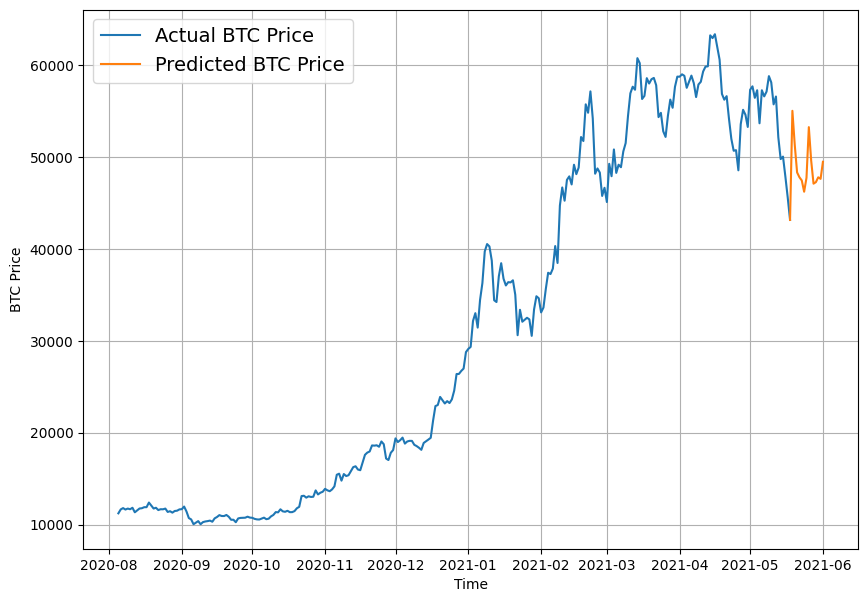

In [ ]:
# Lập biểu đồ dự đoán giá Bitcoin tương lai
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Mô hình của chúng ta hoạt động như thế nào?

Có vẻ như các dự đoán của chúng ta đang bắt đầu hình thành theo cyclic pattern (lên và xuống giống nhau).

Có lẽ đó là do mô hình của chúng ta quá khớp dữ liệu huấn luyện và không khái quát hóa tốt cho dữ liệu tương lai. Ngoài ra, như bạn có thể tưởng tượng, bạn càng dự đoán tương lai xa, thì khả năng mắc lỗi của bạn càng cao (hãy thử xem điều gì sẽ xảy ra khi bạn dự đoán 100 ngày tới).

Nhưng tất nhiên, chúng ta không thể đo lường những dự đoán này như hiện tại vì suy cho cùng, chúng là những dự đoán về thực tế-tương lai (vào thời điểm bạn đọc điều này, tương lai có thể đã xảy ra, nếu vậy, mô hình đã diễn ra thế nào?).

> 🔑 **Lưu ý:** Xin nhắc lại, những dự đoán mà chúng ta đưa ra ở đây không phải là lời khuyên tài chính. Và bây giờ, bạn nên nhận thức rõ rằng các mô hình ML kém có thể dự báo giá trị như thế nào trong một hệ thống mở - bất kỳ ai hứa với bạn một mô hình có thể "đánh bại thị trường" đều có khả năng lừa bạn, có thể do bạn không để ý đến lỗi của họ hoặc họ may mắn.


## Model 10: Tại sao dự báo lại khá nhảm nhí (bài toán gà tây 🦃)

Khi tạo bất kỳ loại dự báo nào, hãy nhớ lấy **turkey problem (bài toán gà tây)**.

**Turkey problem** là một phép loại suy khi dữ liệu quan sát của bạn (dữ liệu lịch sử) không thể nắm bắt được một sự kiện trong tương lai, có tỉnh thảm khốc và có thể dẫn đến việc bạn bị hủy hoại.

Chuyện kể rằng, có một con gà tây sống được 1000 ngày, được cho ăn mỗi ngày và được chủ chăm sóc cho đến buổi tối trước Lễ Tạ ơn.

Dựa trên dữ liệu quan sát của gà tây, không có lý do gì để tin rằng mọi thứ không nên tiếp tục như cũ.

Nói cách khác, làm thế nào để một con gà tây có thể dự đoán rằng vào ngày 1001, sau 1000 ngày tốt đẹp, nó sẽ có một ngày sống nữa.

![the turkey problem illustrated, a turkey lives 1000 good days until the eve of thanksgiving](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-the-turkey-problem.png)
*Ví dụ về turkey problem. Một con gà tây có thể sống 1000 ngày và không có ngày nào trong số đó cho thấy dấu hiệu về điều gì sẽ xảy ra vào ngày 1001. Tương tự như dự báo, dữ liệu lịch sử của bạn có thể không có bất kỳ dấu hiệu nào về sự thay đổi sắp xảy ra. Hình ảnh đồ thị lấy từ trang 41 của [The Black Swan](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) của Nassim Taleb (tôi đã thêm vào trong đồ họa gà tây).*

Điều này liên quan như thế nào đến việc dự đoán giá Bitcoin (hoặc giá của bất kỳ cổ phiếu hoặc con số nào trong thị trường mở)?

Bạn có thể có dữ liệu lịch sử của Bitcoin cho toàn bộ sự tồn tại của nó và xây dựng một mô hình dự đoán nó một cách hoàn hảo.

Nhưng rồi một ngày, vì một số lý do không rõ và không thể đoán trước, giá Bitcoin giảm mạnh 100 lần chỉ trong một ngày.

Tất nhiên, loại kịch bản này khó xảy ra.

Nhưng điều đó không có nghĩa là nó không quan trọng.

Hãy thử nghĩ xem trong cuộc sống của bạn, đã bao nhiêu lần xảy ra những sự kiện quan trọng nhất một cách bất ngờ?

Như vậy, bạn có thể đến một quán cà phê và bắt gặp tình yêu của đời mình, mặc dù bạn đã đến quán cà phê đó 10 năm liền mà chưa bao giờ tình cờ gặp người này trước đây.

Tương tự với việc dự đoán giá Bitcoin, bạn có thể kiếm tiền trong 10 năm liên tục và có thể mất tất cả chỉ trong gang tấc.

Bạn được trả bao nhiêu lần không quan trọng, mà quan trọng là số tiền bạn được trả.

> 📖 **Tài liệu:** Nếu bạn muốn tìm hiểu thêm về turkey problem, hãy tham khảo các nguồn sau:
* [Explaining both the XIV trade and why forecasting is BS](https://youtu.be/hRwimmE2wEk) của Nassim Taleb
* [*The Black Swan*](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) của Nassim Taleb (đặc biệt là Chương 4 phác thảo và thảo luận về turkey problem)

Hãy tìm hiểu cụ thể và xem turkey problem ảnh hưởng như thế nào đến việc lập mô hình giá lịch sử và tương lai của Bitcoin.

Để làm như vậy, chúng ta sẽ tạo một điểm dữ liệu rất khó xác định về giá lịch sử của Bitcoin, mức giá giảm 100 lần trong một ngày.

> 🔑 **Lưu ý:** Một sự kiện rất khó xảy ra và không thể đoán trước được, chẳng hạn như giá Bitcoin giảm 100 lần trong một ngày (lưu ý: tính từ "không chắc" dựa trên sự thay đổi giá lịch sử của Bitcoin) cũng được gọi [**Black Swan** event (sự kiện thiên nga đen)](https://en.wikipedia.org/wiki/Black_swan_theory). Sự kiện Thiên nga đen là một ẩn số không xác định, bạn không có cách nào dự đoán được nó có xảy ra hay không nhưng những sự kiện kiểu này thường có tác động lớn.

In [ ]:
# Hãy đưa Turkey problem vào dữ liệu BTC của chúng ta (giá BTC giảm 100 lần trong một ngày)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Tạo một giá bổ sung ở cuối (để giới thiệu Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

Lưu ý rằng giá trị cuối cùng thấp hơn 100 lần so với thực tế (hãy nhớ rằng đây không phải là điểm dữ liệu thực, chỉ để minh họa những tác động của bài toán gà tây).

Bây giờ chúng ta đã có giá Bitcoin, gồm cả điểm dữ liệu về bài toán gà tây, hãy lấy các bước thời gian.

In [ ]:
# Lấy các bước thời gian cho bài toán gà tây
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

Xinh đẹp! Hãy xem dữ liệu Bitcoin về bài toán gà tây được tạo giả lập của chúng ta.

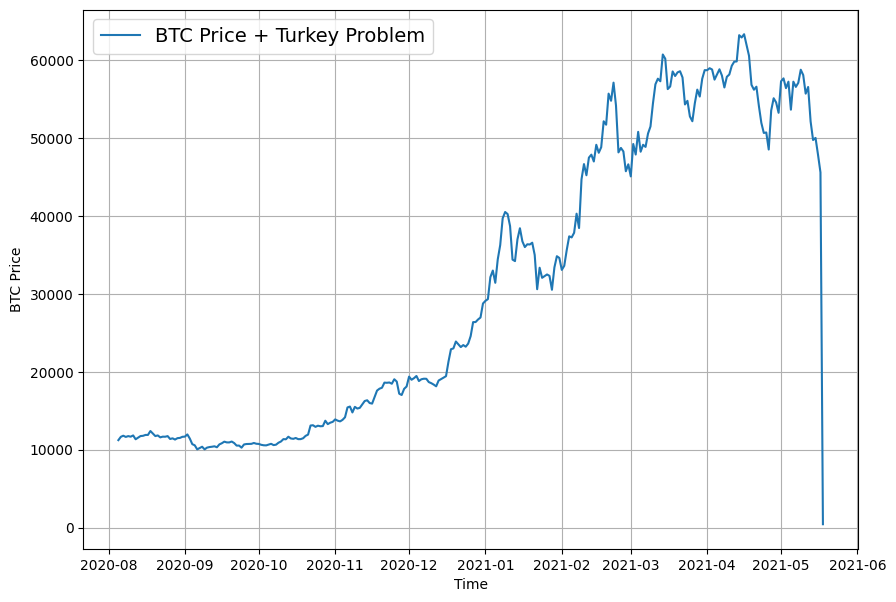

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

Bạn nghĩ việc xây dựng mô hình dựa trên dữ liệu này sẽ diễn ra như thế nào?

Hãy nhớ rằng, những gì chúng ta đã thay đổi chỉ là một điểm dữ liệu duy nhất trong toàn bộ tập dữ liệu.

Trước khi chúng ta xây dựng mô hình, hãy tạo một số tập dữ liệu ở dạng window với dữ liệu gà tây.

In [ ]:
# Tạo các tập kiểm tra và huấn luyện cho dữ liệu bài toán gà tây
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Xây dựng turkey model (mô hình dự đoán trên dữ liệu gà tây)

Với dữ liệu đã cập nhật, chúng ta chỉ thay đổi 1 giá trị.

Hãy xem nó ảnh hưởng như thế nào đến mô hình.

Để mọi thứ có thể so sánh với các mô hình trước đó, chúng ta sẽ tạo `turkey_model`, là bản sao của `model_1` (cùng một kiến trúc, nhưng dữ liệu khác nhau).

Bằng cách đó, khi đánh giá `turkey_model`, chúng ta có thể so sánh kết quả của nó với `model_1_results` và xem mức độ ảnh hưởng của một điểm dữ liệu duy nhất đến chất lượng của mô hình.


In [ ]:
# Clone kiến trúc model 1 cho turkey model và khớp với turkey model trên dữ liệu gà tây
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Đánh giá turkey model trên dữ liệu kiểm tra
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 647.9564


647.9563598632812

In [ ]:
# Load mô hình tốt nhất và đánh giá trên dữ liệu kiểm tra
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.3674


639.367431640625

Bây giờ, hãy đưa ra một số dự đoán với mô hình và đánh giá chúng trên dữ liệu kiểm tra.

In [ ]:
# Đưa ra dự đoán với Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.051, 8783.972, 9047.543, 8771.006, 8736.304, 8735.935,
       8681.835, 8517.219, 8458.795, 8532.137], dtype=float32)>

In [ ]:
# Đánh giá turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17123.102,
 'mse': 613900740.0,
 'rmse': 23700.238,
 'mape': 121.27349,
 'mase': 26.498058}

Chỉ với một lần thay đổi giá trị, các phép đo sai số của chúng ta trở nên khá cao.

Để đảm bảo, hãy tự nhắc nhở bản thân về cách `model_1` sử dụng dữ liệu Bitcoin chưa được sửa đổi (không có bài toán gà tây).

In [ ]:
model_1_results

{'mae': 581.69366,
 'mse': 1220471.5,
 'rmse': 1104.7495,
 'mape': 2.614294,
 'mase': 1.0218747}

Chỉ bằng cách thay đổi một giá trị, `turkey_model` MAE tăng gần 30 lần so với `model_1`.

Cuối cùng, chúng ta sẽ trực quan hóa các dự đoán về gà tây qua dữ liệu kiểm tra về gà tây .

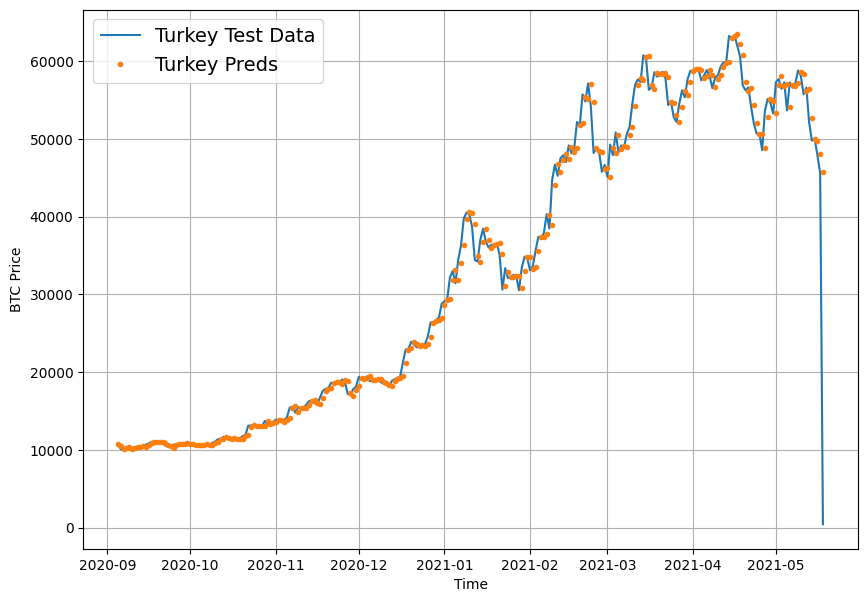

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

Tại sao lại xảy ra điều này?

Tại sao mô hình của chúng ta không nắm bắt được điểm dữ liệu của bài toán gà tây?

Hãy nghĩ như sau, giống như một con gà tây sống 1000 ngày vui vẻ, chỉ dựa vào quan sát thì không có lý do gì để tin rằng ngày 1001 sẽ không vui, mô hình đã được huấn luyện dựa trên dữ liệu lịch sử của Bitcoin, không có sự kiện nào mà giá giảm 100 lần trong một ngày, không có cơ sở gì để dự đoán giá sẽ giảm trong tương lai.

Mô hình không thể dự đoán bất cứ điều gì trong tương lai ngoài phân phối mà nó đã được huấn luyện.

Ngược lại, các biến động giá rất khó xảy ra (dựa trên các chuyển động lịch sử), tăng hoặc giảm sẽ không bao giờ nằm ​​trong dự báo.

Tuy nhiên, như chúng ta đã thấy, bất kể khả năng xảy ra thế nào, những sự kiện này có thể có tác động lớn đến chất lượng của các mô hình.

> 📖 **Tài liệu:** Để tìm hiểu tài liệu thảo luận về các sự kiện Thiên nga đen và cách chúng thường bị bỏ qua do giả định là các sự kiện lịch sử đến từ một phân phối nhất định và các sự kiện trong tương lai sẽ đến từ cùng một phân phối, hãy xem [*Black Swans, Normal Distributions and Supply Chain Risk*](https://spendmatters.com/uk/black-swans-normal-distributions-supply-chain-risk/) của Spend Matters.


## So sánh các mô hình

Chúng ta đã huấn luyện được một số mô hình.

Chúng ta đã thấy các mô hình ML và DL kém như thế nào trong việc dự báo giá Bitcoin (hoặc bất kỳ loại giá trị thị trường mở nào).

Để làm rõ điều này, hãy so sánh kết quả của tất cả các thử nghiệm lập mô hình mà chúng ta đã thực hiện cho đến giờ.

In [ ]:
# So sánh kết quả các mô hình khác nhau (w = window, h = horizon, chẳng hạn: w=7 tức là window size bằng 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,581.693665,1.220472e+06,1104.749512,2.614294,1.021875
model_2_dense_w30_h1,619.826355,1.312623e+06,1145.697388,2.803446,1.083463
model_3_dense_w30_h7,1249.966431,5.542703e+06,1430.189575,5.603833,2.224246
model_4_CONV1D,571.318420,1.191262e+06,1091.449463,2.561825,1.003648
model_5_LSTM,583.387756,1.229314e+06,1108.744263,2.622112,1.024851
model_6_multivariate,574.703735,1.182415e+06,1087.389038,2.586872,1.009595
model_8_NBEATs,577.421875,1.149179e+06,1071.997437,2.639830,1.014370
model_9_ensemble,569.724915,1.149568e+06,1072.179199,2.575087,1.000849
model_10_turkey,17123.101562,6.139007e+08,23700.238281,121.273491,26.498058


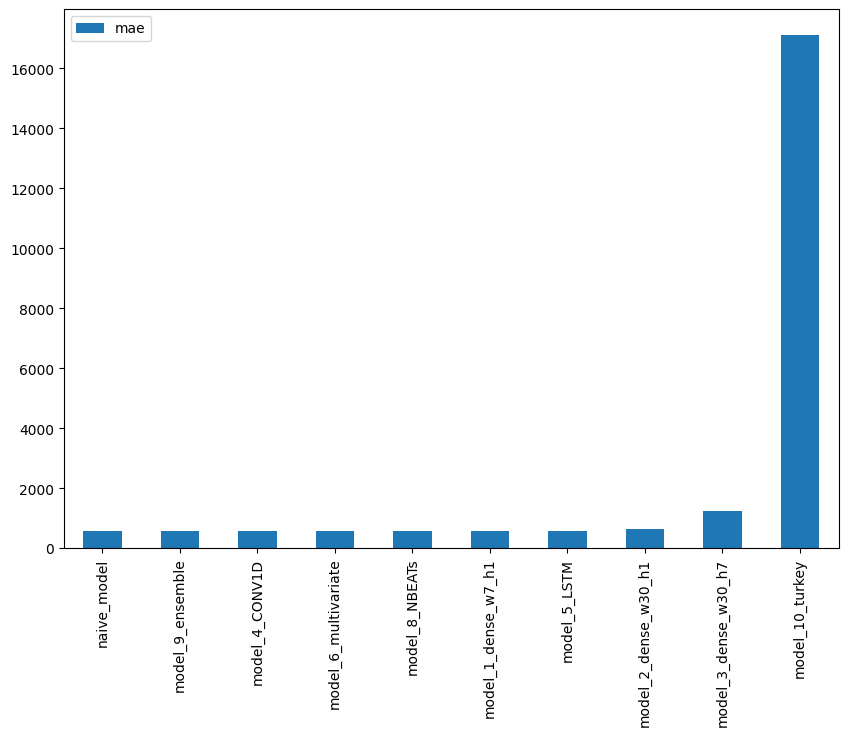

In [ ]:
# Sắp xếp kết quả mô hình theo MAE và vẽ biểu đồ
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

Phần lớn các mô hình DL của chúng ta hoạt động ngang hoặc chỉ tốt hơn một chút so với naive model. Và đối với turkey model, việc thay đổi một điểm dữ liệu sẽ phá hủy chất lượng của nó.

> 🔑 **Lưu ý:** Một loại mô hình hoạt động tốt hơn ở đây không có nghĩa là nó sẽ hoạt động tốt nhất ở chỗ khác (và ngược lại, chỉ vì có một loại mô hình hoạt động kém ở đây, không có nghĩa là nó sẽ hoạt động kém ở nơi khác).

Như tôi đã nói lúc đầu, đây không phải là lời khuyên về tài chính.

Sau những gì chúng ta đã trải nghiệm, bây giờ bạn đã nắm được một số kỹ năng cần thiết để biết các mánh khóe ở bất kỳ hướng dẫn nào trong tương lai hoặc bài đăng trên blog hoặc hướng dẫn bán hàng đầu tư tuyên bố có mô hình có thể dự đoán tương lai.

[Tweet của Mark Saroufim](https://twitter.com/marksaroufim/status/1366871736604532739?s=20) tóm tắt điều này một cách độc đáo (dự báo thị trường chứng khoán bằng mô hình ML cũng đáng tin cậy như đọc lòng bàn tay).

![Mark Saroufim tweet on what forecasting with a machine learning model reminds him of: palm reading, basic heuristics, comparing calculations in the brain of different organisms](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-mark-saroufim-tweet-forecasting-bs.png)
*Hãy cẩn thận các hướng dẫn hoặc các khóa học giao dịch tuyên bố sử dụng một số loại thuật toán để đánh bại thị trường (hệ thống mở), họ có thể là lừa đảo hoặc người sáng tạo rất may mắn và chưa gặp phải bài toán gà tây.*

Tuy nhiên, đừng để những kết quả này khiến bạn thất vọng, dự báo trong một hệ thống khép kín (chẳng hạn như dự đoán nhu cầu điện) thường mang lại những kết quả khá hữu ích.

Nếu có, thì mô-đun này dạy phản kiến ​​thức, biết rằng các phương pháp dự báo thường *không* hoạt động tốt trong các hệ thống mở.

Thêm vào đó, đôi khi không biết trước tương lai lại có ích. Tương lai được biết trước thì lại thành quá khứ rồi.



## 🛠 Bài tập thực hành
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Việc co giãn dữ liệu có giúp ích cho dữ liệu đơn biến/đa biến không (ví dụ: nhận tất cả các giá trị từ 0 đến 1)?
  * Hãy thử làm điều này đối với mô hình đơn biến (ví dụ: `model_1`) và mô hình đa biến (ví dụ: `model_6`) và xem nó có ảnh hưởng đến kết quả huấn luyện hoặc đánh giá mô hình hay không.
2. Nhận dữ liệu cập nhật nhất về Bitcoin, huấn luyện mô hình và xem nó hoạt động như thế nào (dữ liệu của chúng ta tính đến ngày 18 tháng 5 năm 2021).
  * Bạn có thể download dữ liệu lịch sử Bitcoin miễn phí từ [coindesk.com/price/bitcoin](https://www.coindesk.com/price/bitcoin) và nhấp vào "Export Data" -> "CSV".
3. Đối với hầu hết các mô hình, chúng ta đã sử dụng `WINDOW_SIZE=7`, nhưng có window size nào tốt hơn không?
  * Thiết lập một loạt thử nghiệm để tìm xem có window size nào tốt hơn hay không.
  * Ví dụ: bạn có thể huấn luyện 10 mô hình khác nhau với `HORIZON=1` nhưng với window size khác nhau, từ 2-12.
4. Tạo tập dữ liệu ở dạng window giống như tập dữ liệu chúng ta đã sử dụng cho `model_1` bằng cách sử dụng [`tf.keras.preprocessing.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array) và huấn luyện lại `model_1` bằng cách sử dụng tập dữ liệu đã tạo lại.
5. Đối với thử nghiệm lập mô hình đa biến, chúng ta đã thêm Bitcoin block reward size như một đặc trưng bổ sung để biến chuỗi thời gian của chúng ta trở thành đa biến.
  * Bạn nghĩ có thể thêm vào đặc trưng nào khác không?
  * Nếu có, hãy thử, những điều này ảnh hưởng đến mô hình thế nào?
6. Đưa ra khoảng thời gian dự đoán cho các dự báo trong tương lai. Để làm như vậy, có một cách là huấn luyện ensemble model trên tất cả dữ liệu, đưa ra các dự báo trong tương lai với nó và tính toán các khoảng thời gian dự đoán của ensemble giống như chúng ta đã làm với `model_8`.
7. Đối với các dự đoán về tương lai, hãy cố gắng đưa ra dự đoán, huấn luyện lại mô hình về các dự đoán, đưa ra dự đoán, huấn luyện lại mô hình, đưa ra dự đoán, huấn luyện lại mô hình, đưa ra dự đoán (huấn luyện lại mô hình mỗi khi đưa ra một dự đoán mới). Vẽ biểu đồ kết quả, chúng trông như thế nào so với các dự đoán về tương lai, nơi mô hình không được huấn luyện lại cho mọi dự báo (`model_9`)?
8. Trong suốt notebook này, chúng ta chỉ thử các thuật toán do chúng ta thực hiện thủ công. Nhưng điều đáng xem xét là thuật toán dự báo được xây dựng có mục đích hoạt động như thế nào.
  * Hãy thử một trong các thuật toán bổ sung được liệt kê trong phần thử nghiệm lập mô hình, chẳng hạn như:
    * [Thư viện Kat của Facebook](https://github.com/facebookresearch/Kats) - có rất nhiều mô hình ở đây, hãy nhớ phương châm của người thực hành ML: thử nghiệm, thử nghiệm, thử nghiệm.
    * [Thư viện Greykite của LinkedIn](https://github.com/linkedin/greykite)


1. Việc co giãn dữ liệu có giúp ích cho dữ liệu đơn biến/đa biến không (ví dụ: nhận tất cả các giá trị từ 0 đến 1)?
  * Hãy thử làm điều này đối với mô hình đơn biến (ví dụ: `model_1`) và mô hình đa biến (ví dụ: `model_6`) và xem nó có ảnh hưởng đến kết quả huấn luyện hoặc đánh giá mô hình hay không.

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_labels.min()

123.033

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_windows = MinMaxScaler().fit_transform(train_windows)
test_windows = MinMaxScaler().fit_transform(test_windows)

train_labels = MinMaxScaler().fit_transform(train_labels)
test_labels = MinMaxScaler().fit_transform(test_labels)

In [ ]:
train_labels.min()

0.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Thiết lập random seed để có kết quả lặp lại nhiều nhất có thể
tf.random.set_seed(42)

# Xây dựng mô hình
model_1_scaler = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # kích hoạt tuyến tính cũng giống như không có kích hoạt
], name="model_1_dense") # đặt tên cho mô hình để lưu nó

# Biên dịch mô hình
model_1_scaler.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # chúng ta không nhất thiết cần điều này khi hàm mất mát là MAE

# Khớp mô hình
model_1_scaler.fit(x=train_windows, # huấn luyện window có 7 bước thời gian của giá Bitcoin
            y=train_labels, # giá trị horizon là 1 (sử dụng 7 bước thời gian trước đó để dự đoán ngày hôm sau)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1_scaler.name)]) # tạo ModelCheckpoint callback để lưu mô hình tốt nhất

Epoch 1/100
18/18 [==============================] - 1s 37ms/step - loss: 0.0655 - mae: 0.0655 - val_loss: 0.0567 - val_mae: 0.0567
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0152 - mae: 0.0152 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0112 - mae: 0.0112 - val_loss: 0.0653 - val_mae: 0.0653
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0098 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0094 - mae: 0.0094 - val_loss: 0.0644 - val_mae: 0.0644
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0090 - mae: 0.0090 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0086 - val_loss: 0.0631 - val_mae: 0.0631
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0084 - 

In [ ]:
model_1_scaler_preds = make_preds(model_1_scaler, test_windows)
len(model_1_scaler_preds), model_1_scaler_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.06754446, 0.06622304, 0.07006375, 0.06655976, 0.06504042,
        0.06456341, 0.06434313, 0.06160614, 0.06030024, 0.06142223],
       dtype=float32)>)

In [ ]:
model_1_scaler_results = evaluate_preds(y_true=tf.squeeze(test_labels), # giảm xuống shape phù hợp
                                 y_pred=model_1_scaler_preds)
model_1_scaler_results

{'mae': 0.059302967,
 'mse': 0.004644406,
 'rmse': 0.06814988,
 'mape': 1268121.0,
 'mase': 5.773838}

In [ ]:
model_1_results

{'mae': 581.69366,
 'mse': 1220471.5,
 'rmse': 1104.7495,
 'mape': 2.614294,
 'mase': 1.0218747}

In [ ]:
# Tạo các tập huấn luyện và kiểm tra
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X_train.min()

Price+1    121.79500
Price+2    120.65533
Price+3    120.65533
Price+4    118.67466
Price+5    108.58483
Price+6    108.58483
Price+7    108.58483
dtype: float64

In [ ]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

y_train = MinMaxScaler().fit_transform(np.array(y_train).reshape(-1, 1))
y_test = MinMaxScaler().fit_transform(np.array(y_test).reshape(-1, 1))

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình chuỗi thời gian đa biến
model_6_scaler = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # thêm một layer bổ sung ở đây sẽ đánh bại naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Biên dịch
model_6_scaler.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Khớp
model_6_scaler.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # chỉ in 1 dòng mỗi epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
model_6_scaler_preds = tf.squeeze(model_6_scaler.predict(X_test))
model_6_scaler_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.06903738, 0.06783184, 0.07186211, 0.06713771, 0.06664847,
       0.06693037, 0.06522688, 0.06287669, 0.06200794, 0.06275109],
      dtype=float32)>

In [ ]:
# Đánh giá preds
model_6_scaler_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_scaler_results

{'mae': 20091.164,
 'mse': 711890940.0,
 'rmse': 26681.285,
 'mape': 36160550000.0,
 'mase': 2061278.6}

In [ ]:
model_6_results

{'mae': 574.70374,
 'mse': 1182414.9,
 'rmse': 1087.389,
 'mape': 2.5868719,
 'mase': 1.0095953}

2. Nhận dữ liệu cập nhật nhất về Bitcoin, huấn luyện mô hình và xem nó hoạt động như thế nào (dữ liệu của chúng ta tính đến ngày 18 tháng 5 năm 2021).
  * Bạn có thể download dữ liệu lịch sử Bitcoin miễn phí từ [coindesk.com/price/bitcoin](https://www.coindesk.com/price/bitcoin) và nhấp vào "Export Data" -> "CSV".

3. Đối với hầu hết các mô hình, chúng ta đã sử dụng `WINDOW_SIZE=7`, nhưng có window size nào tốt hơn không?
  * Thiết lập một loạt thử nghiệm để tìm xem có window size nào tốt hơn hay không.
  * Ví dụ: bạn có thể huấn luyện 10 mô hình khác nhau với `HORIZON=1` nhưng với window size khác nhau, từ 2-12.

In [ ]:
for window in range(2, 13):
  full_windows, full_labels = make_windows(prices, window_size=window, horizon=HORIZON)
  train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
  tf.random.set_seed(42)

  # Tạo mô hình
  model_4 = tf.keras.Sequential([
    # Tạo Lambda layer để reshape đầu vào, nếu không có layer này, mô hình sẽ bị lỗi
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # thay đổi kích thước đầu vào để điều chỉnh window size/yêu cầu đầu vào Conv1D 3D
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
  ], name="model_4_conv1D")

  # Biên dịch mô hình
  model_4.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam())

  # Khớp mô hình
  model_4.fit(train_windows,
              train_labels,
              batch_size=128,
              epochs=100,
              verbose=0,
              validation_data=(test_windows, test_labels),
              callbacks=[create_model_checkpoint(model_name=model_4.name)])
  model_4_preds = make_preds(model_4, test_windows)
  model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
  print(model_4_results)
  print("\n")

18/18 [==============================] - 0s 6ms/step
{'mae': 602.21436, 'mse': 1252418.2, 'rmse': 1119.1149, 'mape': 2.676696, 'mase': 1.0598176}


18/18 [==============================] - 0s 2ms/step
{'mae': 571.7963, 'mse': 1178857.4, 'rmse': 1085.752, 'mape': 2.5631337, 'mase': 1.0062859}


18/18 [==============================] - 0s 2ms/step
{'mae': 566.5111, 'mse': 1159205.9, 'rmse': 1076.6643, 'mape': 2.53145, 'mase': 0.9969846}


18/18 [==============================] - 0s 3ms/step
{'mae': 574.6167, 'mse': 1179292.4, 'rmse': 1085.9523, 'mape': 2.5655143, 'mase': 1.0112493}


18/18 [==============================] - 0s 2ms/step
{'mae': 584.4615, 'mse': 1200726.0, 'rmse': 1095.7764, 'mape': 2.6129878, 'mase': 1.0285748}


18/18 [==============================] - 0s 2ms/step
{'mae': 639.3742, 'mse': 1317213.9, 'rmse': 1147.6993, 'mape': 2.9023378, 'mase': 1.1232034}


18/18 [==============================] - 0s 4ms/step
{'mae': 622.80554, 'mse': 1294187.0, 'rmse': 1137.6234, 'mape'

4. Tạo tập dữ liệu ở dạng window giống như tập dữ liệu chúng ta đã sử dụng cho `model_1` bằng cách sử dụng [`tf.keras.preprocessing.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array) và huấn luyện lại `model_1` bằng cách sử dụng tập dữ liệu đã tạo lại.

In [ ]:
dataset = tf.keras.preprocessing.timeseries_dataset_from_array()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Thiết lập random seed để có kết quả lặp lại nhiều nhất có thể
tf.random.set_seed(42)

# Xây dựng mô hình
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # kích hoạt tuyến tính cũng giống như không có kích hoạt
], name="model_1_dense") # đặt tên cho mô hình để lưu nó

# Biên dịch mô hình
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # chúng ta không nhất thiết cần điều này khi hàm mất mát là MAE

# Khớp mô hình
model_1.fit(x=train_windows, # huấn luyện window có 7 bước thời gian của giá Bitcoin
            y=train_labels, # giá trị horizon là 1 (sử dụng 7 bước thời gian trước đó để dự đoán ngày hôm sau)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # tạo ModelCheckpoint callback để lưu mô hình tốt nhất

5. Đối với thử nghiệm lập mô hình đa biến, chúng ta đã thêm Bitcoin block reward size như một đặc trưng bổ sung để biến chuỗi thời gian của chúng ta trở thành đa biến.
  * Bạn nghĩ có thể thêm vào đặc trưng nào khác không?
  * Nếu có, hãy thử, những điều này ảnh hưởng đến mô hình thế nào?

*   Thông tin về giao dịch: Bạn có thể sử dụng thông tin về số lượng giao dịch hàng ngày hoặc hàng giờ, khối lượng giao dịch, hoặc tổng giá trị giao dịch.
*   Dữ liệu từ thị trường: Thêm vào các biến như giá và khối lượng giao dịch của các loại tiền điện tử khác, như Ethereum hoặc Litecoin, có thể cung cấp thông tin về xu hướng thị trường tổng thể.
*   Dữ liệu về yếu tố thị trường: Các yếu tố thị trường chung như chỉ số S&P 500, tỷ giá ngoại tệ, và giá vàng có thể ảnh hưởng đến giá Bitcoin.
*   Tin tức và sự kiện: Thêm vào các biến liên quan đến sự kiện quan trọng trong thị trường tiền điện tử hoặc tin tức lớn có thể ảnh hưởng đến giá Bitcoin, như sự kiện phân chia Bitcoin, quy định pháp lý, hoặc thông báo từ các tổ chức tài chính lớn.

6. Đưa ra khoảng thời gian dự đoán cho các dự báo trong tương lai. Để làm như vậy, có một cách là huấn luyện ensemble model trên tất cả dữ liệu, đưa ra các dự báo trong tương lai với nó và tính toán các khoảng thời gian dự đoán của ensemble giống như chúng ta đã làm với `model_8`.

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Trả về list các mô hình num_iter được huấn luyện trên từng MAE, MSE và MAPE loss.

  Ví dụ: nếu num_iter = 10 sẽ trả về list 30 mô hình được huấn luyện:
  10 * len(["mae", "mse", "mape"]).
  """
  # Tạo list trống cho các ensemble model đã huấn luyện
  ensemble_models = []

  # Tạo số mô hình num_iter cho mỗi hàm mất mát
  for i in range(num_iter):
    # Xây dựng và khớp mô hình mới với một hàm mất mát khác
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Xây dựng một mô hình đơn giản (tương tự như model_1)
      model = tf.keras.Sequential([
        # Khởi tạo các layer với phân phối chuẩn (Gauss) để chúng ta có thể sử dụng các mô hình cho dự đoán
        # ước tính khoảng thời gian sau: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Biên dịch mô hình đơn giản với hàm mất mát hiện tại
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Khớp mô hình
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Thêm callback để ngăn quá trình huấn luyện diễn ra/ngưng trệ quá lâu
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Nối mô hình đã khớp vào danh sách các ensemble model
      ensemble_models.append(model)

  return ensemble_models # trả về danh sách các mô hình đã huấn luyện

In [ ]:
%%time
# Nhận danh sách các ensemble model được huấn luyện
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

In [ ]:
# Tạo danh sách các dự đoán ensemble
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
# Đánh giá các dự đoán của ensemble model
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # lấy median trên tất cả các dự đoán ensemble
ensemble_results

In [ ]:
# Nhận các giá trị median của các ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Vẽ đồ thị median của các ensemble preds cùng với các khoảng thời gian dự đoán (trong đó các dự đoán nằm giữa)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

7. Đối với các dự đoán về tương lai, hãy cố gắng đưa ra dự đoán, huấn luyện lại mô hình về các dự đoán, đưa ra dự đoán, huấn luyện lại mô hình, đưa ra dự đoán, huấn luyện lại mô hình, đưa ra dự đoán (huấn luyện lại mô hình mỗi khi đưa ra một dự đoán mới). Vẽ biểu đồ kết quả, chúng trông như thế nào so với các dự đoán về tương lai, nơi mô hình không được huấn luyện lại cho mọi dự báo (`model_9`)?

In [ ]:
tf.random.set_seed(42)

# Tạo mô hình (tốt và đơn giản, chỉ để test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Biên dịch
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Khớp mô hình trên toàn bộ dữ liệu để đưa ra các dự báo tương lai
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # đừng in ra bất cứ điều gì, chúng ta đã thấy những điều này trước đó

In [ ]:
INTO_FUTURE = 14

In [ ]:
# Đưa ra dự báo về giá Bitcoin tương lai
# Lưu ý: nếu bạn đọc điều này ở một thời gian sau đó, có thể bạn đang ở tương lai, vì vậy dự báo
# mà chúng ta đang thực hiện có thể không thực sự là dự báo, nếu đúng như vậy, hãy điều chỉnh lại dữ liệu huấn luyện.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

8. Trong suốt notebook này, chúng ta chỉ thử các thuật toán do chúng ta thực hiện thủ công. Nhưng điều đáng xem xét là thuật toán dự báo được xây dựng có mục đích hoạt động như thế nào.
  * Hãy thử một trong các thuật toán bổ sung được liệt kê trong phần thử nghiệm lập mô hình, chẳng hạn như:
    * [Thư viện Kat của Facebook](https://github.com/facebookresearch/Kats) - có rất nhiều mô hình ở đây, hãy nhớ phương châm của người thực hành ML: thử nghiệm, thử nghiệm, thử nghiệm.
    * [Thư viện Greykite của LinkedIn](https://github.com/linkedin/greykite)

In [ ]:
!pip install kats

In [ ]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams
# convert to TimeSeriesData object
air_passengers_ts = TimeSeriesData(air_passengers_df)

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(air_passengers_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

## 📖 Tài liệu đọc thêm

Chúng ta mới chỉ tìm hiểu sơ khai về dự báo chuỗi thời gian và mô hình chuỗi thời gian nói chung. May là bạn đã có rất nhiều kinh nghiệm viết code thực tế với nó.

Nếu bạn muốn tìm hiểu sâu hơn về chuỗi thời gian, hãy đọc thêm các tài liệu sau:

* [Forecasting: Principles and Practice](https://otexts.com/fpp3/) là một textbook trực tuyến xuất sắc thảo luận về nhiều khái niệm quan trọng nhất trong dự báo chuỗi thời gian. Tôi đặc biệt khuyên bạn nên đọc ít nhất đầy đủ Chương 1.
  * Bạn cũng chắc chắn nên xem qua ít nhất là chương 1 cũng như chương về các biện pháp đảm bảo độ chính xác của dự báo.
* 🎥 [Introduction to machine learning and time series](https://youtu.be/wqQKFu41FIw) của Markus Loning đề cập các bài toán về chuỗi thời gian khác nhau và cách tiếp cận chúng. Nó tập trung vào việc sử dụng thư viện `sktime` (Scikit-Learn for time series), mặc dù các nguyên tắc này có thể áp dụng ở những nơi khác.
* [*Why you should care about the Nate Silver vs. Nassim Taleb Twitter war*](https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc) của Isaac Faber, là một cuộc thảo luận nổi bật về vai trò của sự không chắc chắn trong ví dụ về dự đoán bầu cử.
* [TensorFlow time series tutorial](https://www.tensorflow.org/tutorials/structured_data/time_series) - Hướng dẫn sử dụng TensorFlow để dự báo dữ liệu chuỗi thời gian thời tiết với TensorFlow.
* 📕 [*The Black Swan*](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) của Nassim Nicholas Taleb - Nassim Taleb là một pit trader (một nhà giao dịch thay mặt những người khác giao dịch) có 25 năm kinh nghiệm, cuốn sách này tổng hợp nhiều bài học mà ông ấy học được từ kinh nghiệm đầu tiên. Nó đã thay đổi toàn bộ quan điểm của tôi về khả năng dự đoán của chúng ta.
* [*3 facts about time series forecasting that surprise experienced machine learning practitioners*](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387) của Tiến sĩ Skander Hannachi, dữ liệu chuỗi thời gian khác với các loại dữ liệu khác, nếu bạn đã từng làm việc với các loại bài toán ML khác, tham gia vào chuỗi thời gian có thể Yêu cầu một số điều chỉnh, Hannachi nêu ra 3 trong số những bài toán phổ biến nhất.
* 🎥 Các bài giảng đẳng cấp thế giới của Jordan Kern, xem những bài giảng này sẽ giúp bạn hiểu các bài toán về chuỗi thời gian:
  * [Time Series Analysis](https://youtu.be/Prpu_U5tKkE) - cách phân tích dữ liệu chuỗi thời gian.
  * [Time Series Modelling](https://www.youtube.com/watch?v=s3XH7fTHMb4) - các kỹ thuật khác nhau để lập mô hình dữ liệu chuỗi thời gian (nhiều kỹ thuật không phải DL).